In [102]:
import numpy as np
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [103]:
Icc_WTC_Batting_Stats = pd.read_csv(r'D:\Sumanth\datasets\Icc_WTC_Batting_Stats1.csv')

In [104]:
Icc_WTC_Batting_Stats

,Unnamed: 0,Name,Span,Matches,innings,Not_outs,Runs,Highest_score,Average,Best_score,Strike_rate,Hunderds,fifties,Ducks,fours,sixes,Team
0,0,CT Bancroft,2019-2019,2,4,0,44,16,11.00,162,27.16,0,0,0,6,0,Australia
1,1,SM Boland,2021-2022,3,3,1,24,10*,12.00,57,42.10,0,0,0,2,0,Australia
2,2,JA Burns,2019-2020,7,12,1,319,97,29.00,683,46.70,0,3,2,33,4,Australia
3,3,AT Carey,2021-2022,9,13,0,407,93,31.30,753,54.05,0,3,1,38,2,Australia
4,4,PJ Cummins,2019-2022,22,29,5,331,34*,13.79,809,40.91,0,0,5,31,7,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,G Moti-Kanhai,2022-2022,1,1,1,23,23*,-,21,109.52,0,0,0,4,0,West Indies
240,240,V Permaul,2021-2022,3,4,1,47,26*,15.66,152,30.92,0,0,0,4,0,West Indies
241,241,A Phillip,2022-2022,1,1,0,9,9,9.00,21,42.85,0,0,0,2,0,West Indies
242,242,KOA Powell,2021-2021,4,7,0,102,51,14.57,222,45.94,0,1,1,17,0,West Indies


In [112]:
Icc_WTC_Batting_Stats.replace('-','0', inplace=True)

Icc_WTC_Batting_Stats['Highest_score'] = Icc_WTC_Batting_Stats['Highest_score'].str.replace('*', '')
#Icc_WTC_Batting_Stats['Matches'] = Icc_WTC_Batting_Stats['Matches'].str.replace('*', '')

In [113]:
Icc_WTC_Batting_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     244 non-null    int64 
 1   Name           244 non-null    object
 2   Span           244 non-null    object
 3   Matches        244 non-null    int64 
 4   innings        244 non-null    object
 5   Not_outs       244 non-null    object
 6   Runs           244 non-null    object
 7   Highest_score  244 non-null    object
 8   Average        244 non-null    object
 9   Best_score     244 non-null    object
 10  Strike_rate    244 non-null    object
 11  Hunderds       244 non-null    object
 12  fifties        244 non-null    object
 13  Ducks          244 non-null    object
 14  fours          244 non-null    object
 15  sixes          244 non-null    object
 16  Team           244 non-null    object
dtypes: int64(2), object(15)
memory usage: 32.5+ KB


In [114]:
Icc_WTC_Batting_Stats[['Matches','innings','Not_outs','Runs','Highest_score','Average','Best_score','Strike_rate','Hunderds','fifties','Ducks','fours','sixes']] = Icc_WTC_Batting_Stats[['Matches','innings','Not_outs','Runs','Highest_score','Average','Best_score','Strike_rate','Hunderds','fifties','Ducks','fours','sixes']].astype(float)

In [115]:
Icc_WTC_Batting_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     244 non-null    int64  
 1   Name           244 non-null    object 
 2   Span           244 non-null    object 
 3   Matches        244 non-null    float64
 4   innings        244 non-null    float64
 5   Not_outs       244 non-null    float64
 6   Runs           244 non-null    float64
 7   Highest_score  244 non-null    float64
 8   Average        244 non-null    float64
 9   Best_score     244 non-null    float64
 10  Strike_rate    244 non-null    float64
 11  Hunderds       244 non-null    float64
 12  fifties        244 non-null    float64
 13  Ducks          244 non-null    float64
 14  fours          244 non-null    float64
 15  sixes          244 non-null    float64
 16  Team           244 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 32.5

In [116]:
Icc_WTC_Batting_Stats.sort_values(by = 'Runs', ascending=False, inplace=True)

In [117]:
Icc_WTC_Batting_Stats.reset_index(inplace=True)

In [118]:
Icc_WTC_Batting_Stats.drop(['Unnamed: 0','index'], axis = 1, inplace = True)

In [171]:
Icc_WTC_Batting_Stats.head()

,Name,Span,Matches,innings,Not_outs,Runs,Highest_score,Average,bowls_faced,Strike_rate,Hunderds,fifties,Ducks,fours,sixes,Team
0,JE Root,2019-2022,36.0,68.0,6.0,3404.0,228.0,54.90,5972.0,56.99,11.0,13.0,6.0,369.0,8.0,England
1,M Labuschagne,2019-2022,22.0,38.0,1.0,2193.0,215.0,59.27,3991.0,54.94,6.0,12.0,2.0,245.0,6.0,Australia
2,BA Stokes,2019-2022,29.0,54.0,4.0,1983.0,176.0,39.66,3429.0,57.83,5.0,10.0,1.0,218.0,52.0,England
3,SPD Smith,2019-2022,22.0,35.0,1.0,1817.0,211.0,53.44,3644.0,49.86,4.0,12.0,2.0,200.0,9.0,Australia
4,FDM Karunaratne,2019-2022,17.0,32.0,1.0,1642.0,244.0,52.96,3104.0,52.89,6.0,7.0,0.0,193.0,2.0,Sri Lanka


In [120]:
Icc_WTC_Batting_Stats.to_csv(r'D:\Sumanth\datasets\Icc_WTC_Batting_Stats_cleaned.csv')
Icc_WTC_Batting_Stats.to_excel(r'D:\Sumanth\datasets\Icc_WTC_Batting_Stats_cleaned.xlsx')

In [121]:
Icc_WTC_Batting_Stats.duplicated().value_counts()

False    244
dtype: int64

In [122]:
Icc_WTC_Batting_Stats.rename(columns = {'Best_score':'bowls_faced'}, inplace = True)

In [123]:
Icc_WTC_Batting_Stats

,Name,Span,Matches,innings,Not_outs,Runs,Highest_score,Average,bowls_faced,Strike_rate,Hunderds,fifties,Ducks,fours,sixes,Team
0,JE Root,2019-2022,36.0,68.0,6.0,3404.0,228.0,54.90,5972.0,56.99,11.0,13.0,6.0,369.0,8.0,England
1,M Labuschagne,2019-2022,22.0,38.0,1.0,2193.0,215.0,59.27,3991.0,54.94,6.0,12.0,2.0,245.0,6.0,Australia
2,BA Stokes,2019-2022,29.0,54.0,4.0,1983.0,176.0,39.66,3429.0,57.83,5.0,10.0,1.0,218.0,52.0,England
3,SPD Smith,2019-2022,22.0,35.0,1.0,1817.0,211.0,53.44,3644.0,49.86,4.0,12.0,2.0,200.0,9.0,Australia
4,FDM Karunaratne,2019-2022,17.0,32.0,1.0,1642.0,244.0,52.96,3104.0,52.89,6.0,7.0,0.0,193.0,2.0,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,LH Ferguson,2019-2019,1.0,2.0,2.0,1.0,1.0,0.00,9.0,11.11,0.0,0.0,0.0,0.0,0.0,New Zealand
240,MD Fisher,2022-2022,1.0,1.0,1.0,0.0,0.0,0.00,5.0,0.00,0.0,0.0,0.0,0.0,0.0,England
241,A Dananjaya,2019-2019,1.0,1.0,0.0,0.0,0.0,0.00,8.0,0.00,0.0,0.0,1.0,0.0,0.0,Sri Lanka
242,Usman Shinwari,2019-2019,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,Pakisthan


In [124]:
Icc_WTC_Batting_Stats.to_csv(r'D:\Sumanth\datasets\Icc_WTC_Batting_Stats_cleaned.csv')
Icc_WTC_Batting_Stats.to_excel(r'D:\Sumanth\datasets\Icc_WTC_Batting_Stats_cleaned.xlsx')

In [125]:
a = input("Enter name")
Icc_WTC_Batting_Stats[Icc_WTC_Batting_Stats['Name']==a]

Enter namel


,Name,Span,Matches,innings,Not_outs,Runs,Highest_score,Average,bowls_faced,Strike_rate,Hunderds,fifties,Ducks,fours,sixes,Team


# Visualization

In [126]:
# import libraries
import pandas as pd
import numpy as np

import sidetable # for frequency table
# use: pip install sidetable for installation

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

## univariat plots

### box plot for runs

<AxesSubplot:xlabel='Runs'>

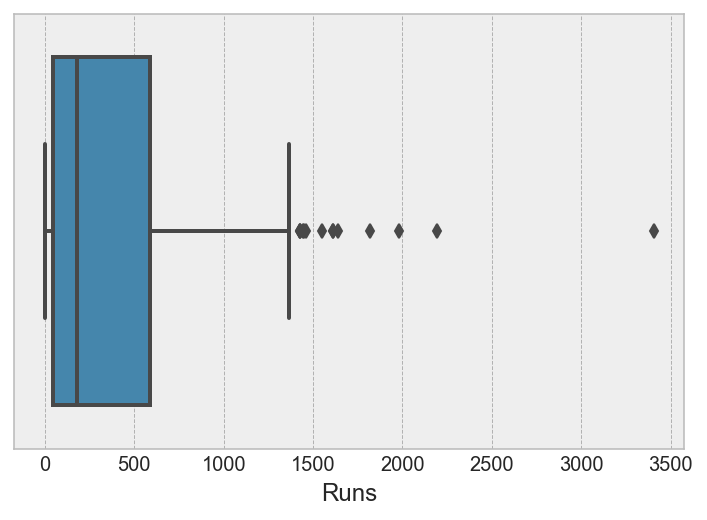

In [162]:
sns.boxplot(x = "Runs", data=Icc_WTC_Batting_Stats)

### histogram for teams

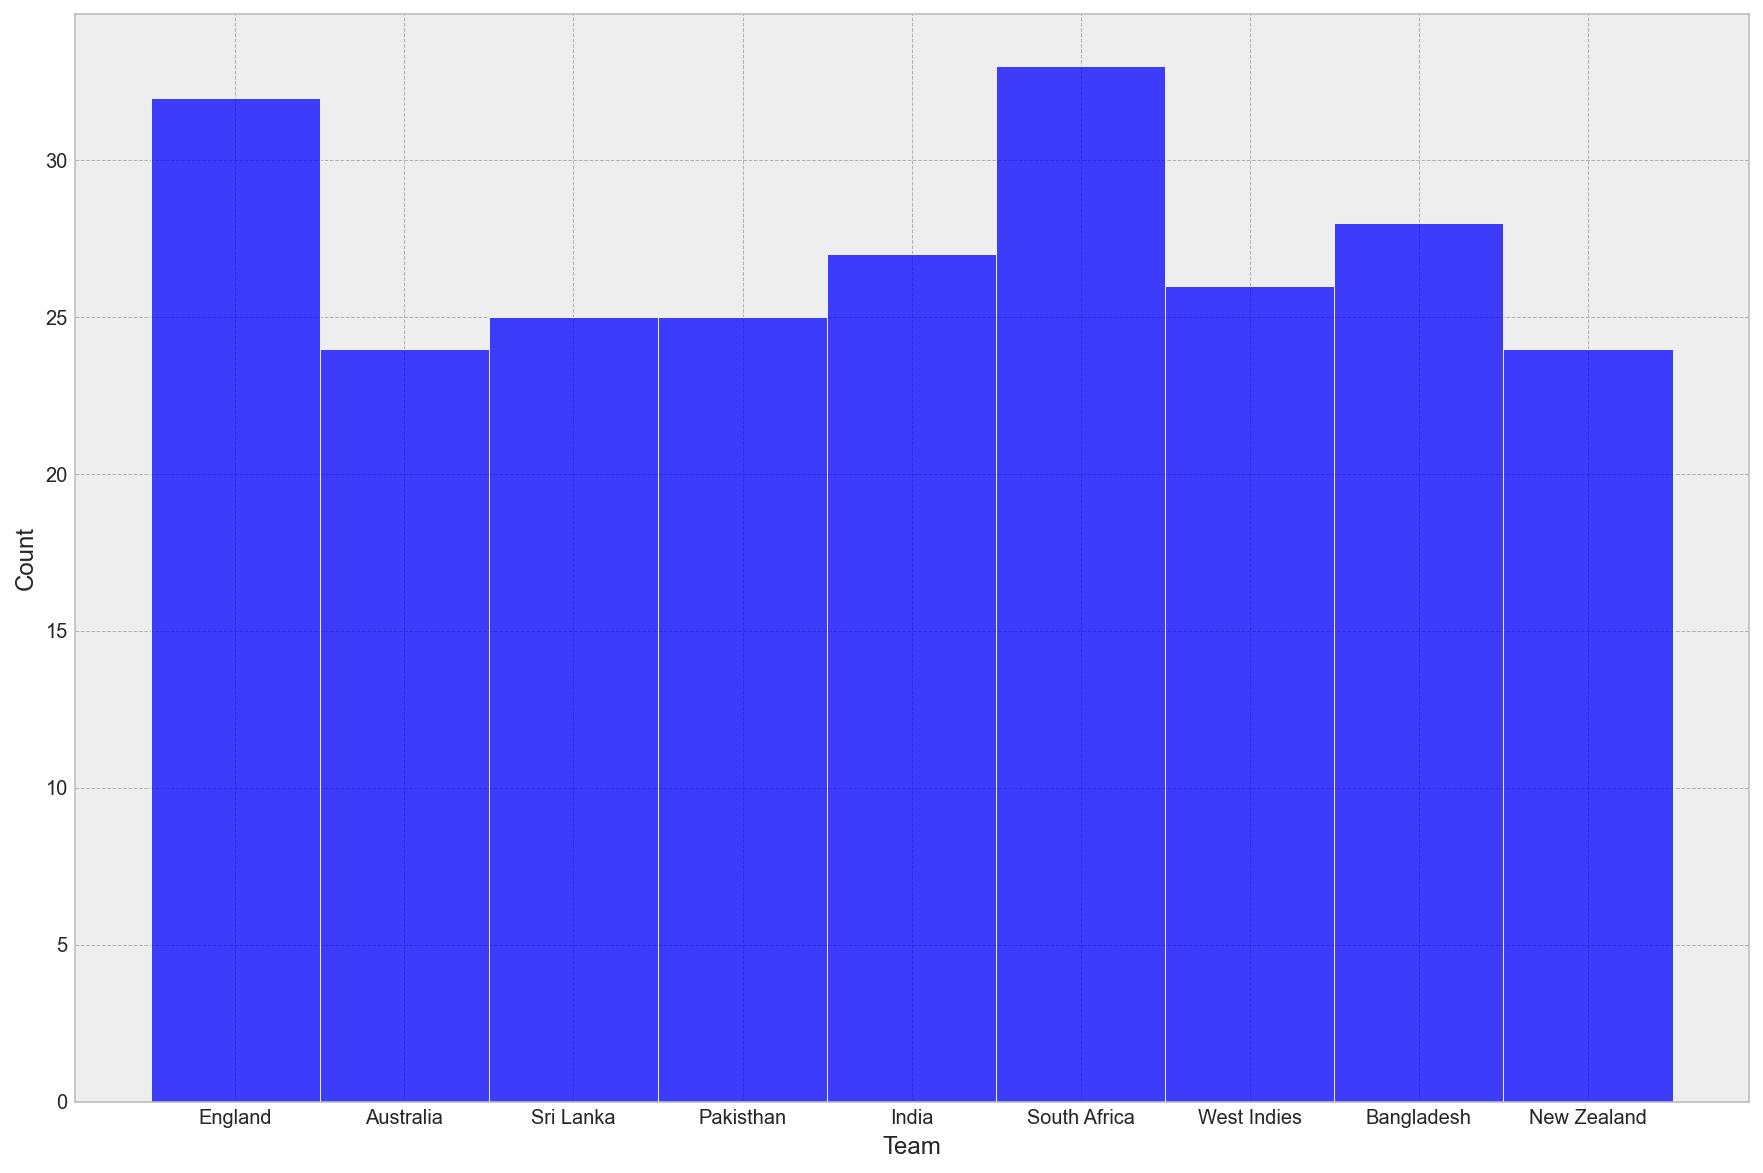

In [168]:
plt.figure(figsize= (15,10))
sns.histplot(data = Icc_WTC_Batting_Stats, x = "Team");

### scatter plot for runs

<AxesSubplot:xlabel='Strike_rate'>

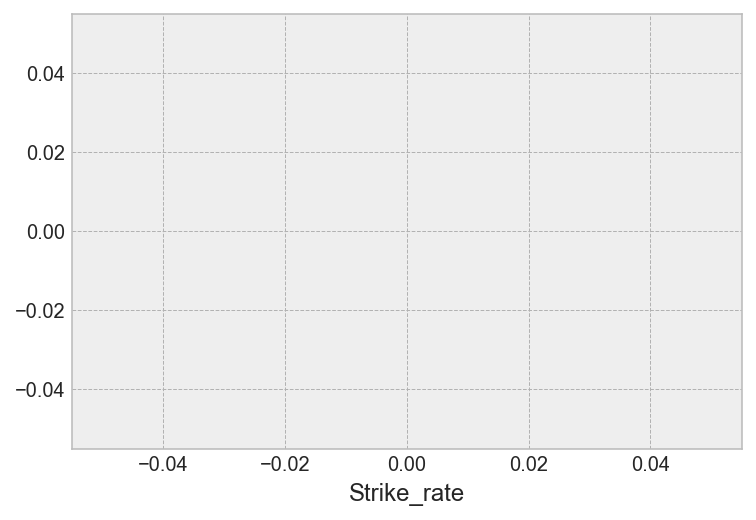

### Matches

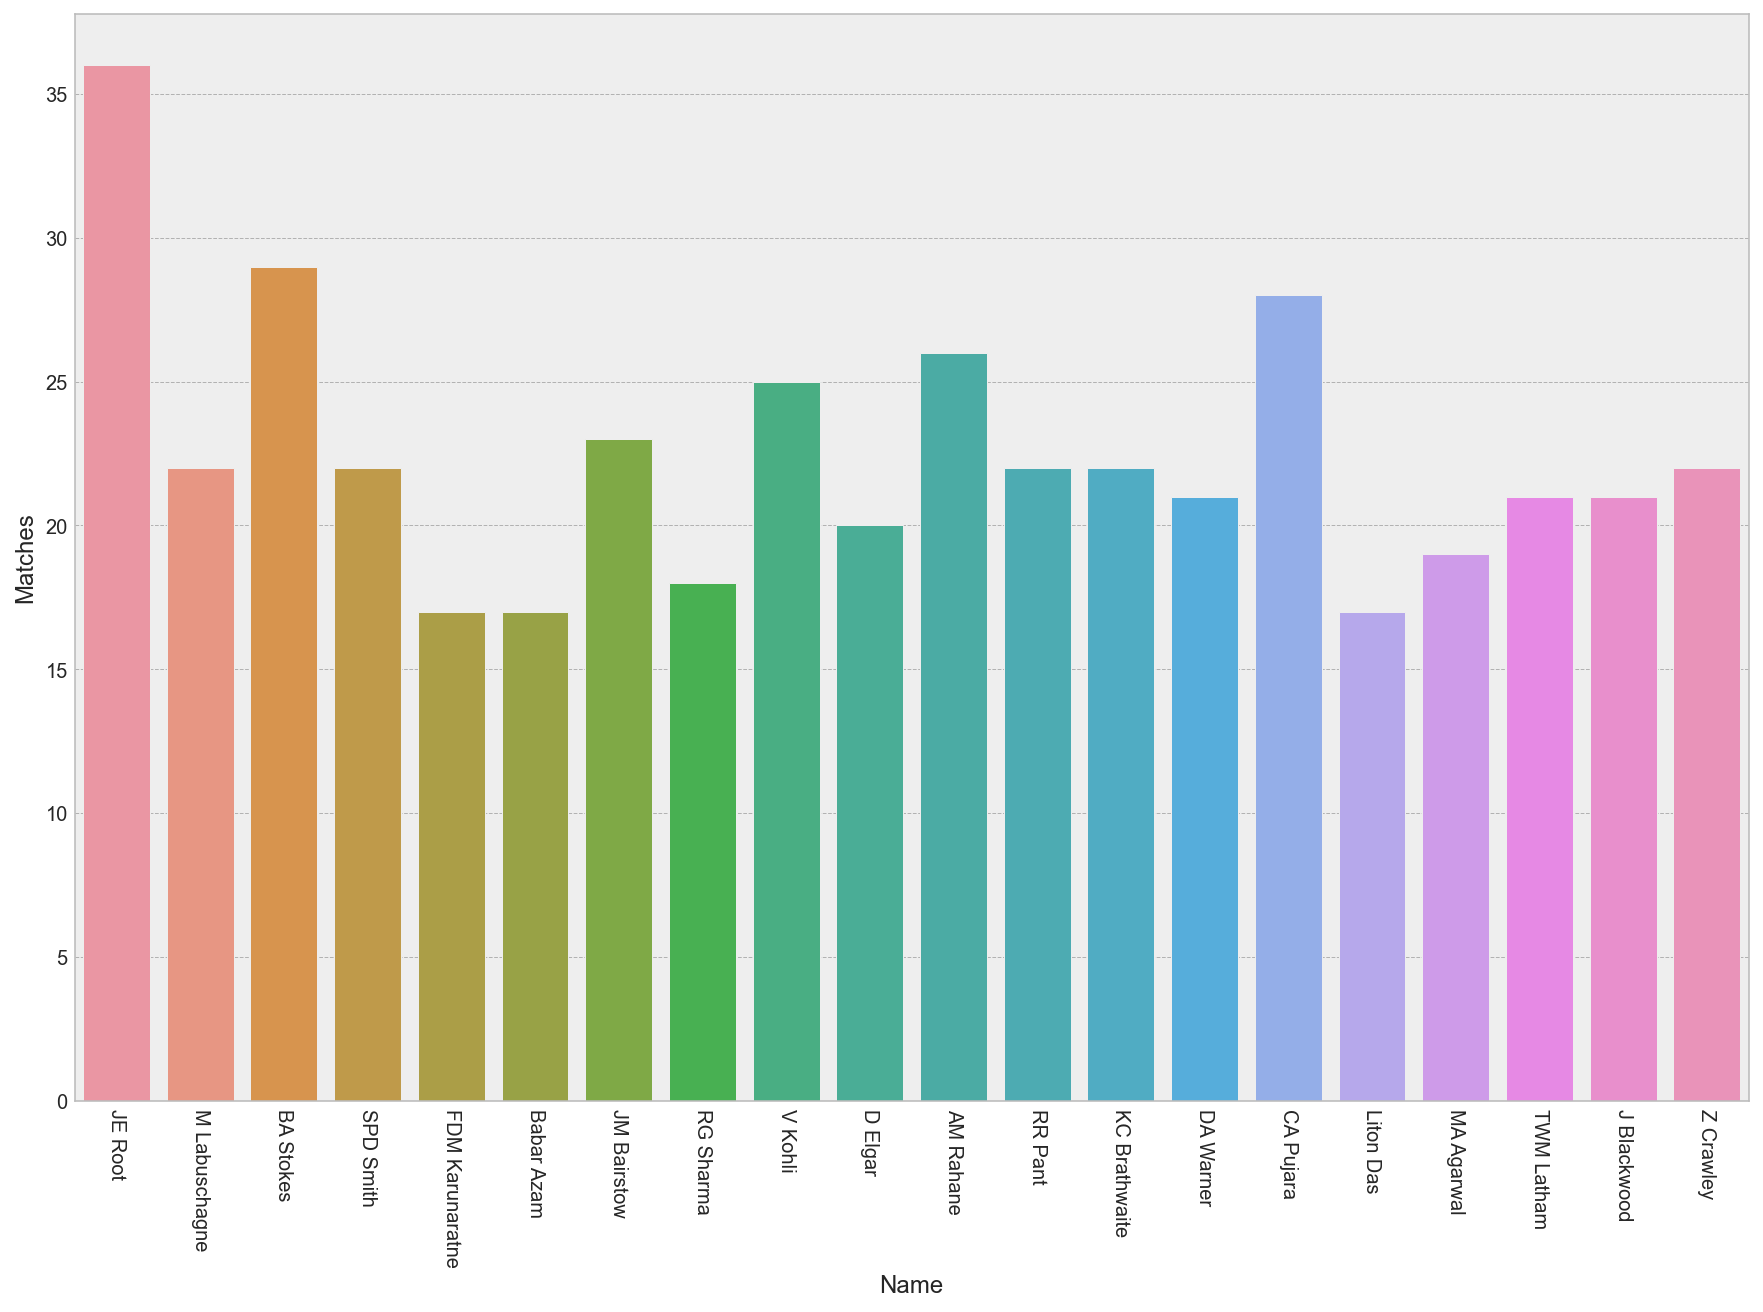

In [127]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Matches', );

### innings

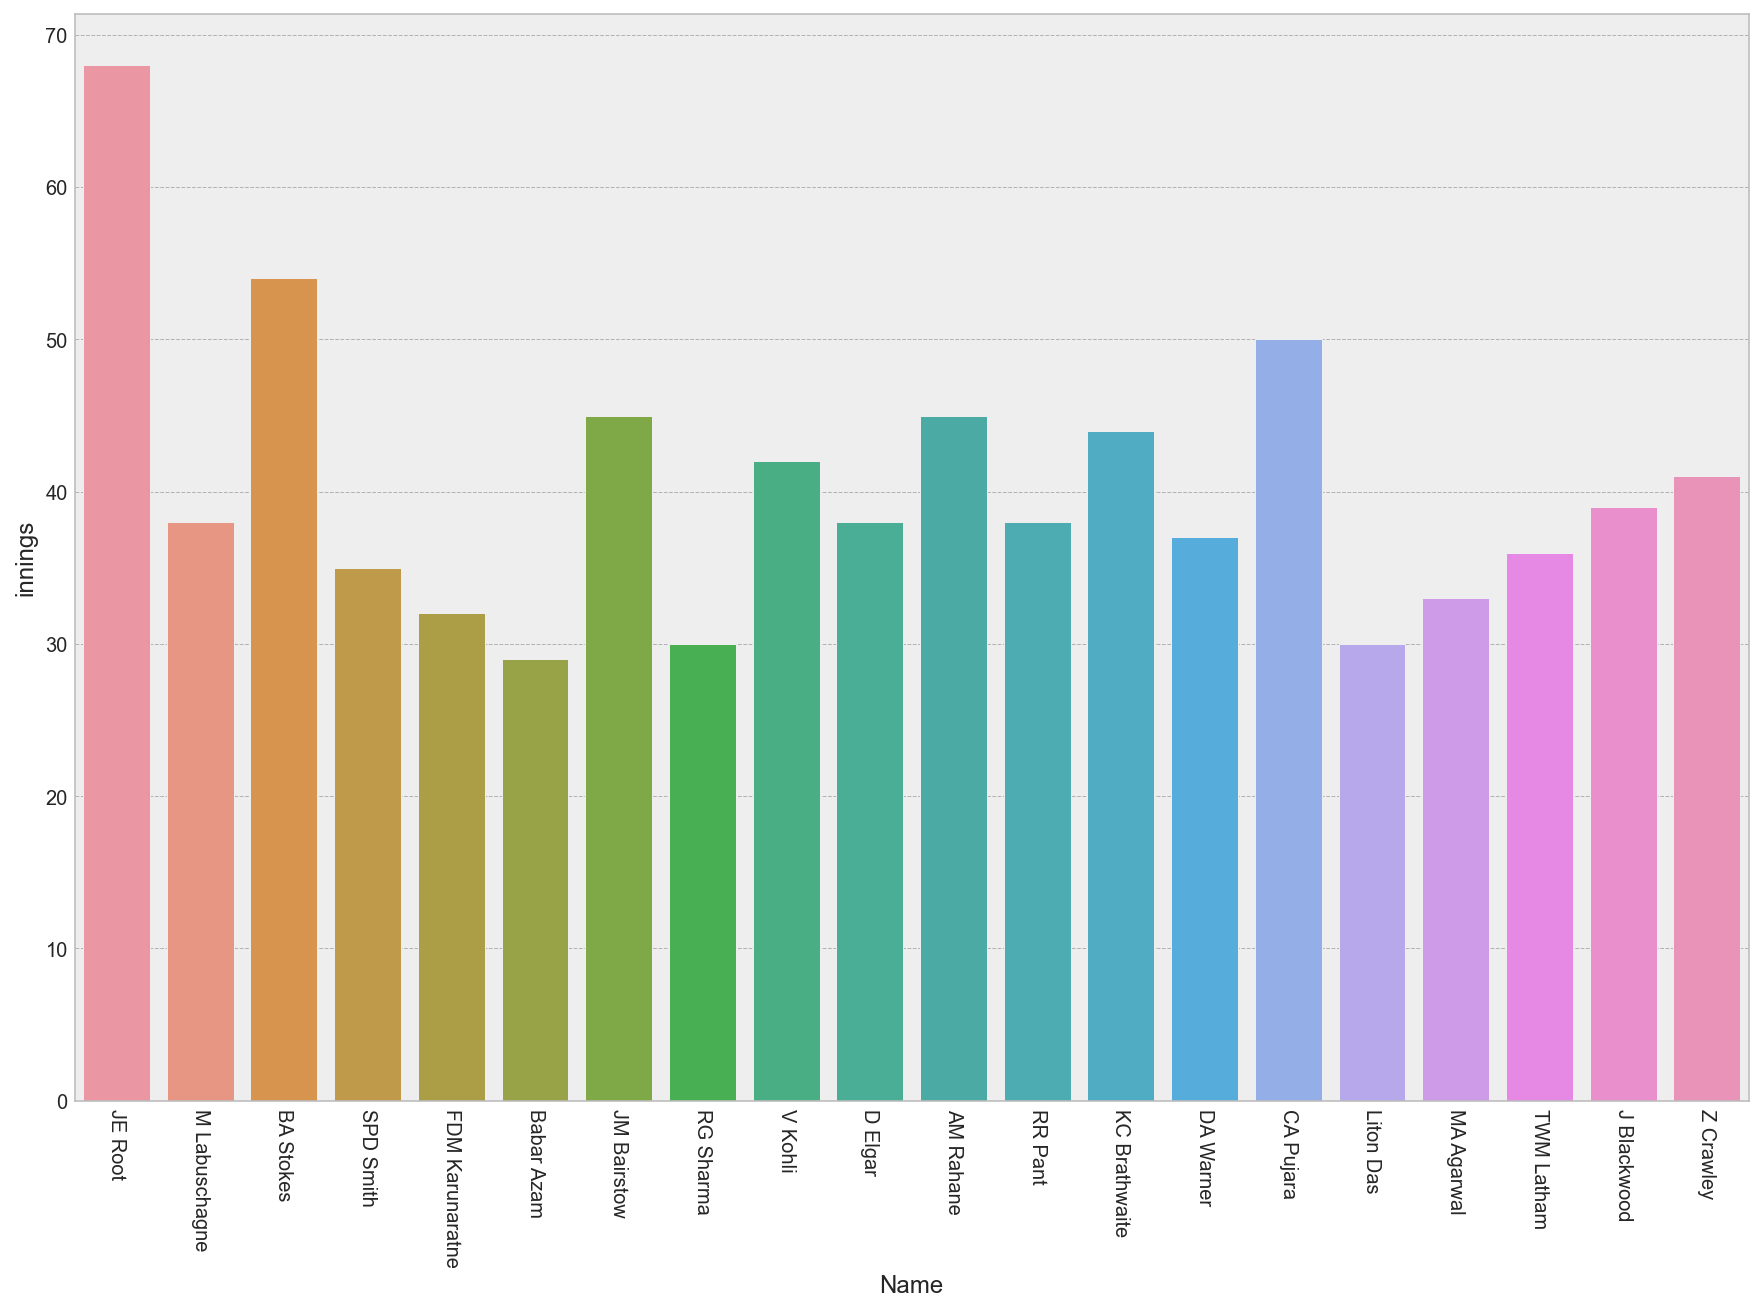

In [128]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'innings', );

### Not outs

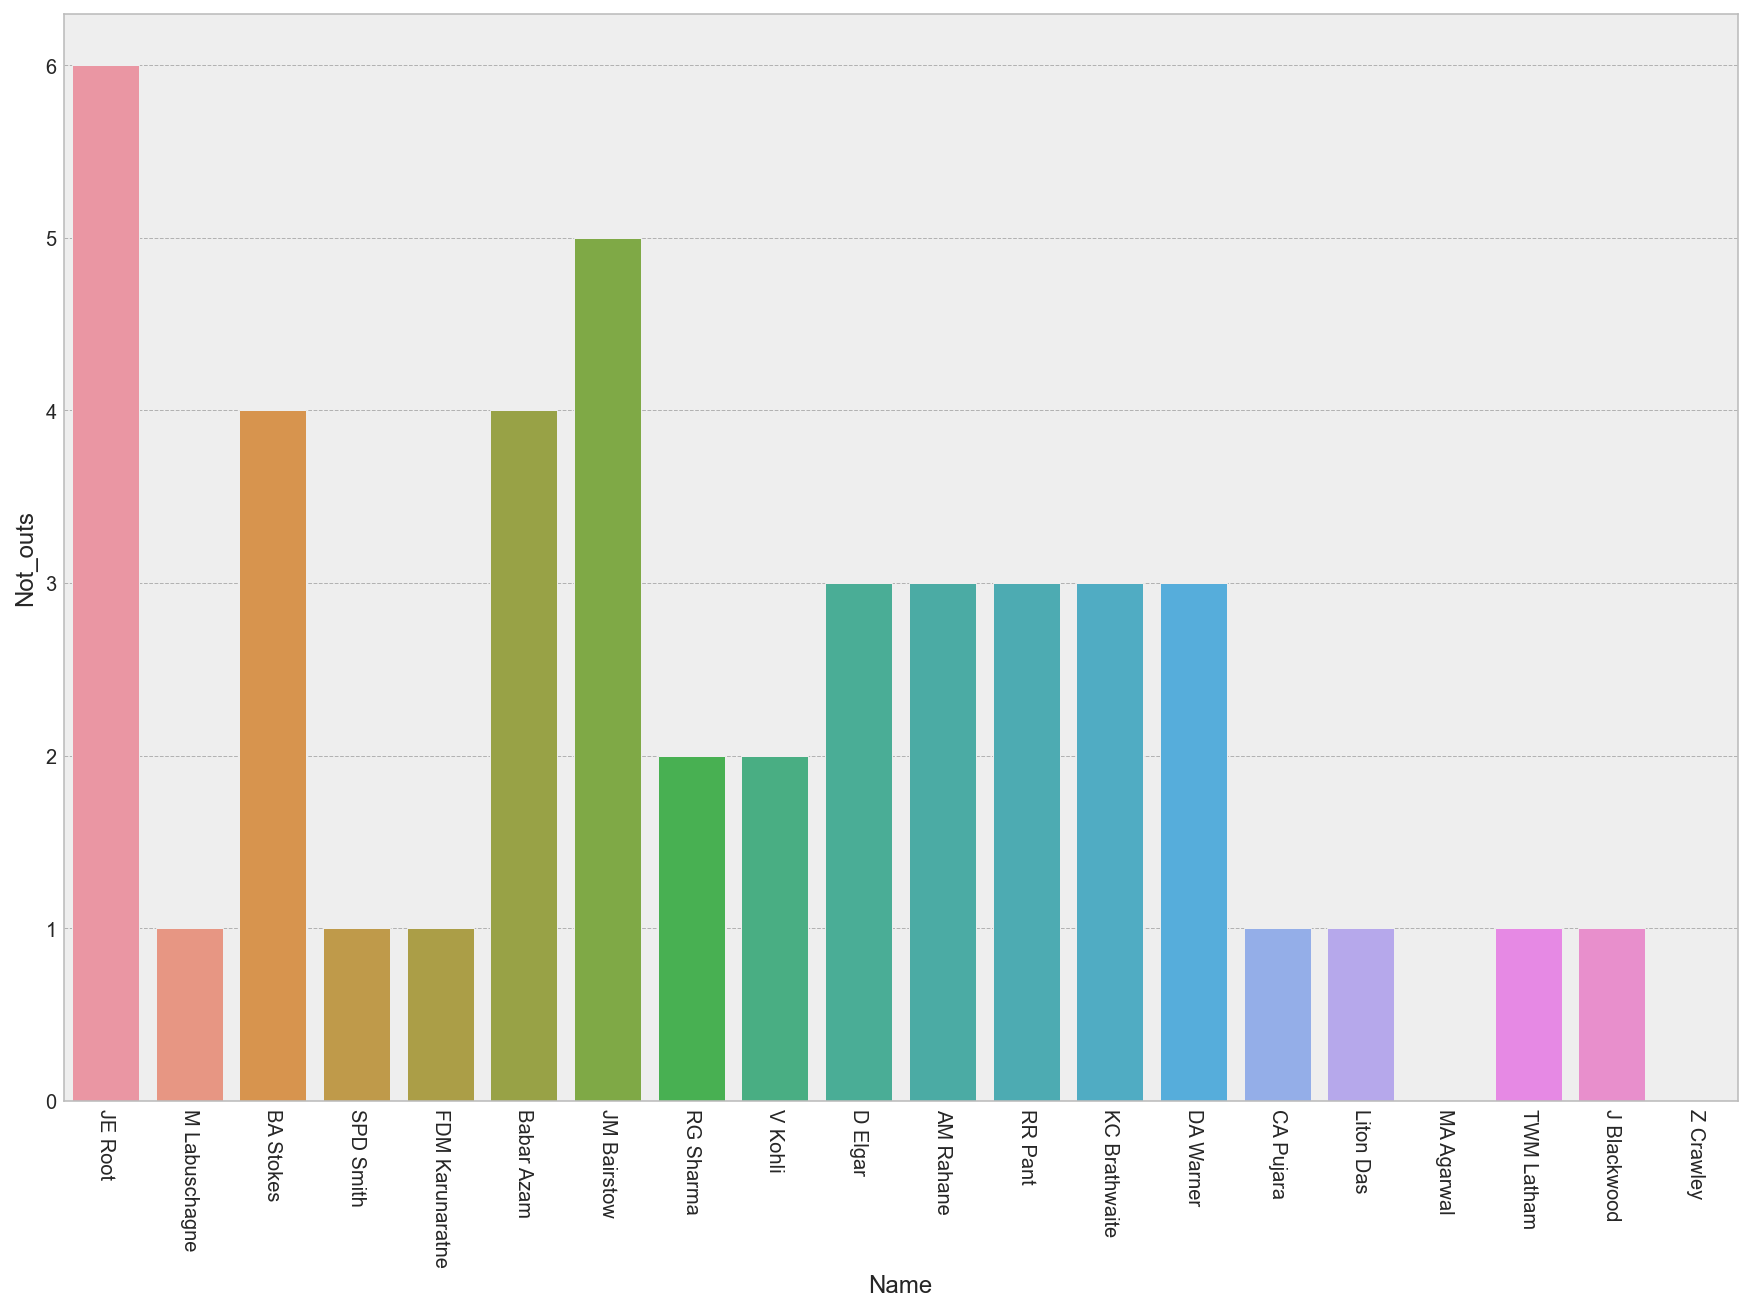

In [129]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Not_outs', );

### Runs

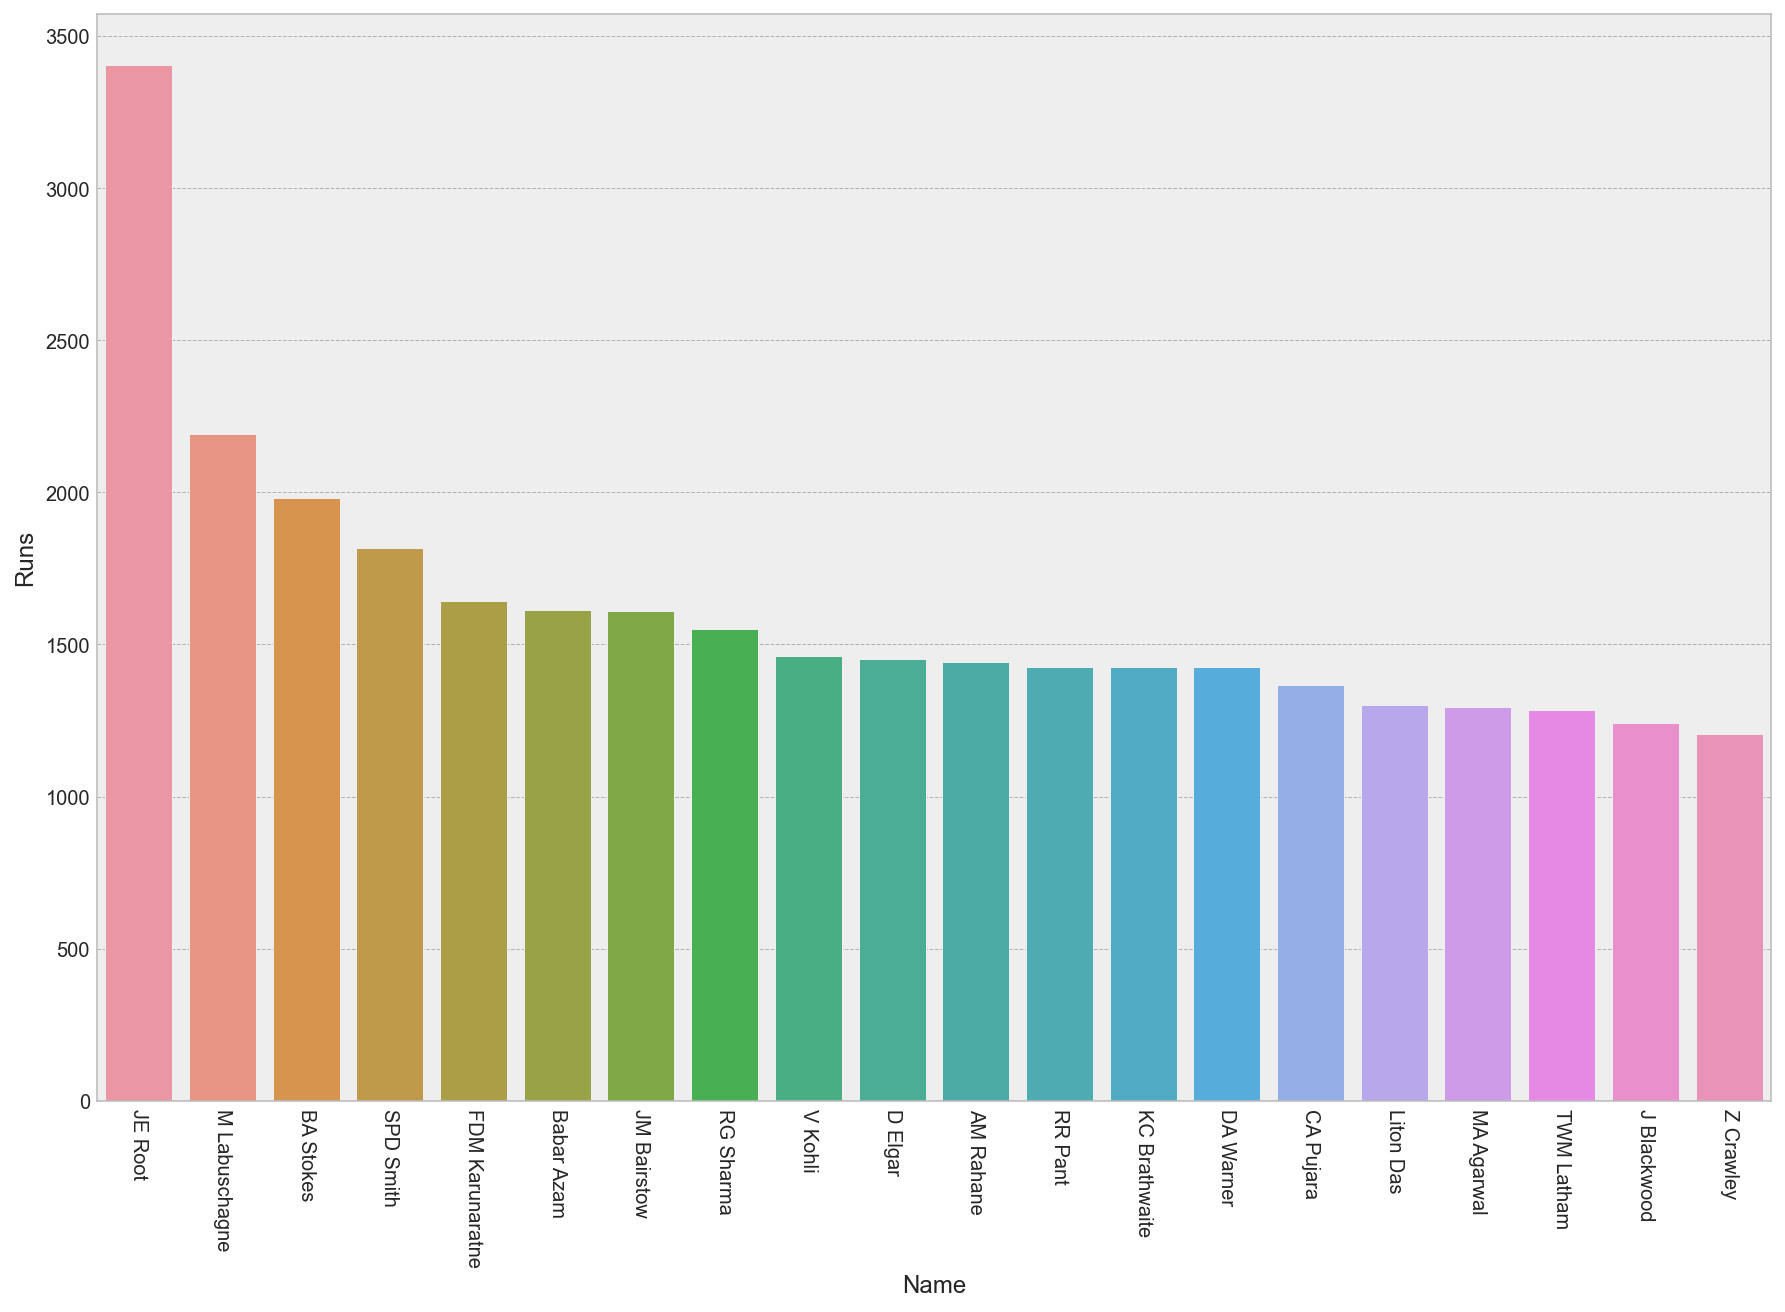

In [130]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Runs', );

### Highest Score

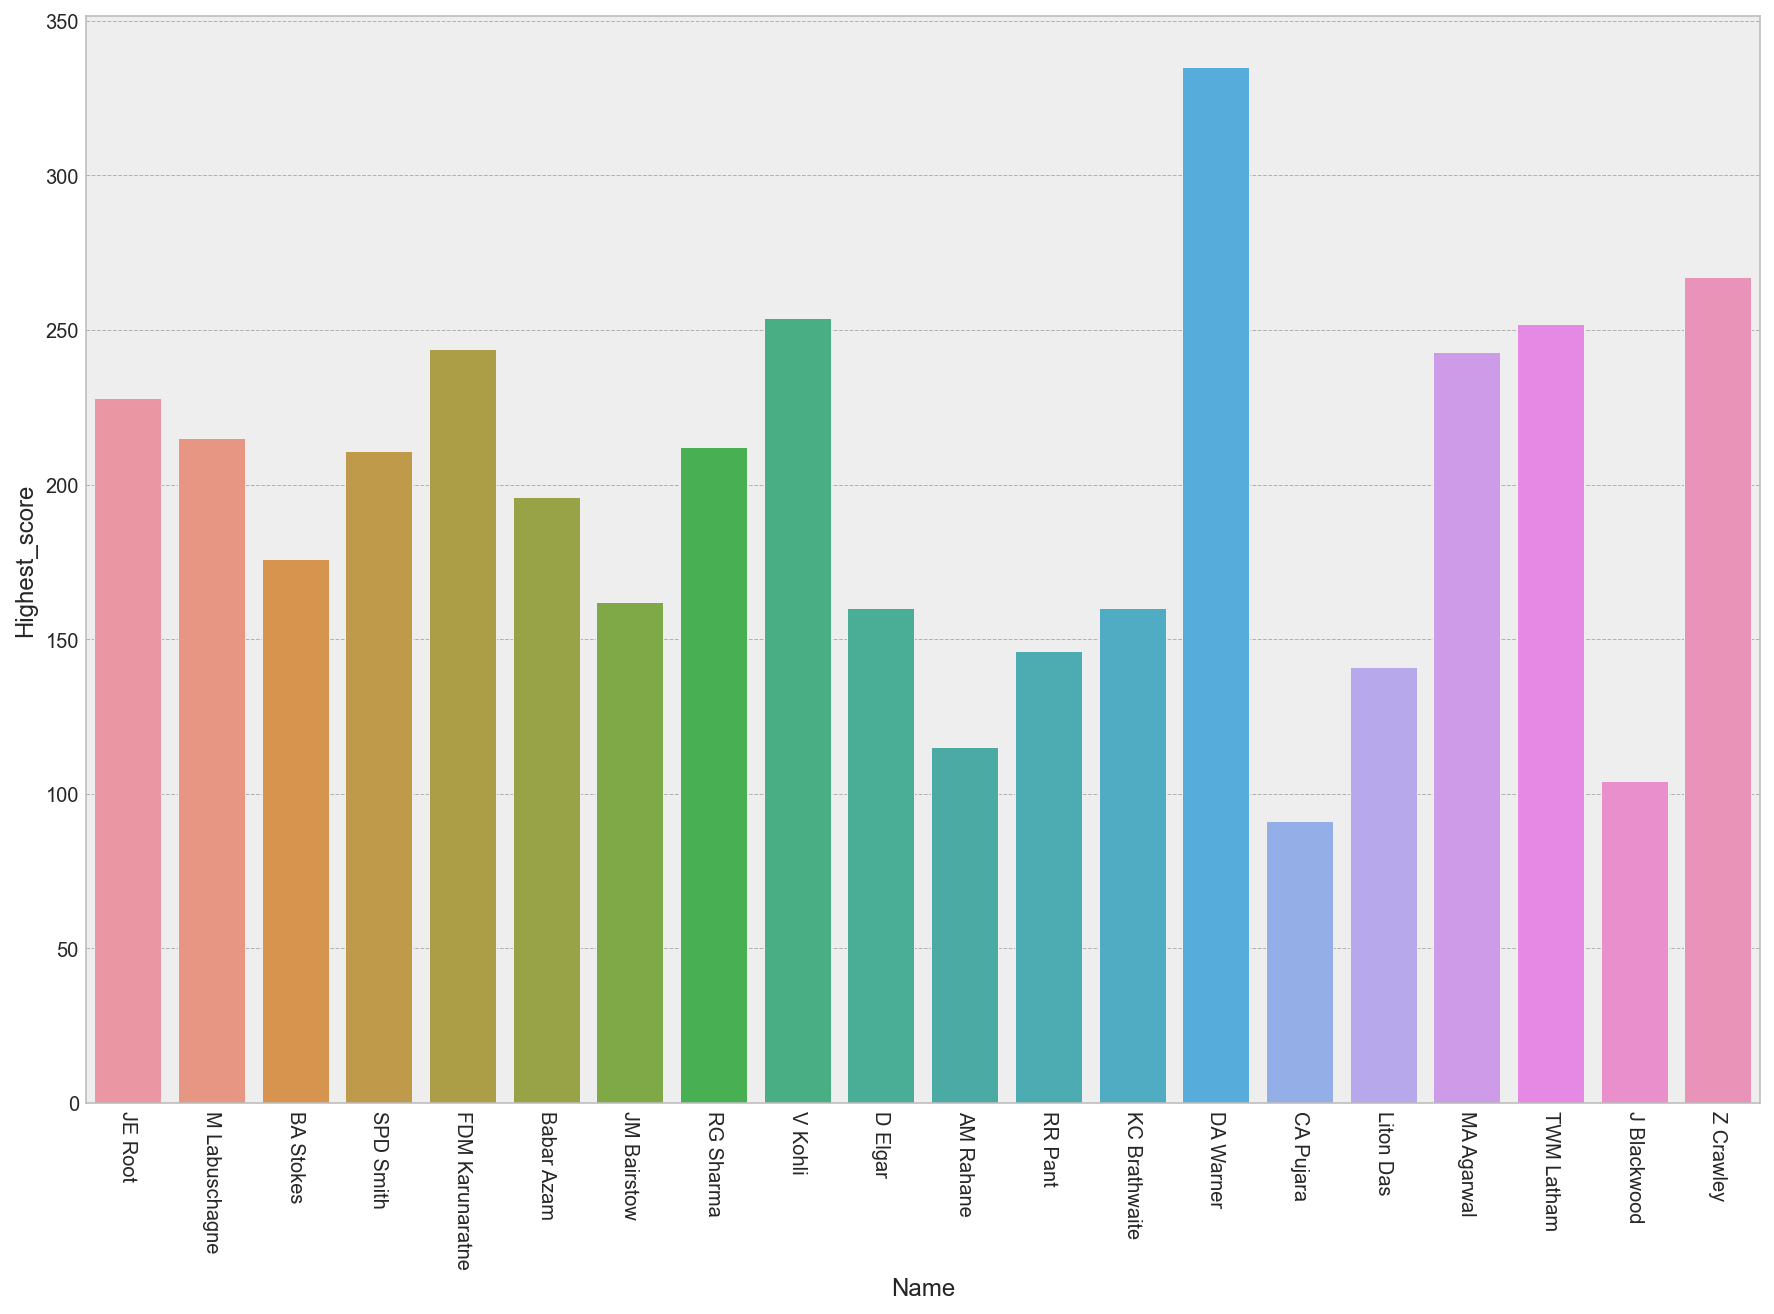

In [131]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Highest_score', );

### Average

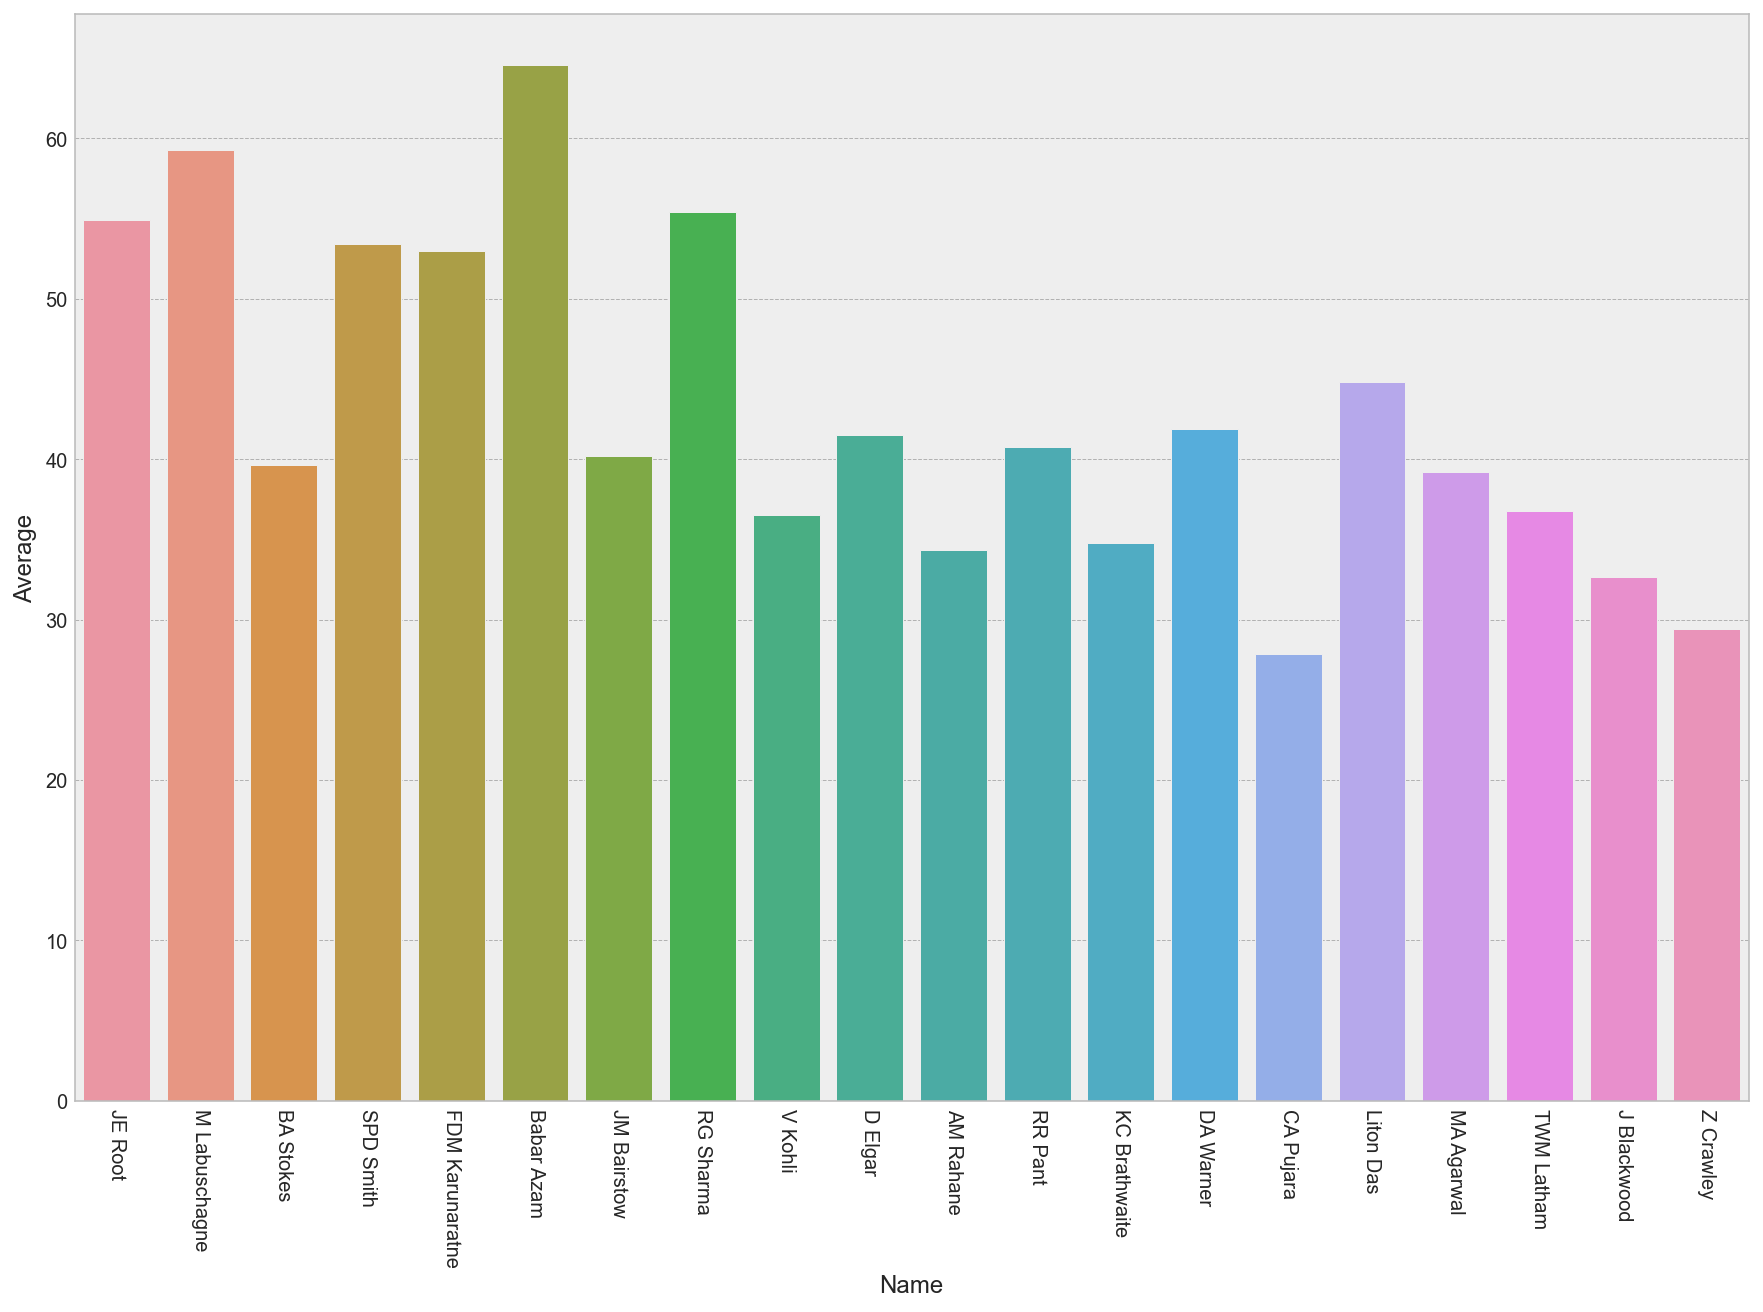

In [132]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Average', );

### Bowles faced

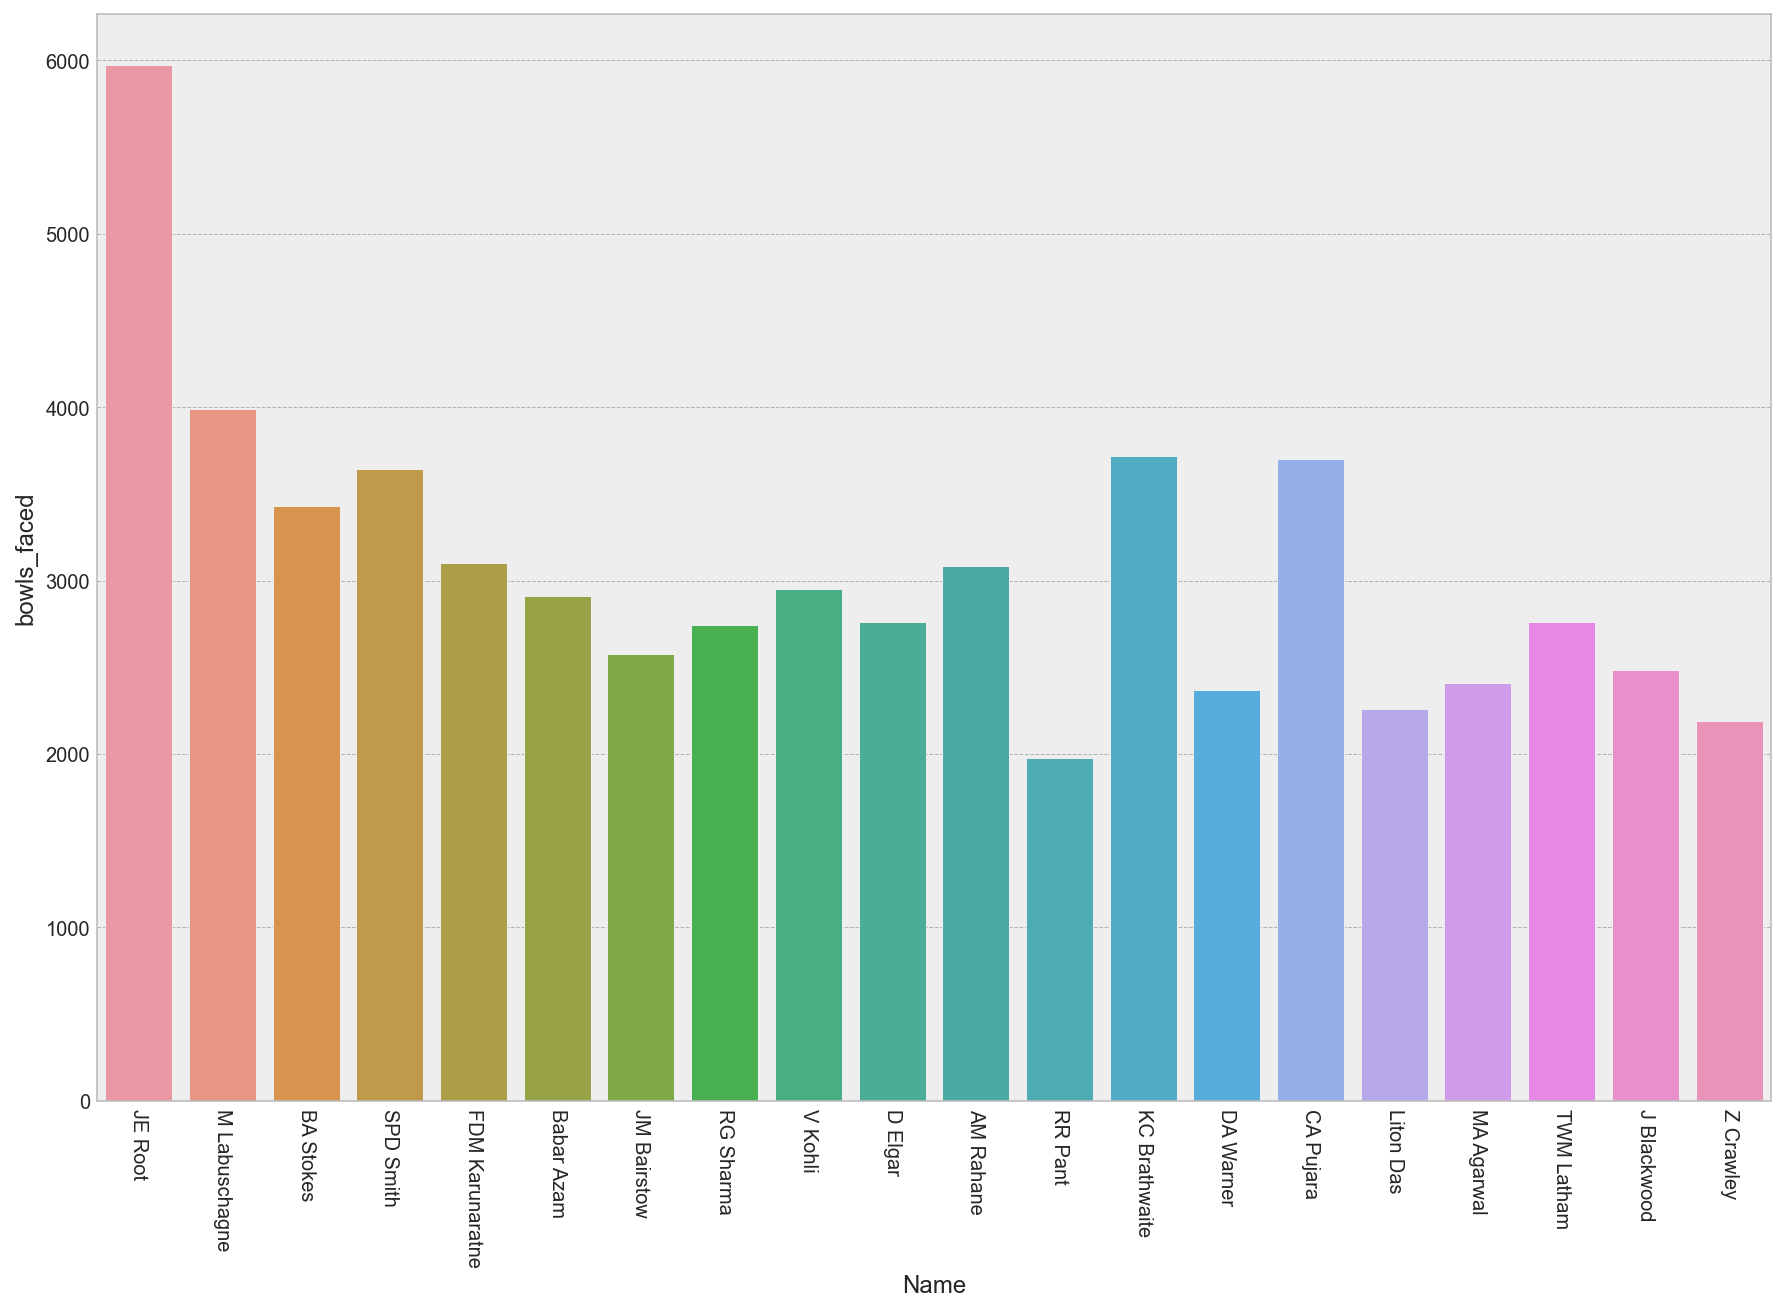

In [133]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'bowls_faced', );

### Strike_rate

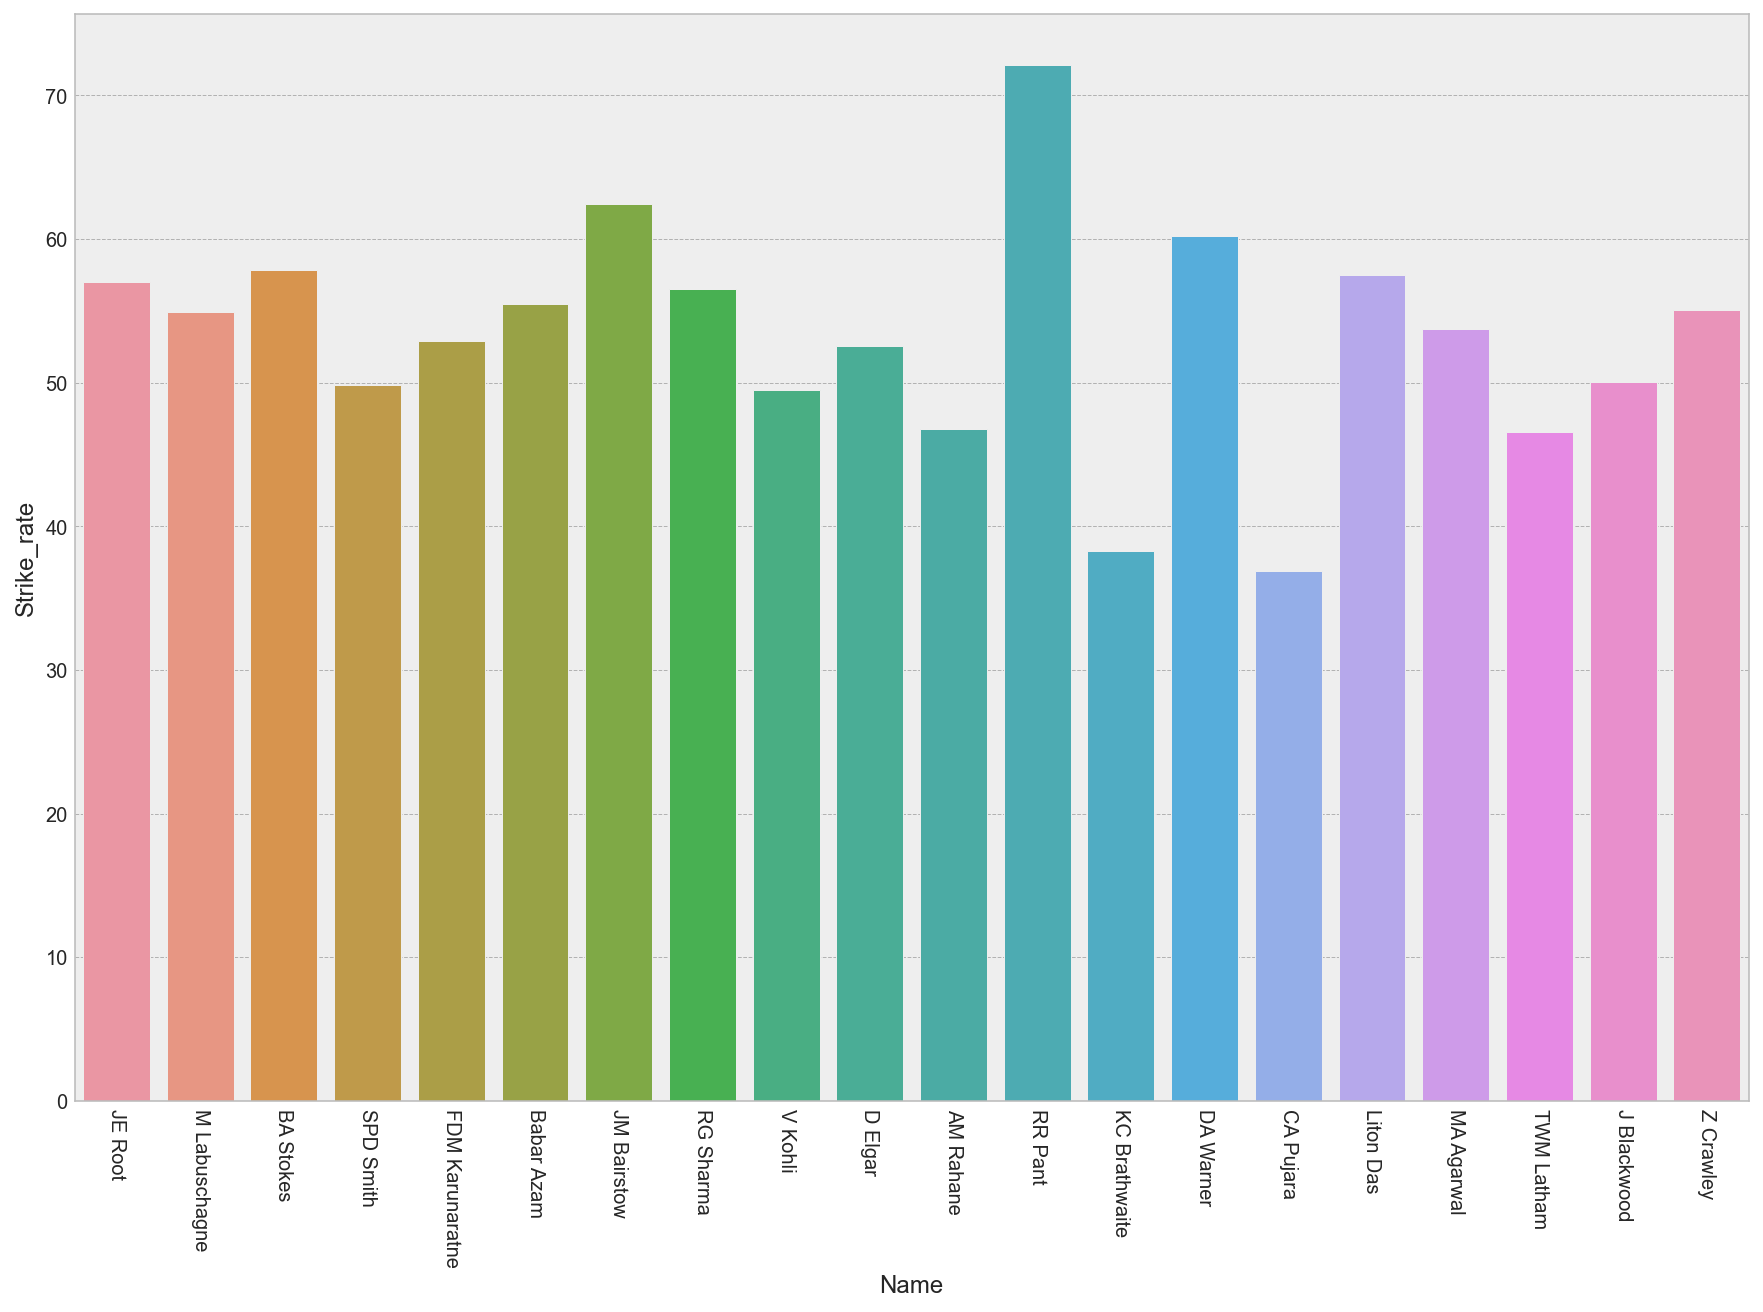

In [134]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Strike_rate', );

### Hunderds

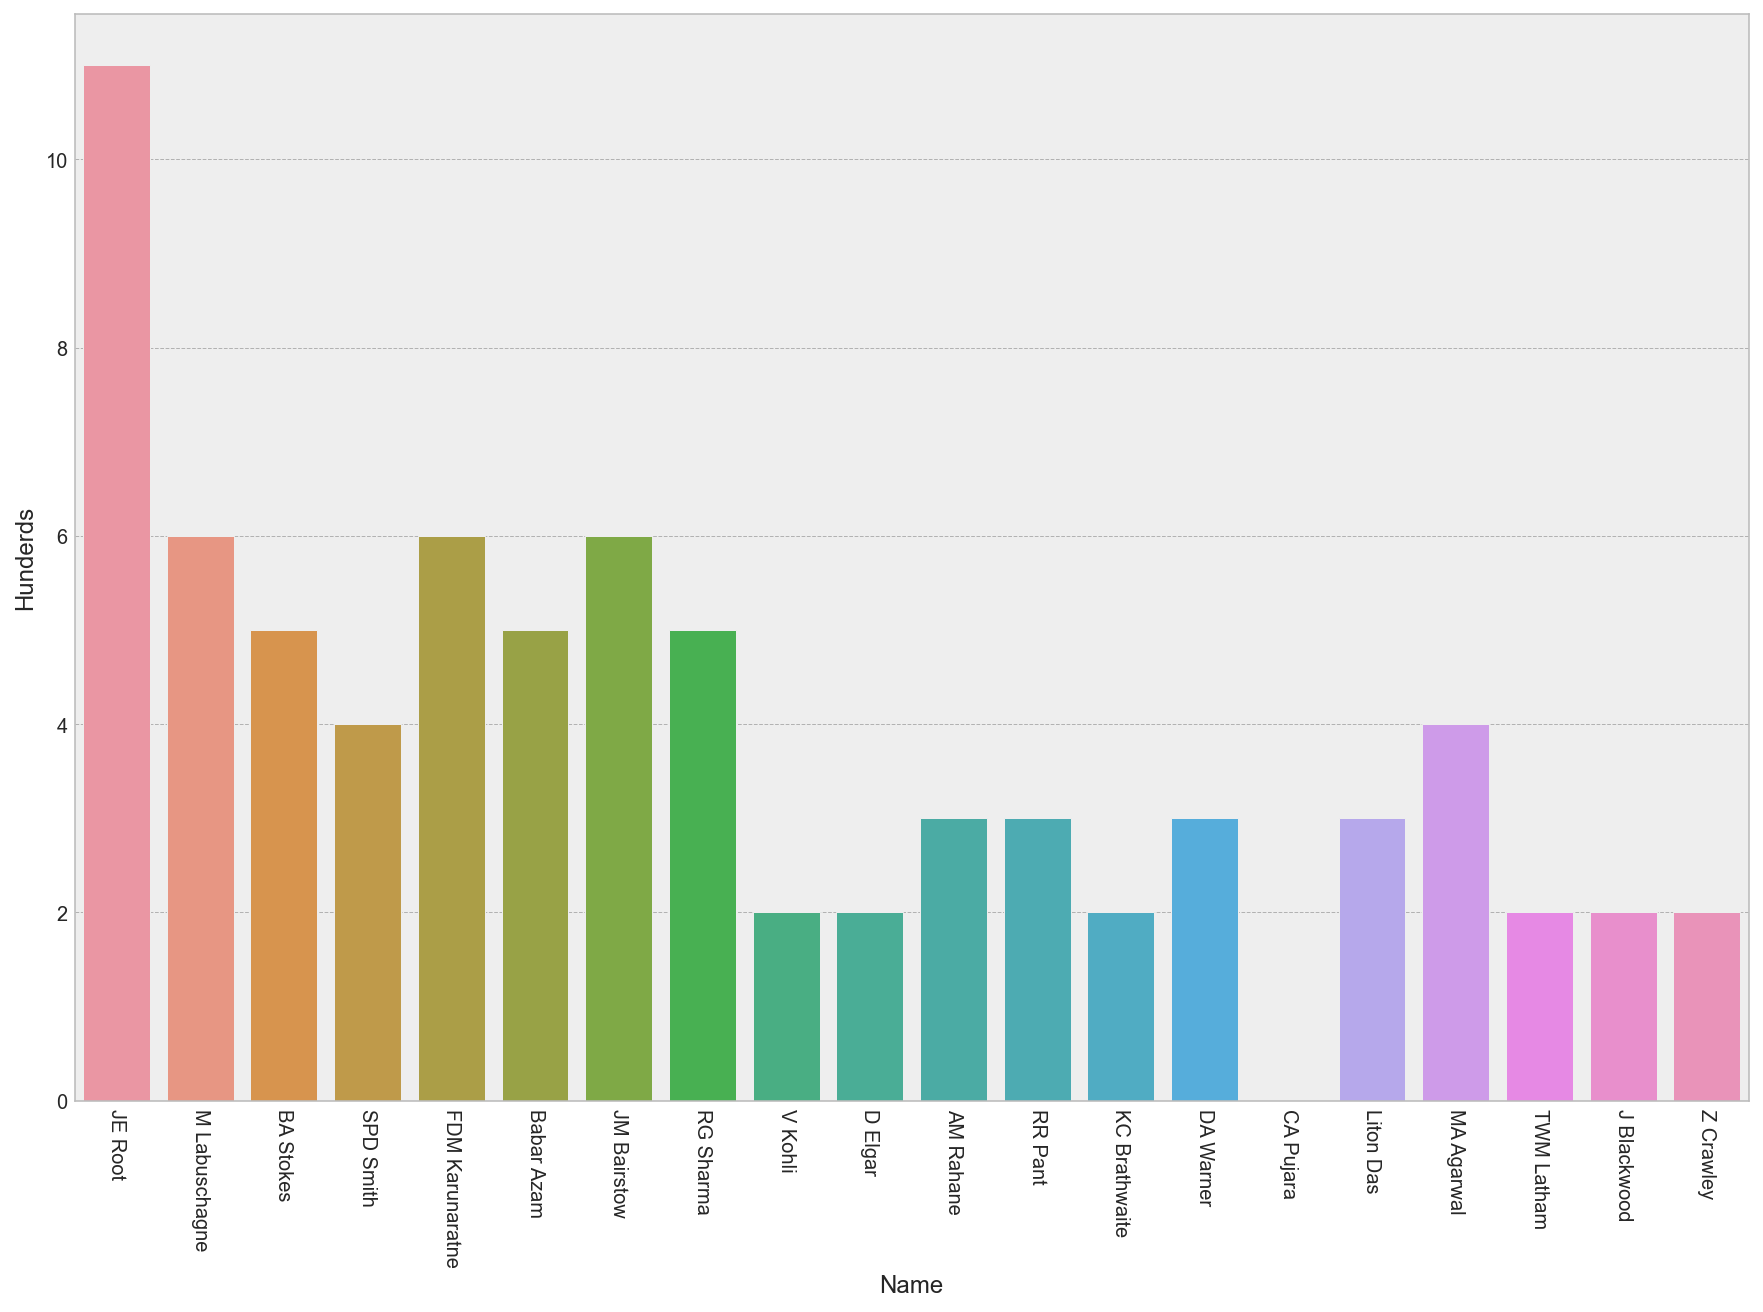

In [135]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Hunderds', );

### Fifties

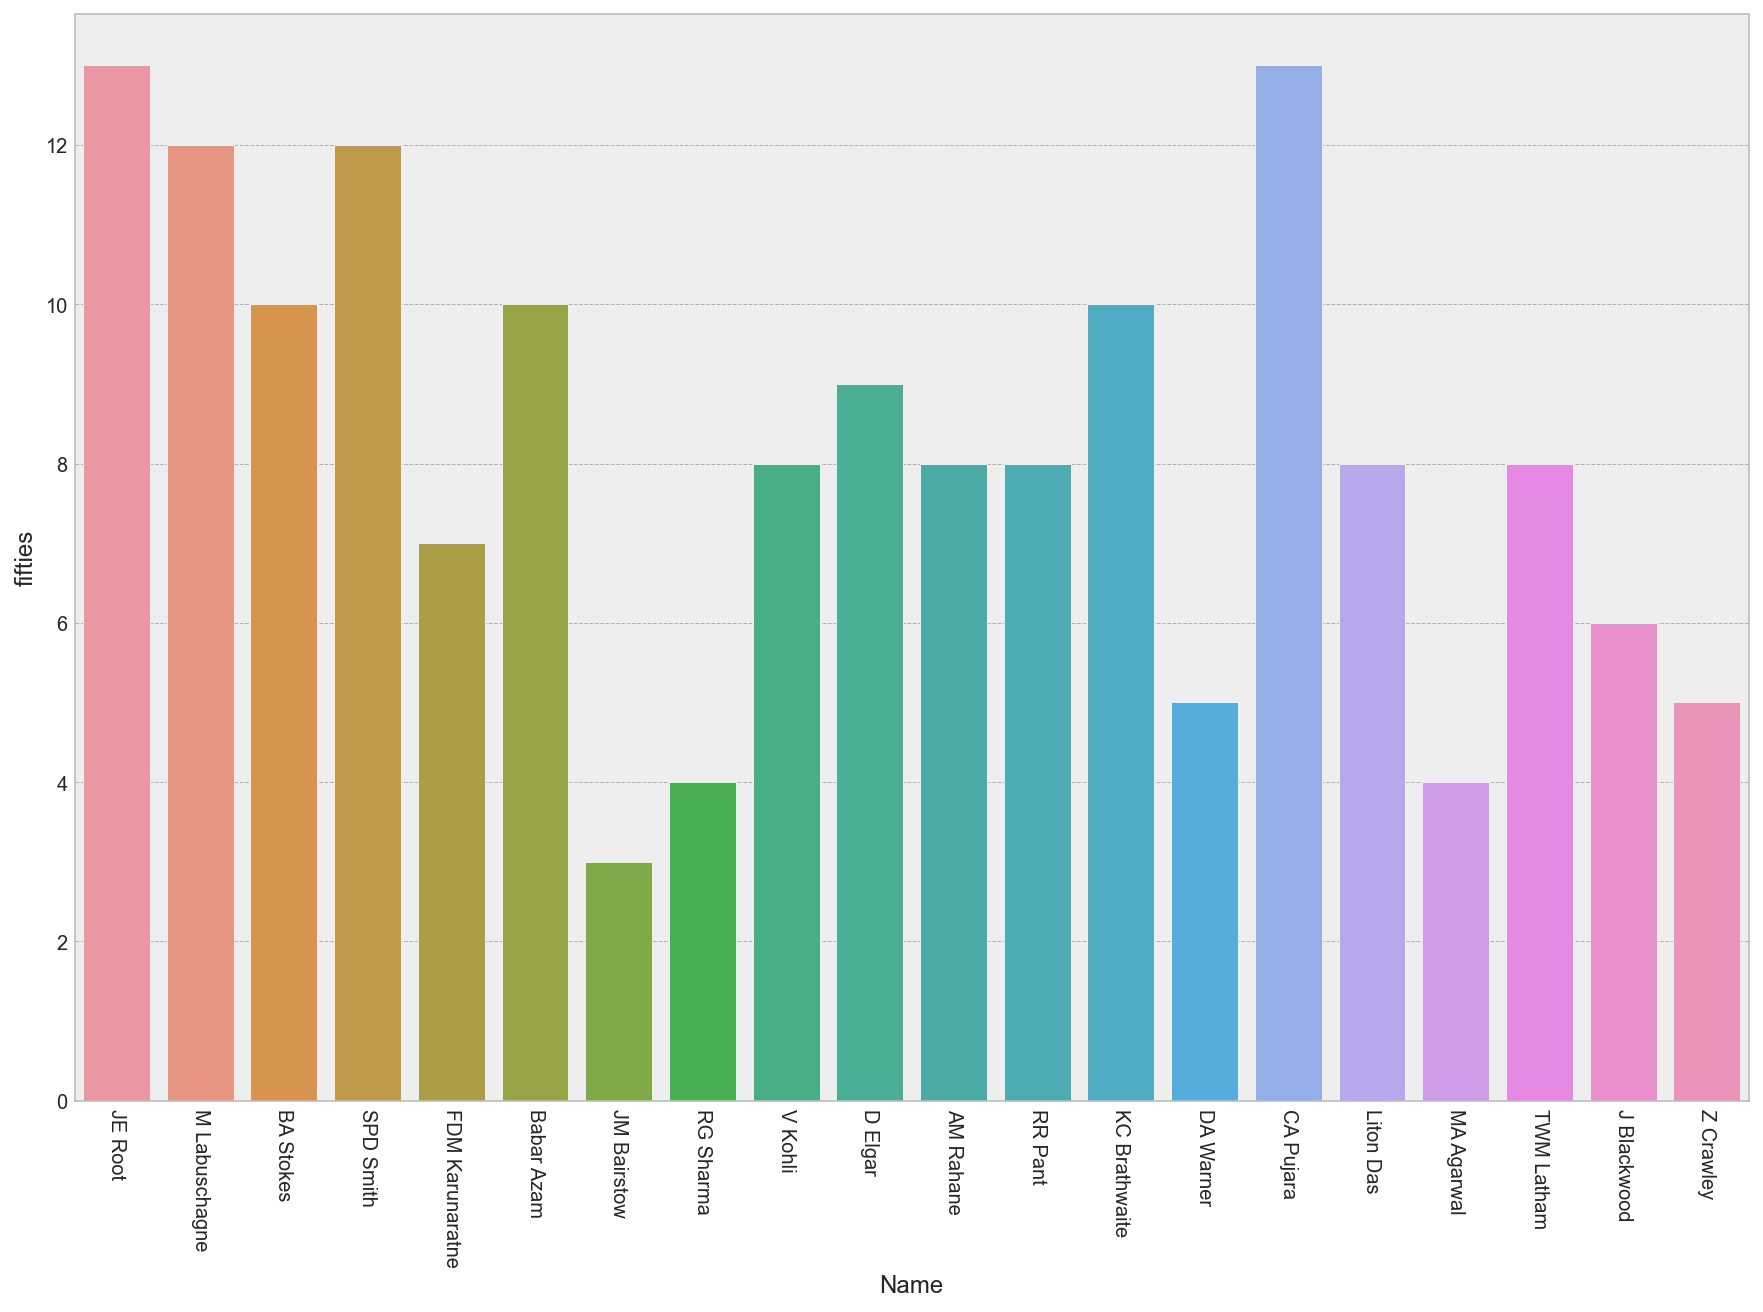

In [136]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'fifties', );

### Ducks

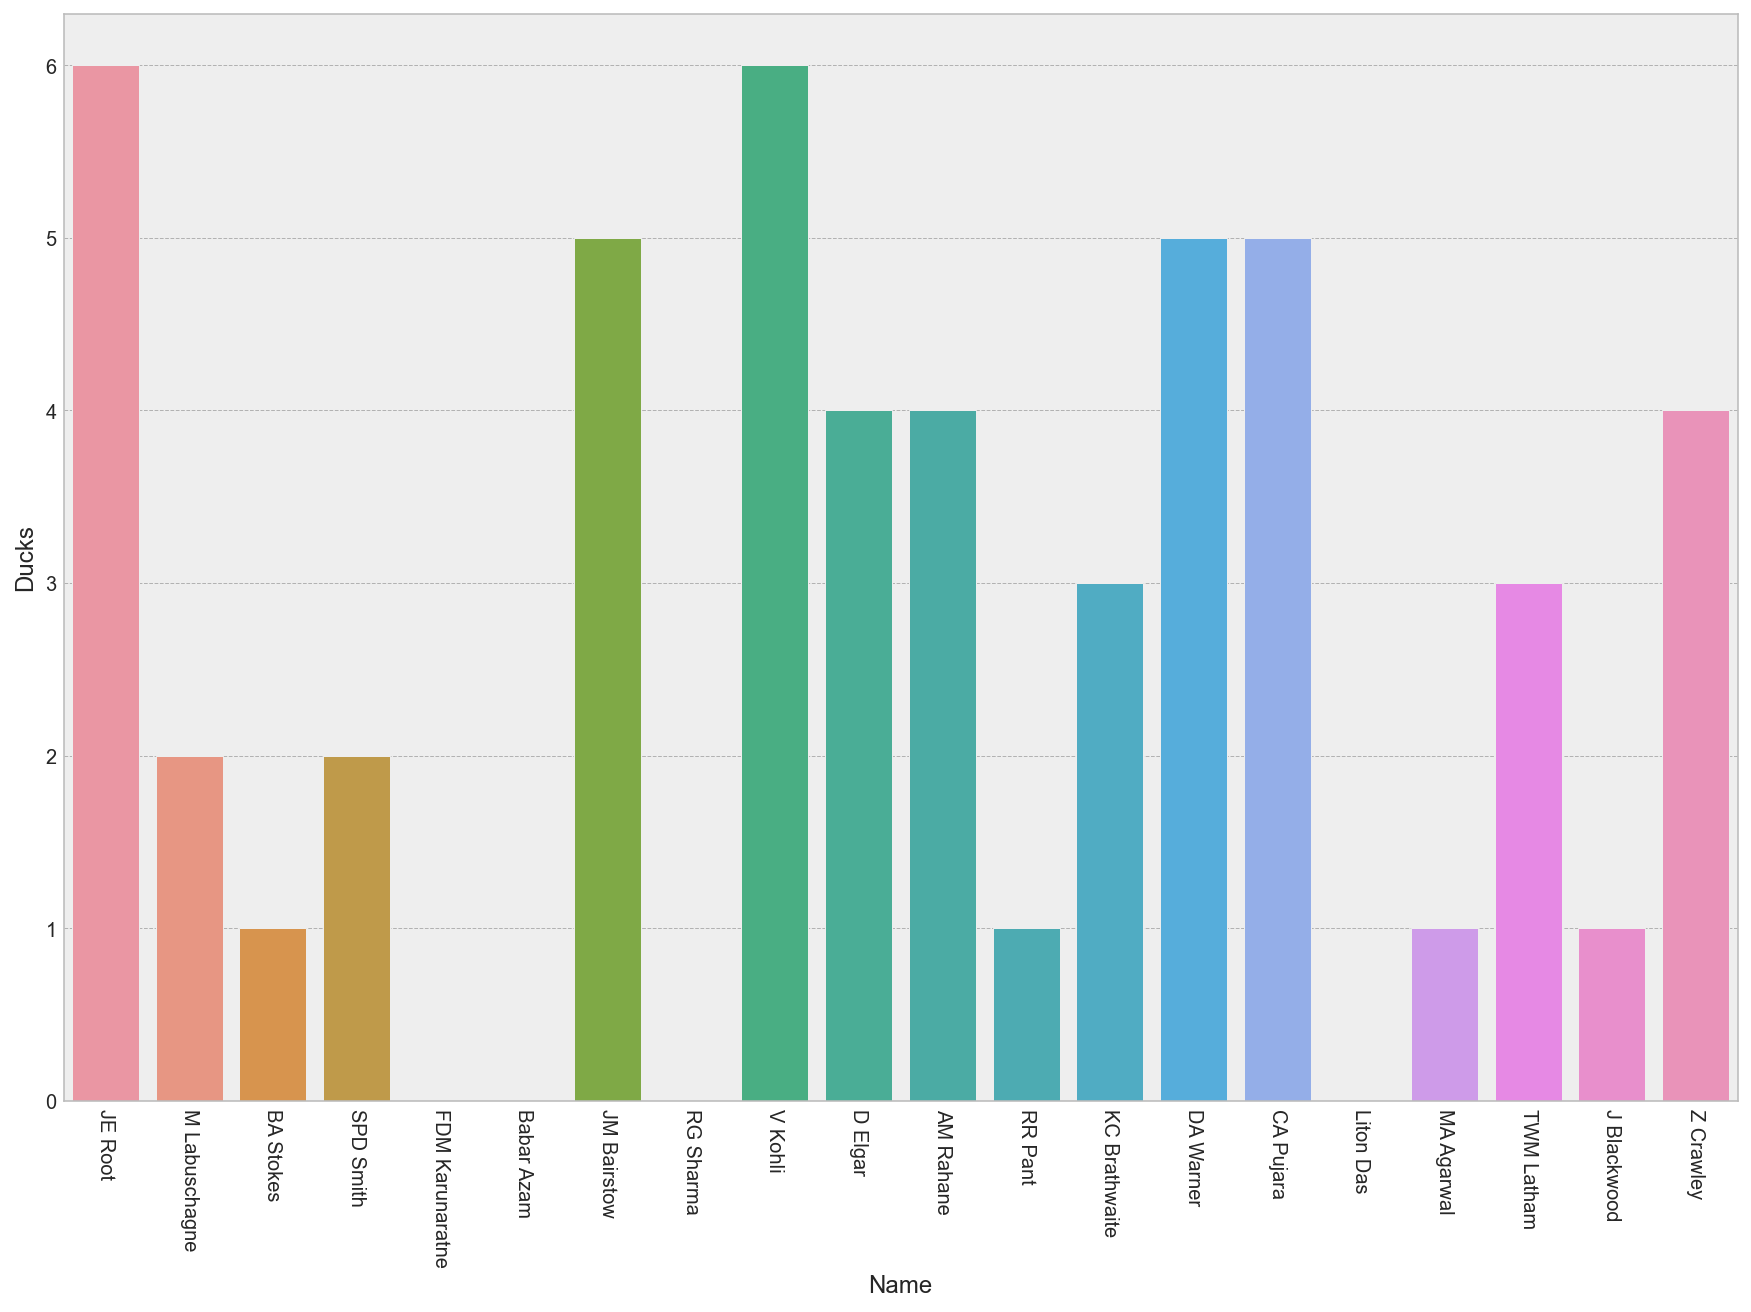

In [137]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'Ducks', );

### Fours

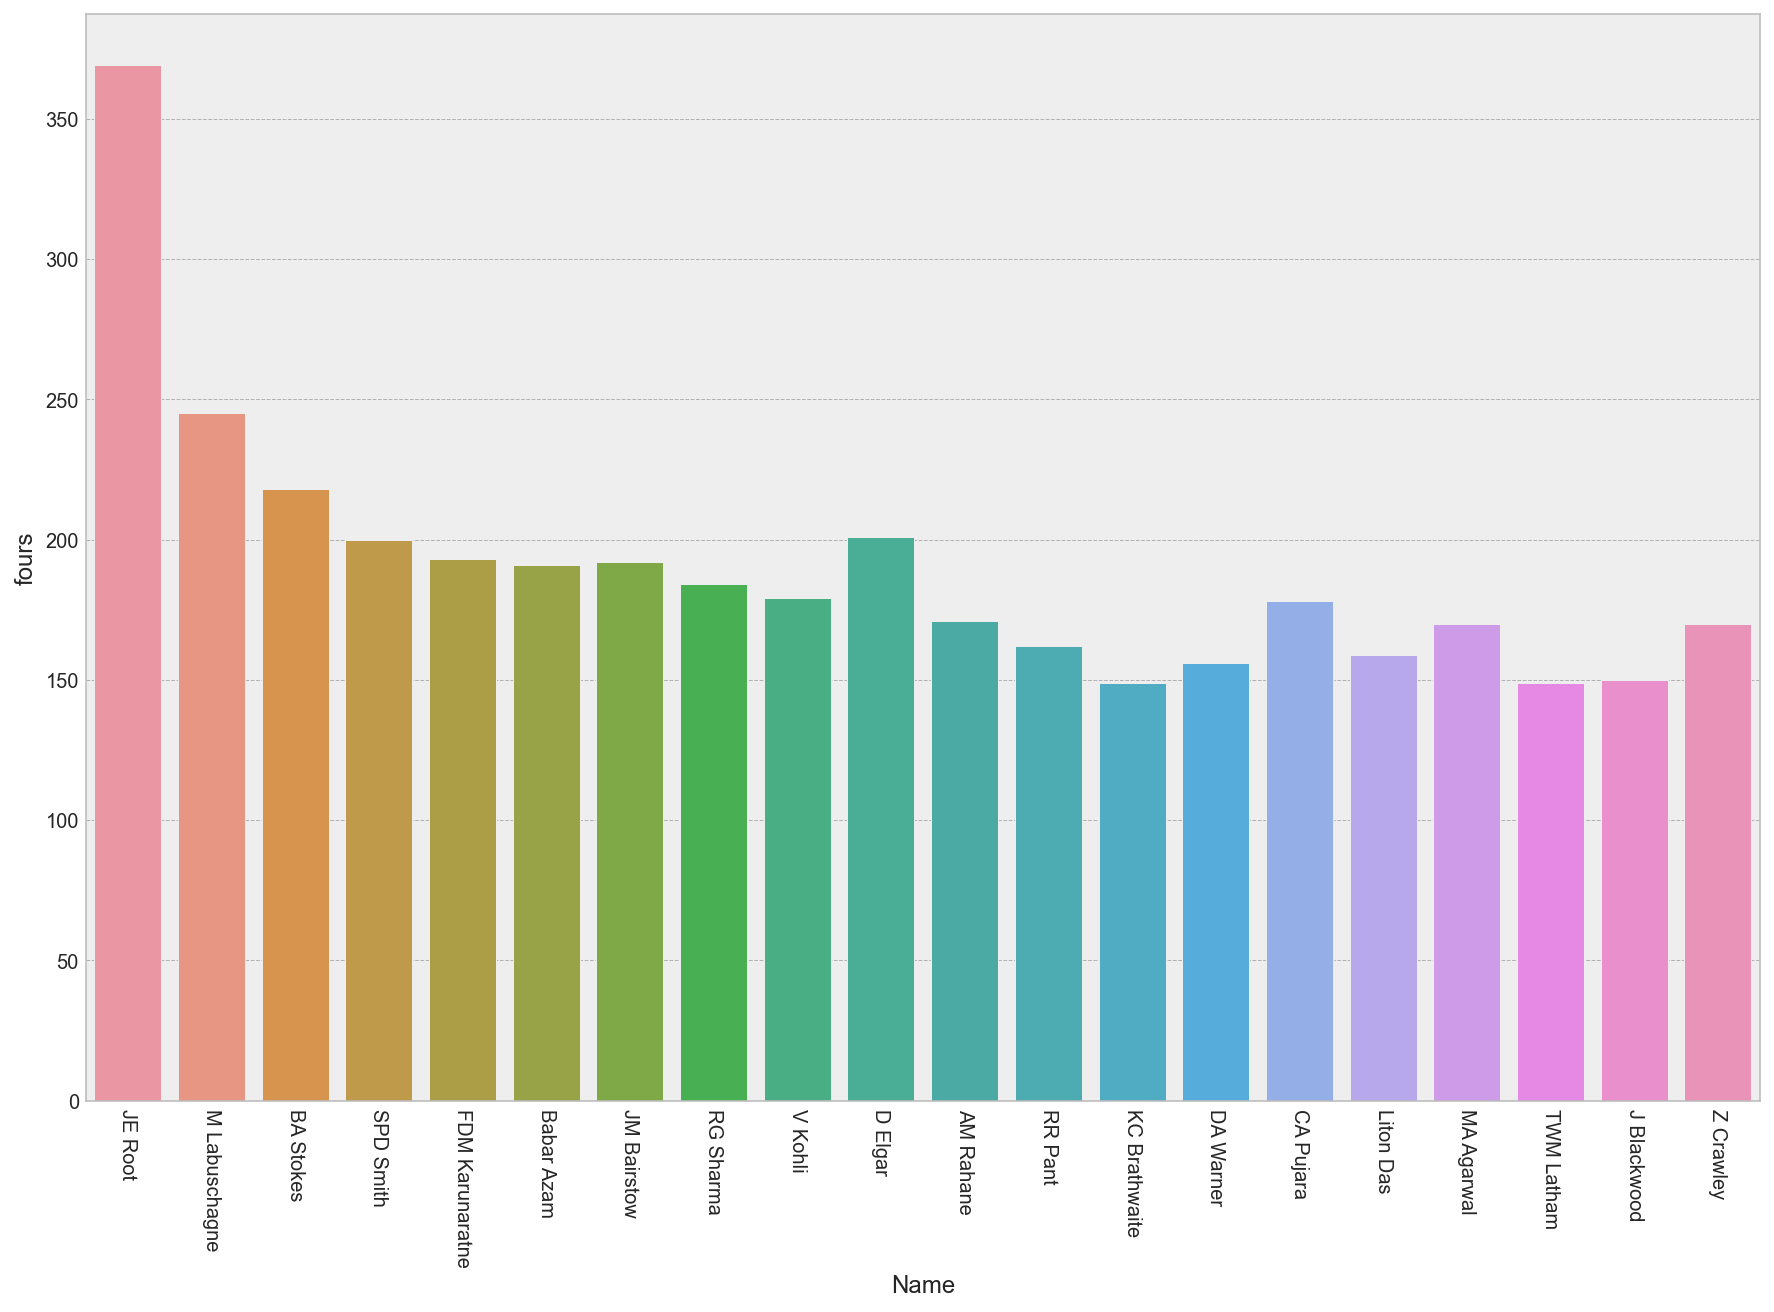

In [138]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'fours', );

### Sixes

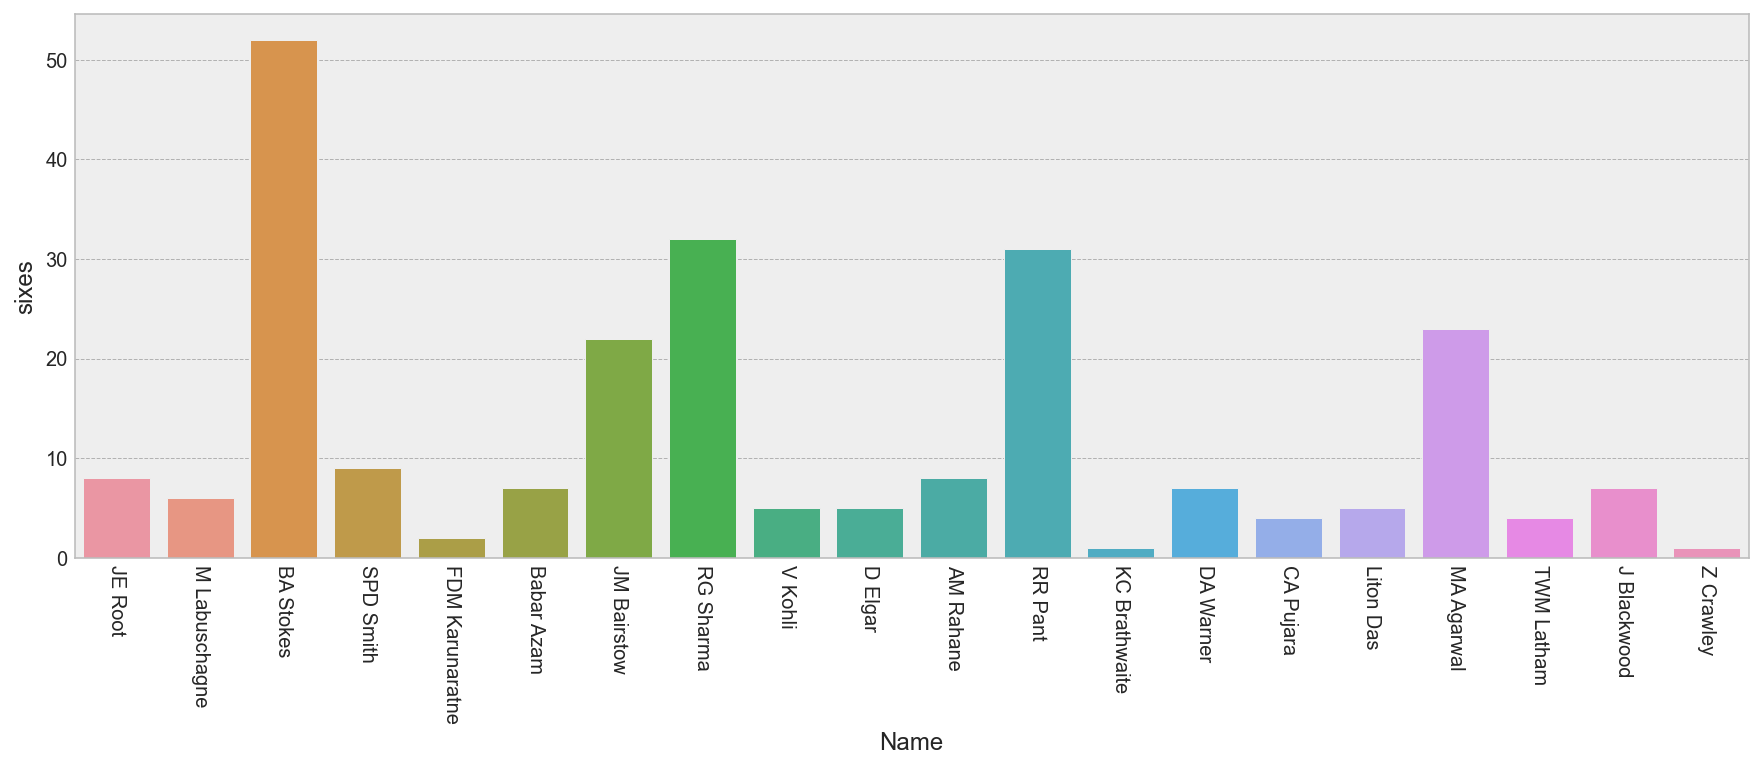

In [139]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats.head(20) , x = 'Name', y = 'sixes', );

### Team wise total number of playes

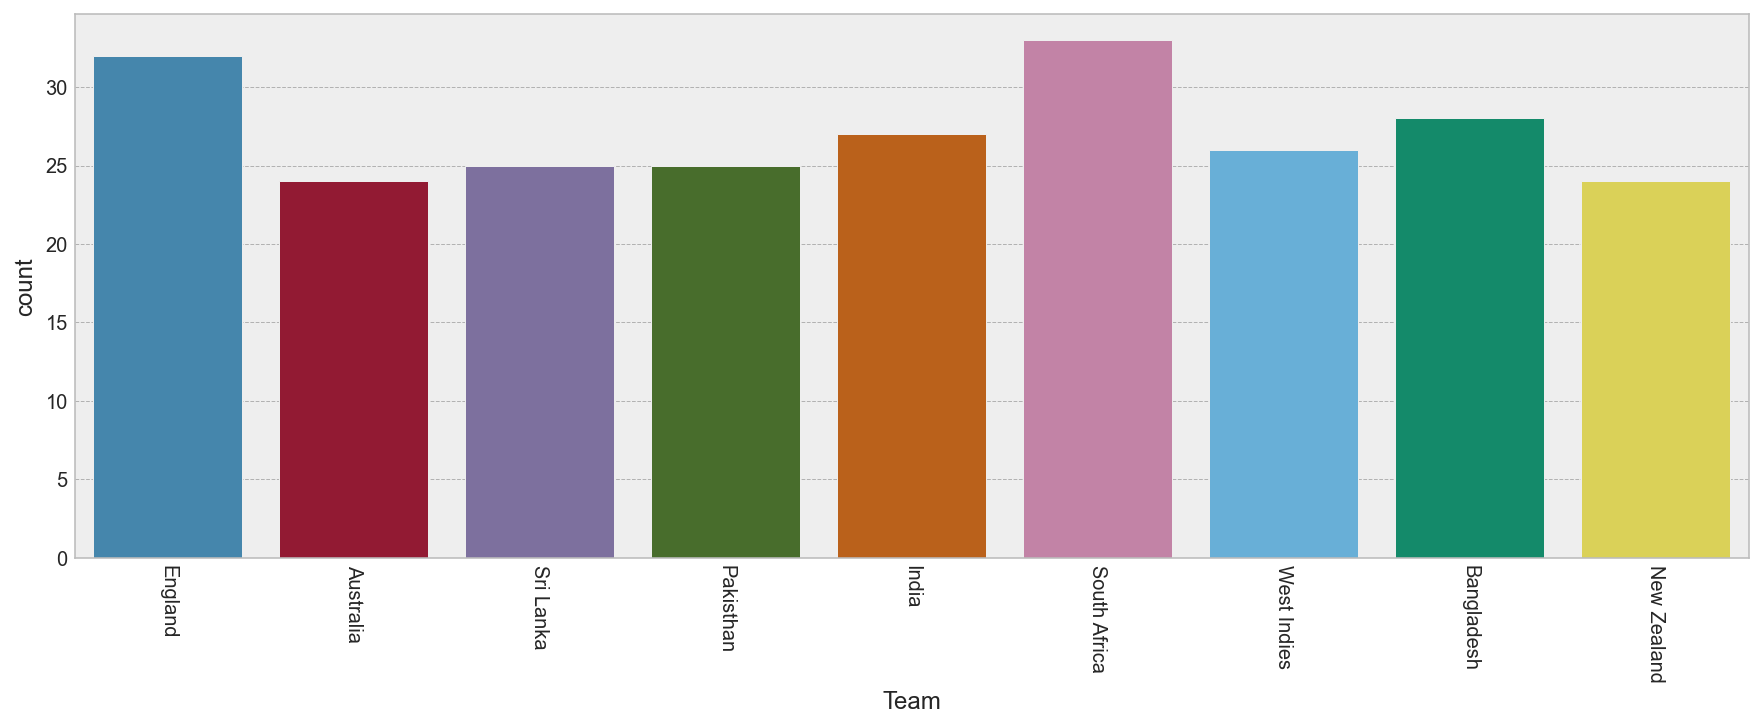

In [140]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 270)
sns.countplot(data = Icc_WTC_Batting_Stats, x = 'Team');

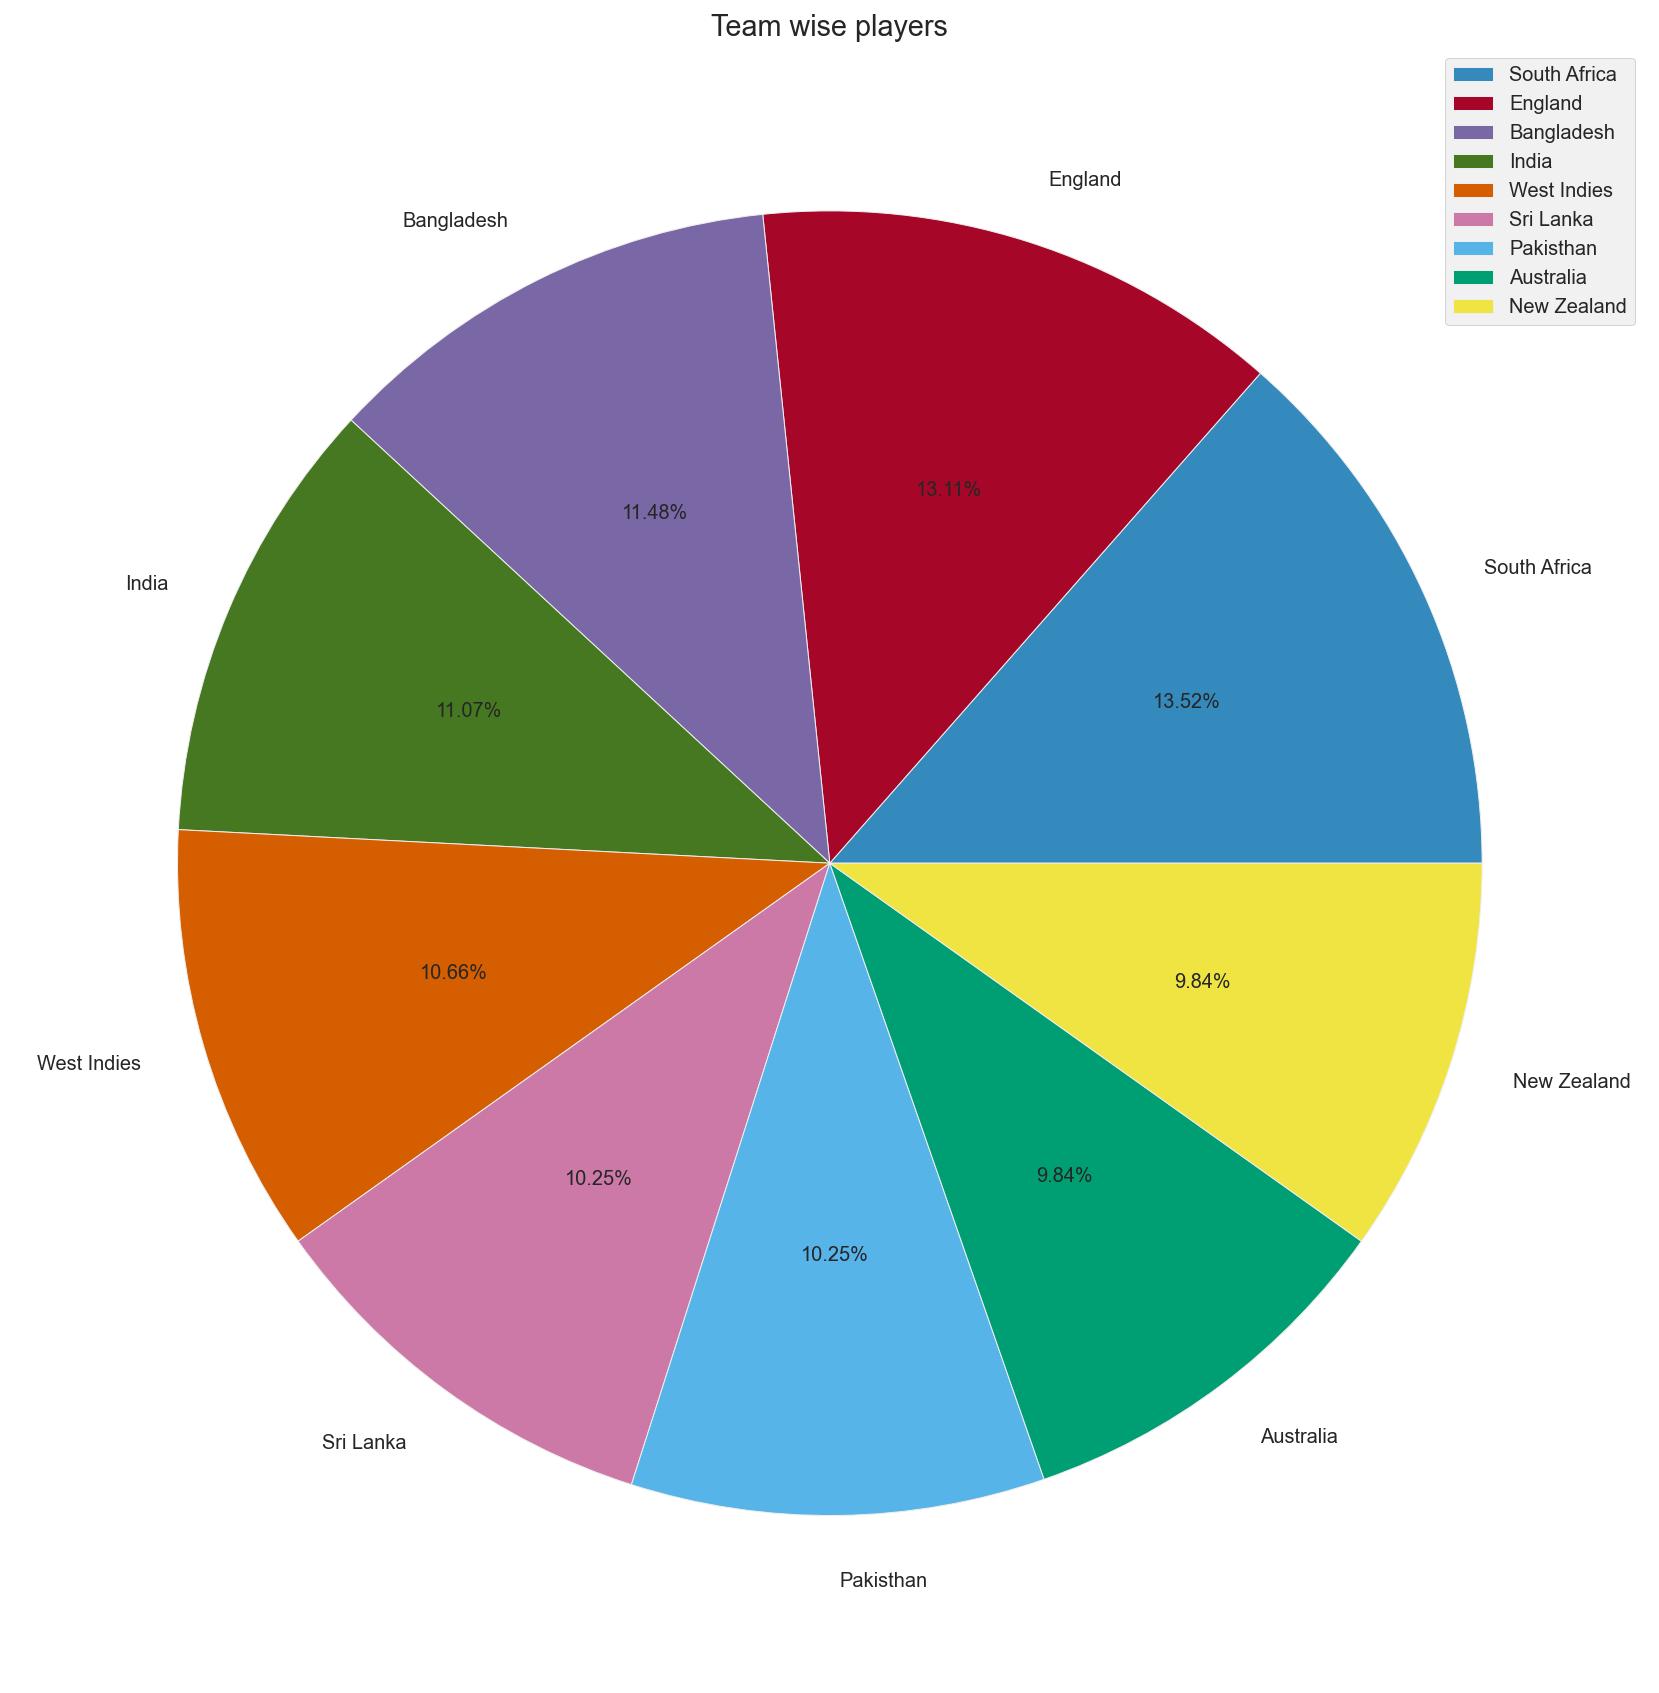

In [141]:
plt.figure(figsize=(15,15))
plt.pie(x = Icc_WTC_Batting_Stats.Team.value_counts().values,
       labels = Icc_WTC_Batting_Stats.Team.value_counts().index,
       autopct = '%.2f%%')
plt.title('Team wise players')
plt.legend();

### Correlation

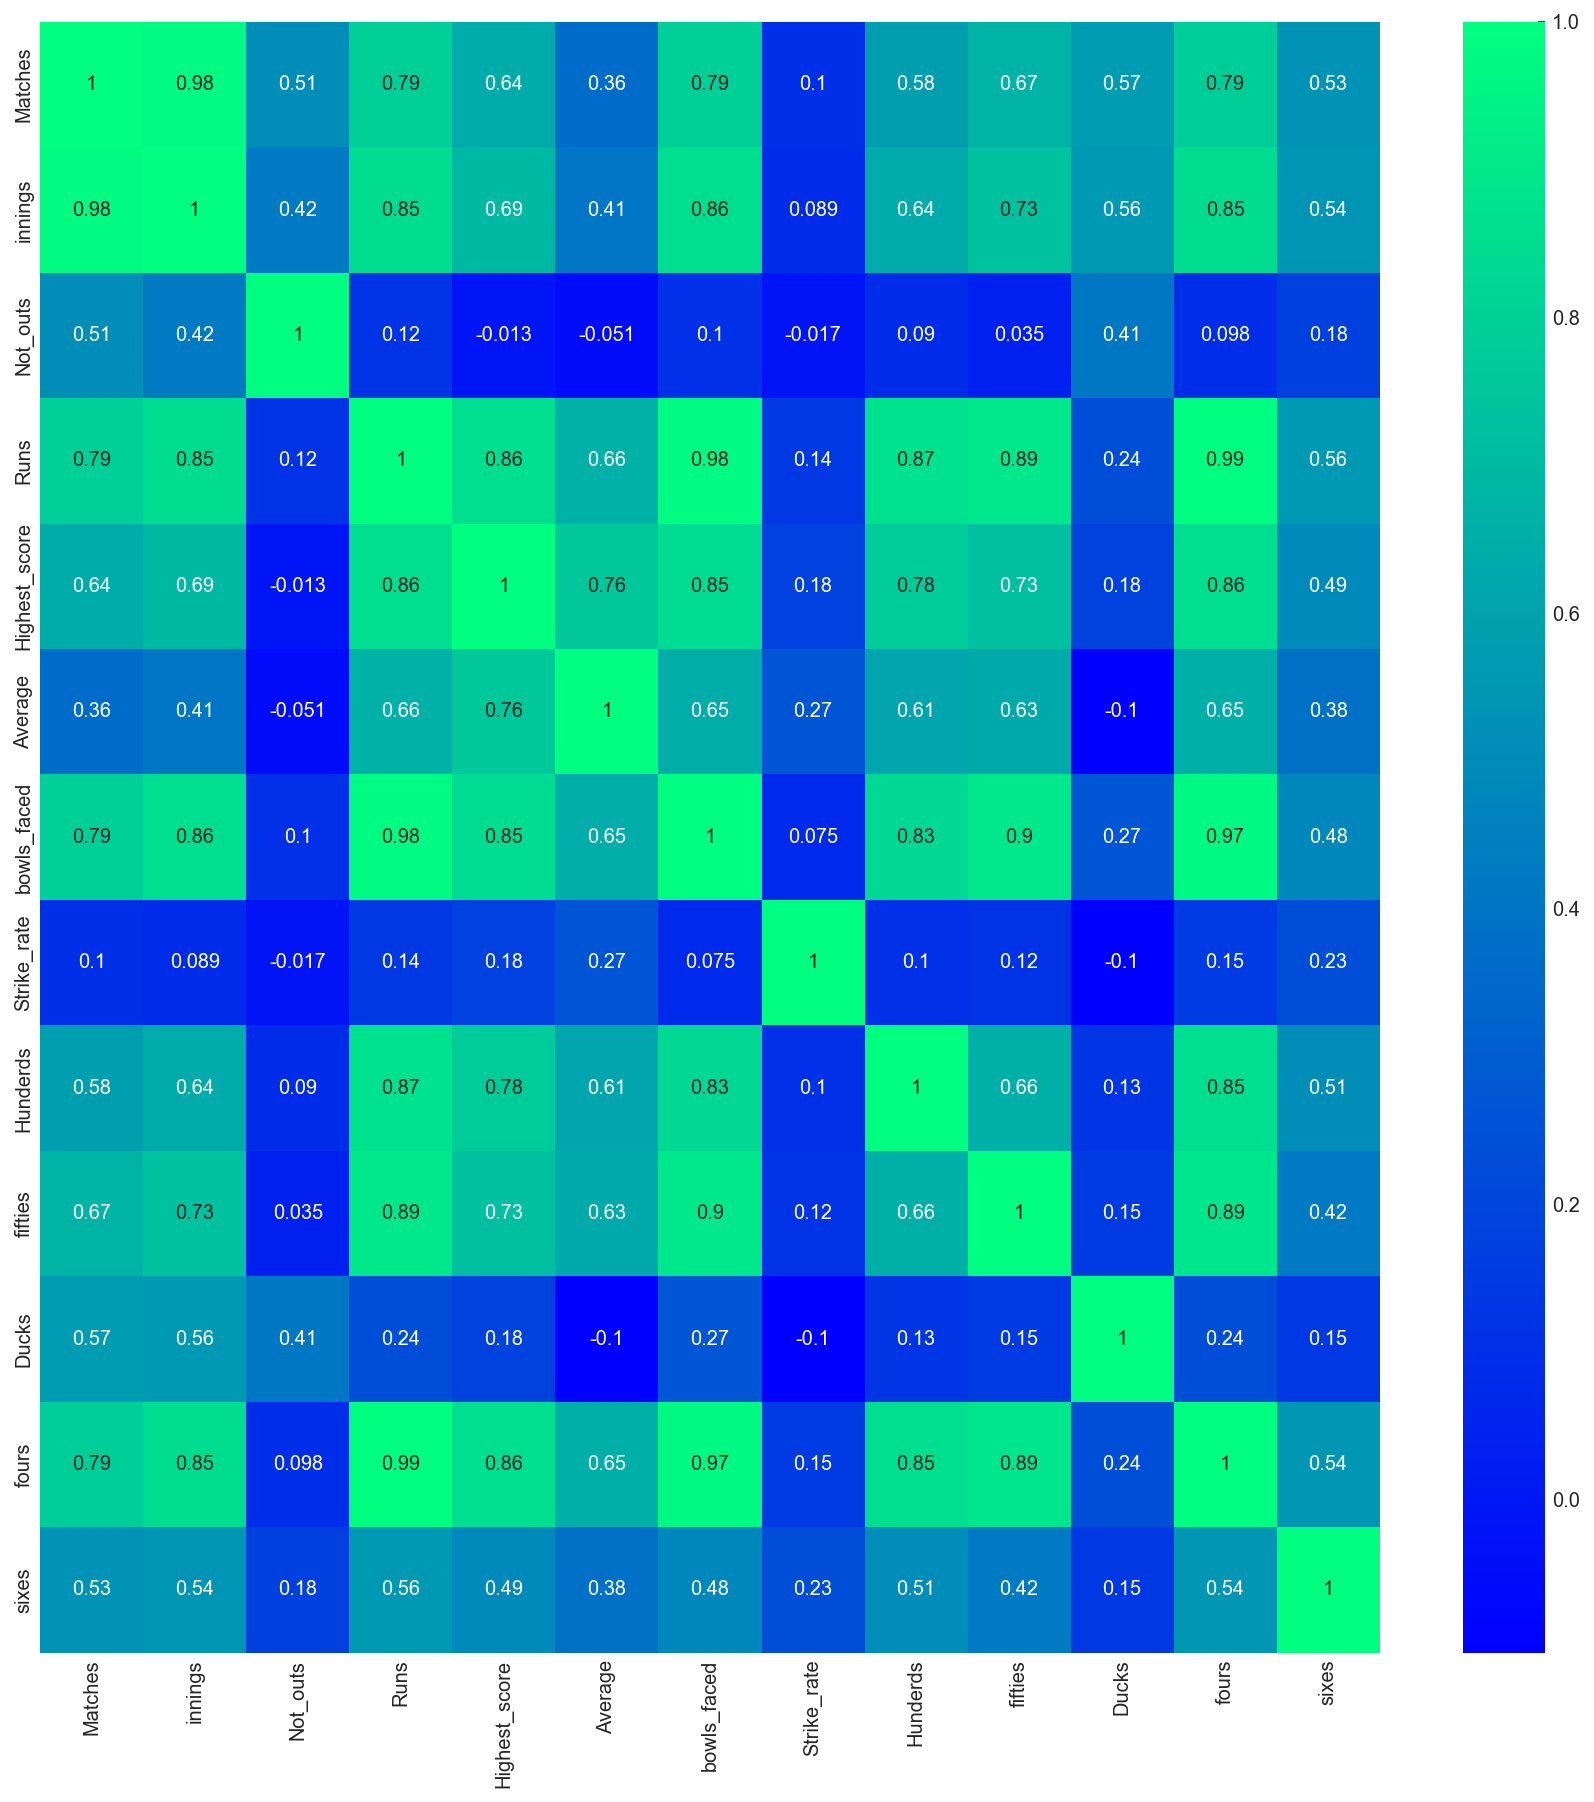

In [142]:
plt.figure(figsize=(15,15))
sns.heatmap(Icc_WTC_Batting_Stats.corr(), cmap = 'winter', annot=True);

### Matches vs Runs

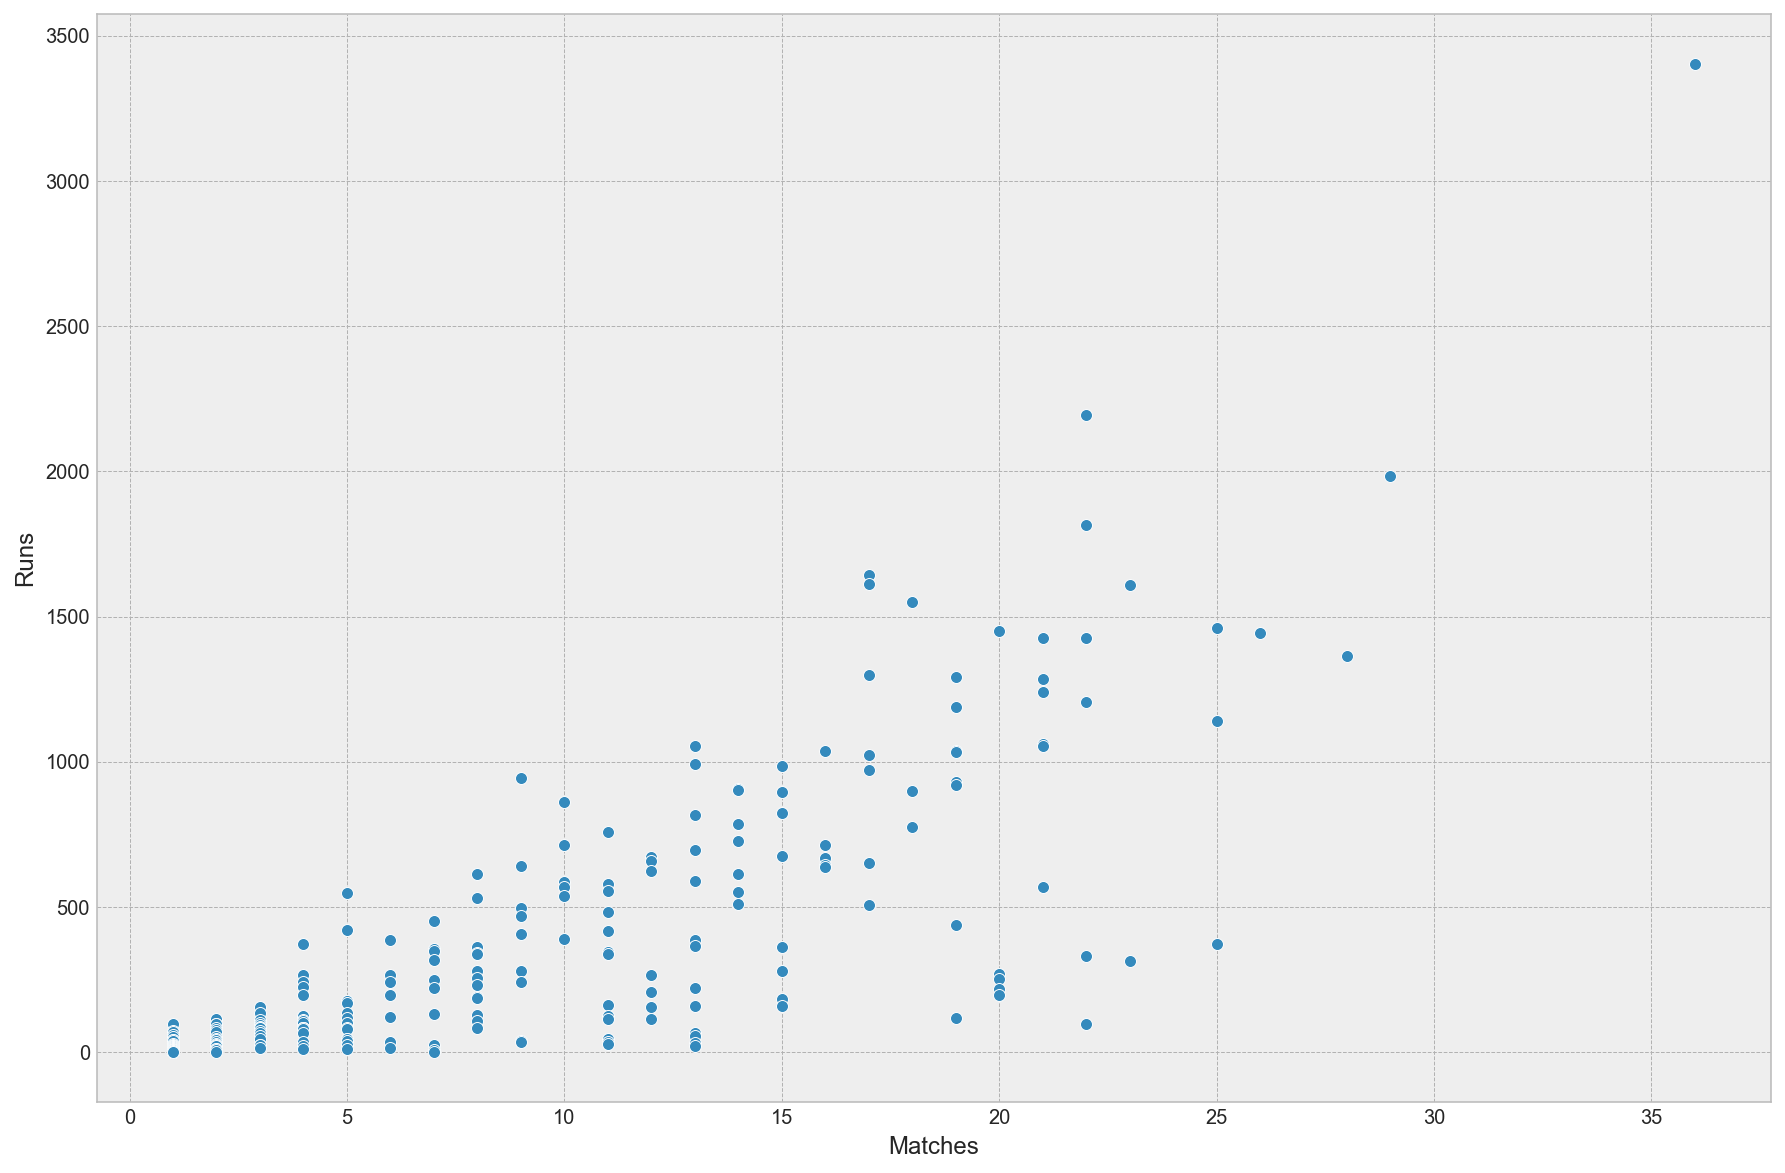

In [143]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "Matches", y = 'Runs');

### Matches vs  Average

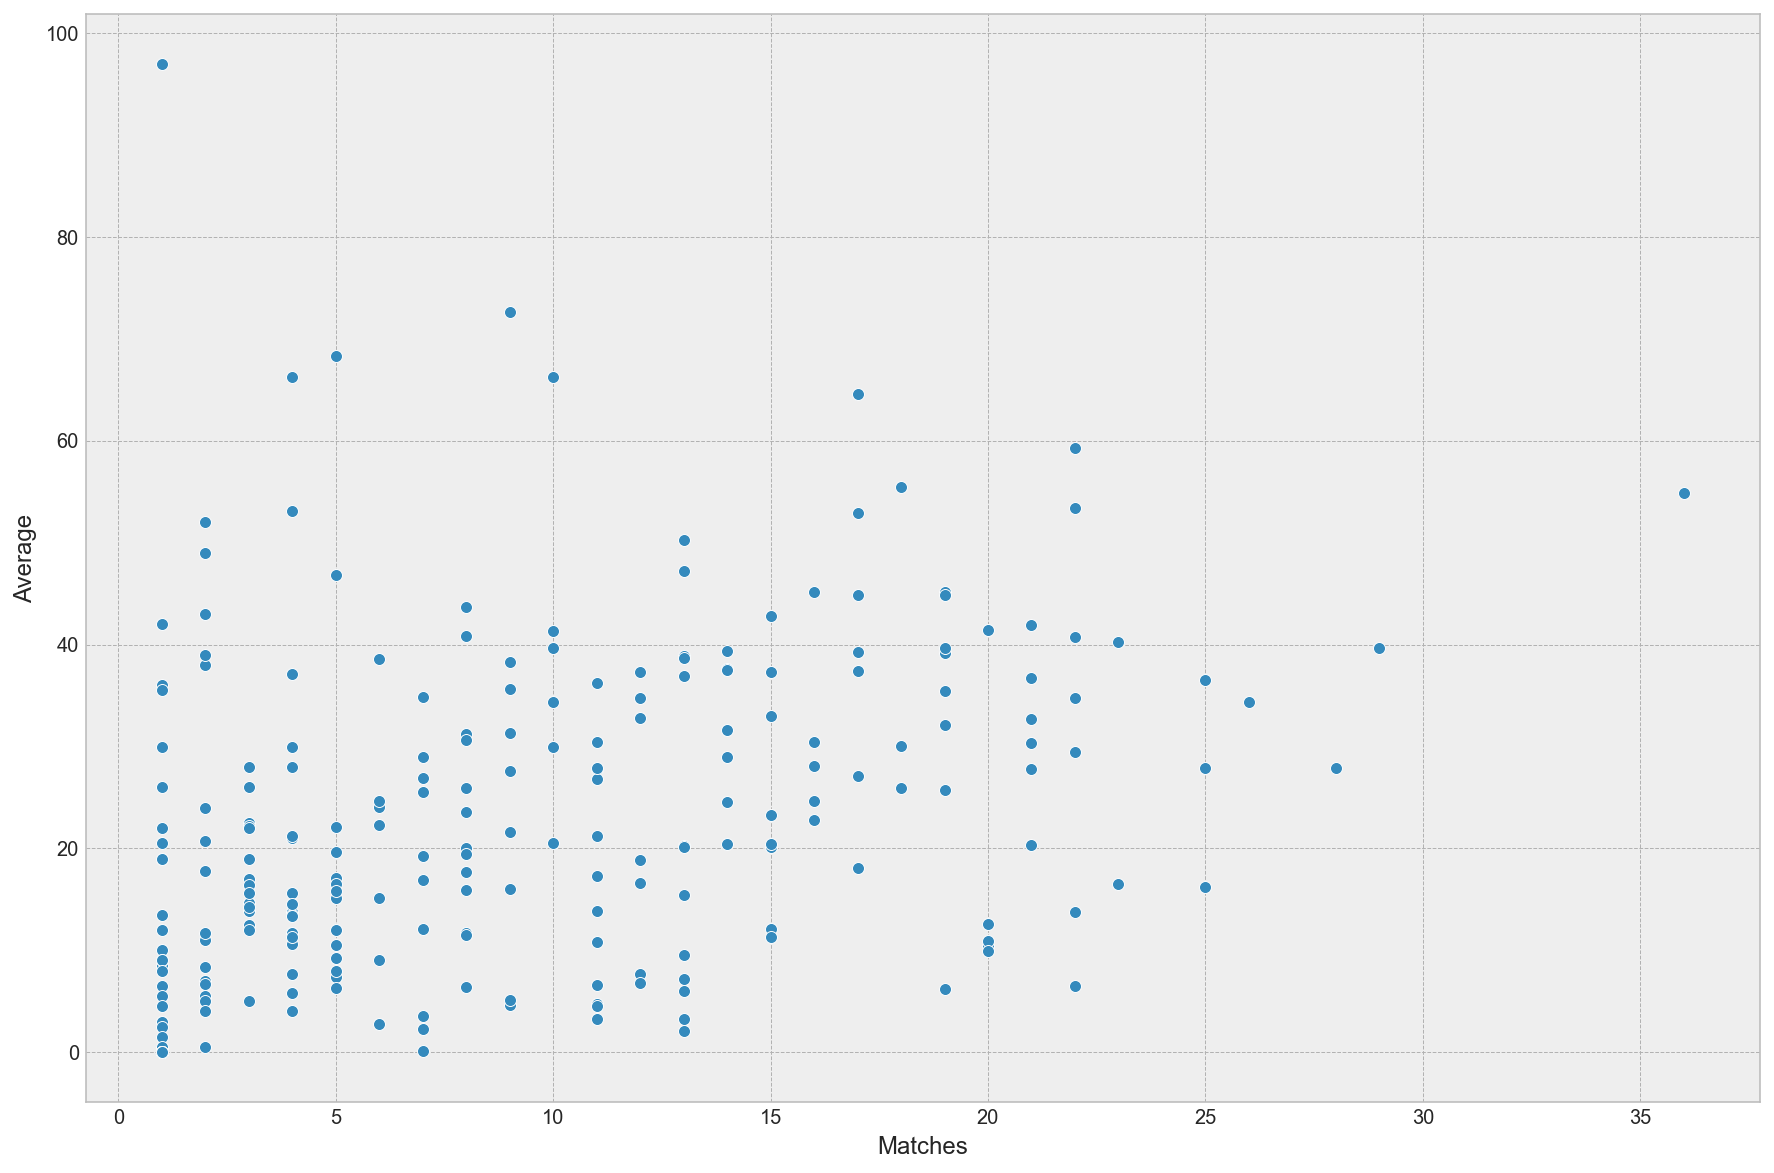

In [144]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "Matches", y = 'Average');

### Matches vs  balls faced 

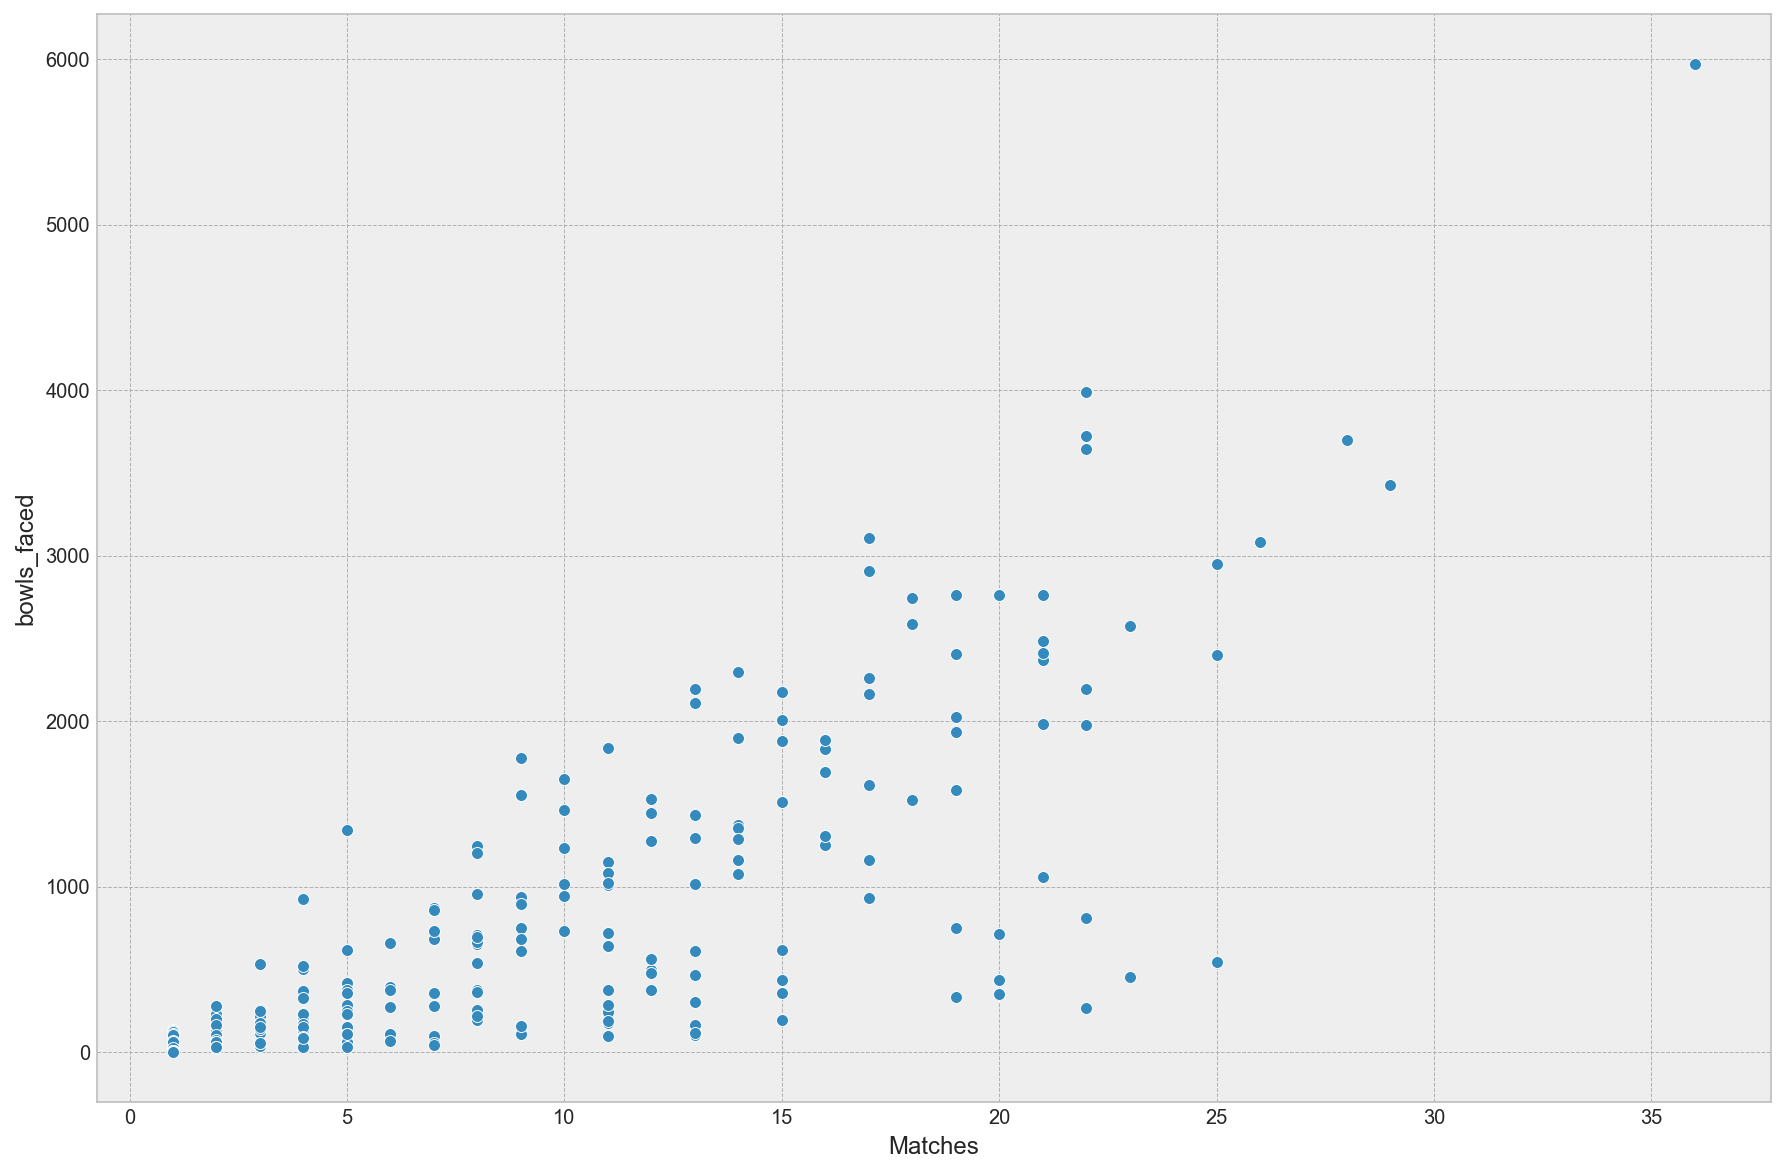

In [145]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "Matches", y = 'bowls_faced');

### Innings Vs Runs

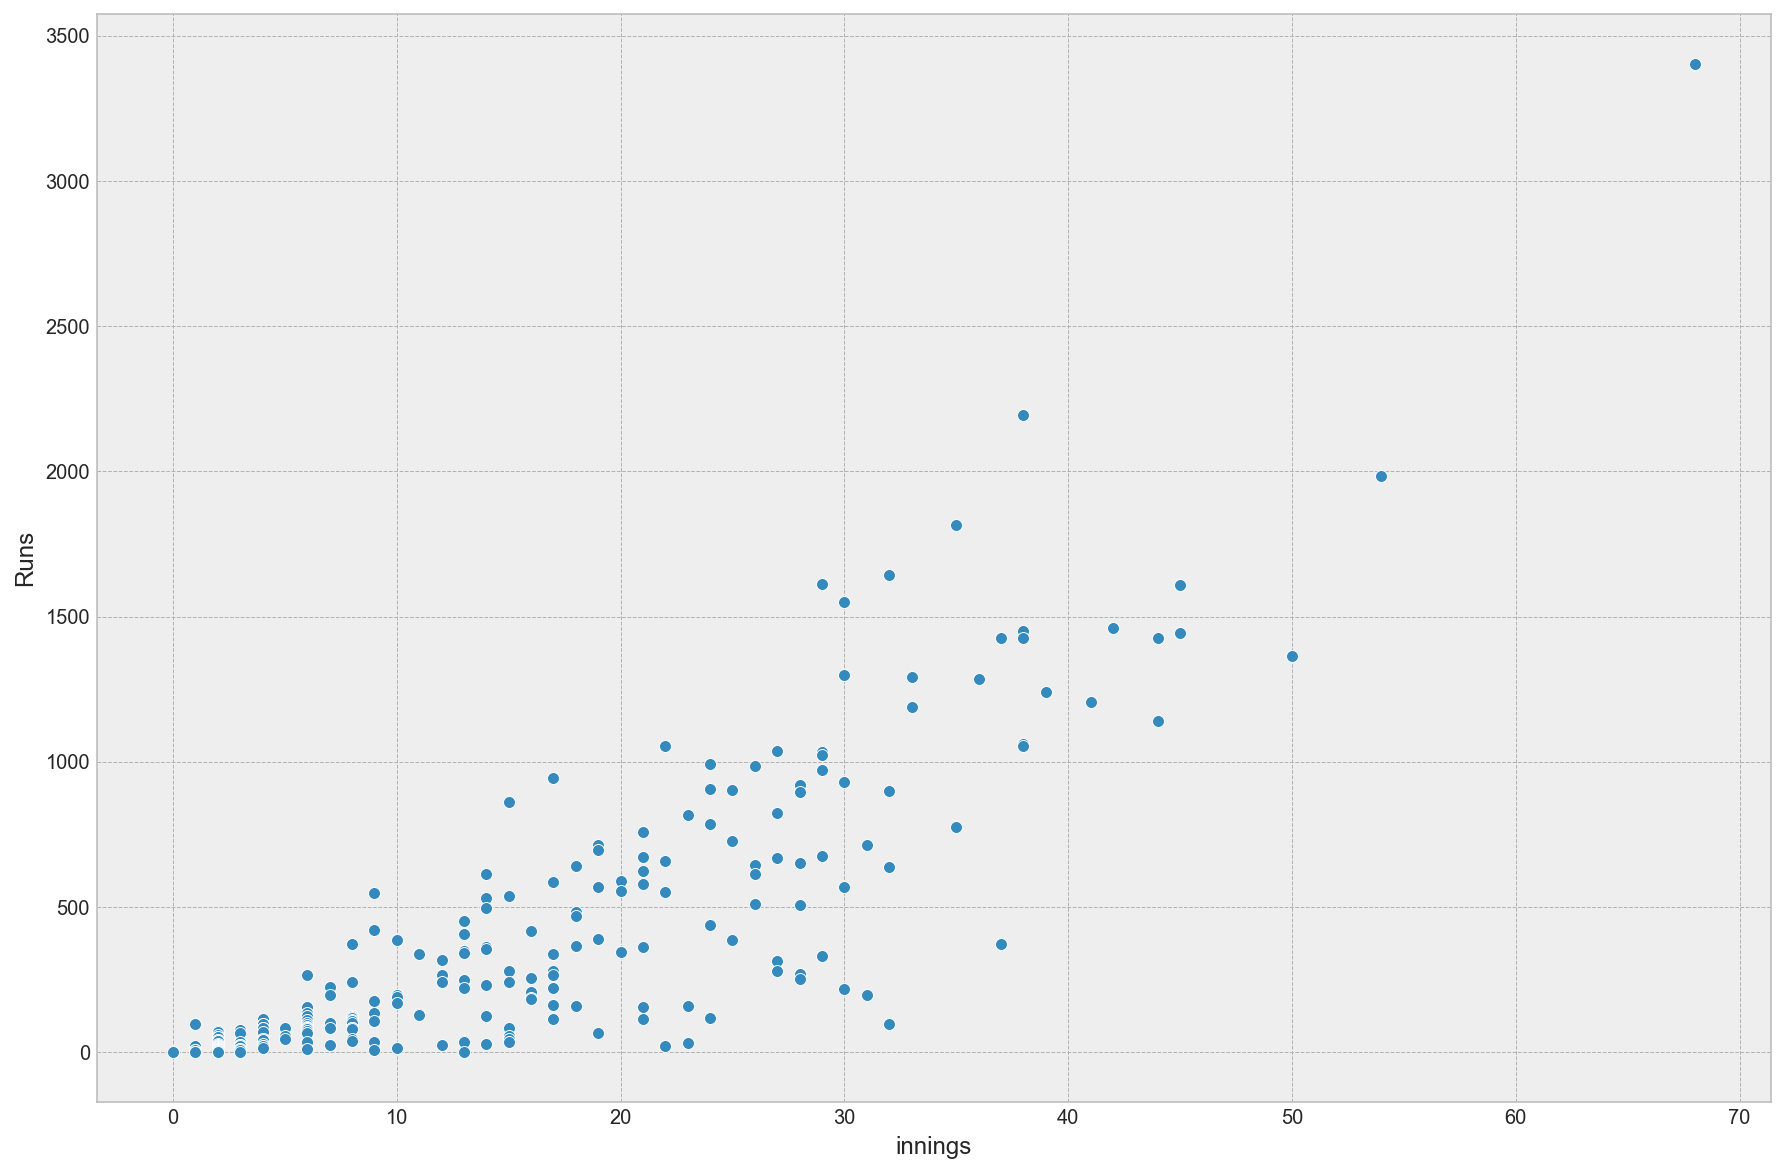

In [146]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "innings", y = 'Runs');

### Innings Vs Average

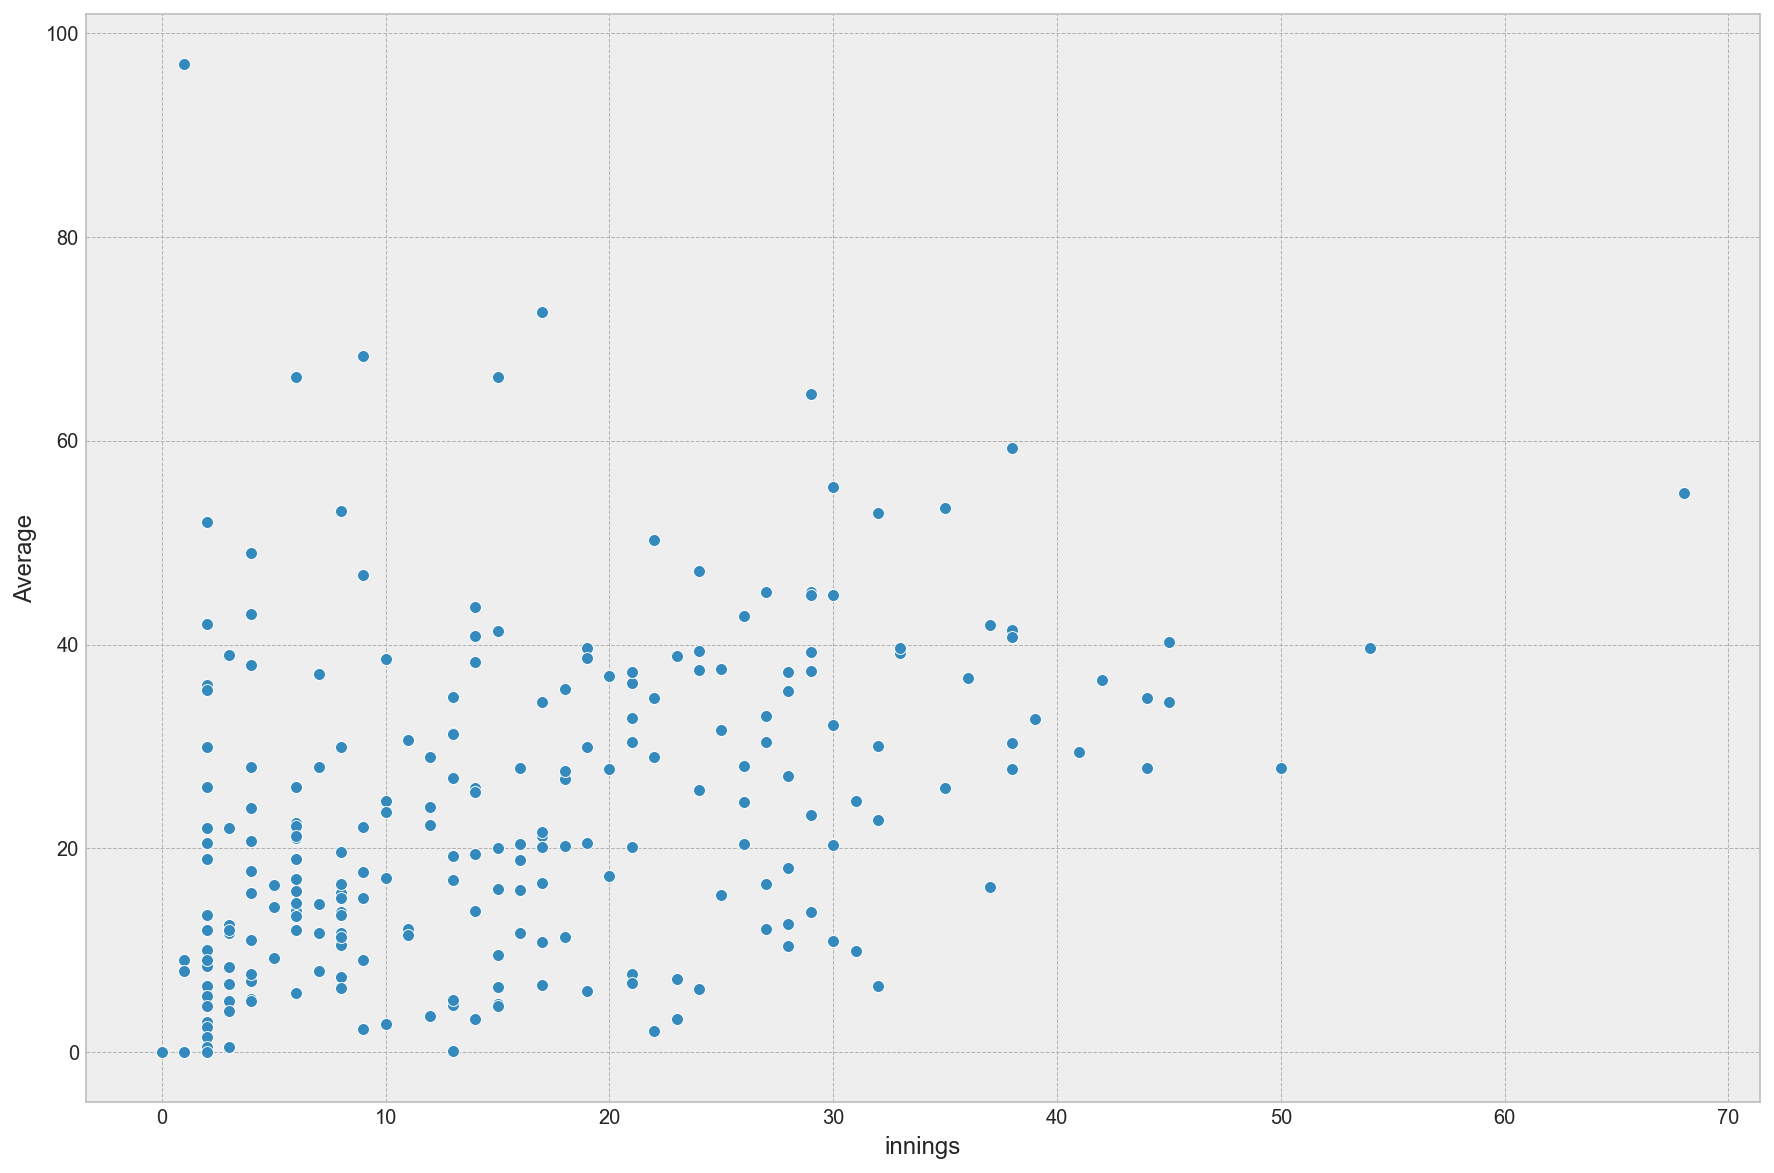

In [147]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "innings", y = 'Average');

### Balls faced vs Runs

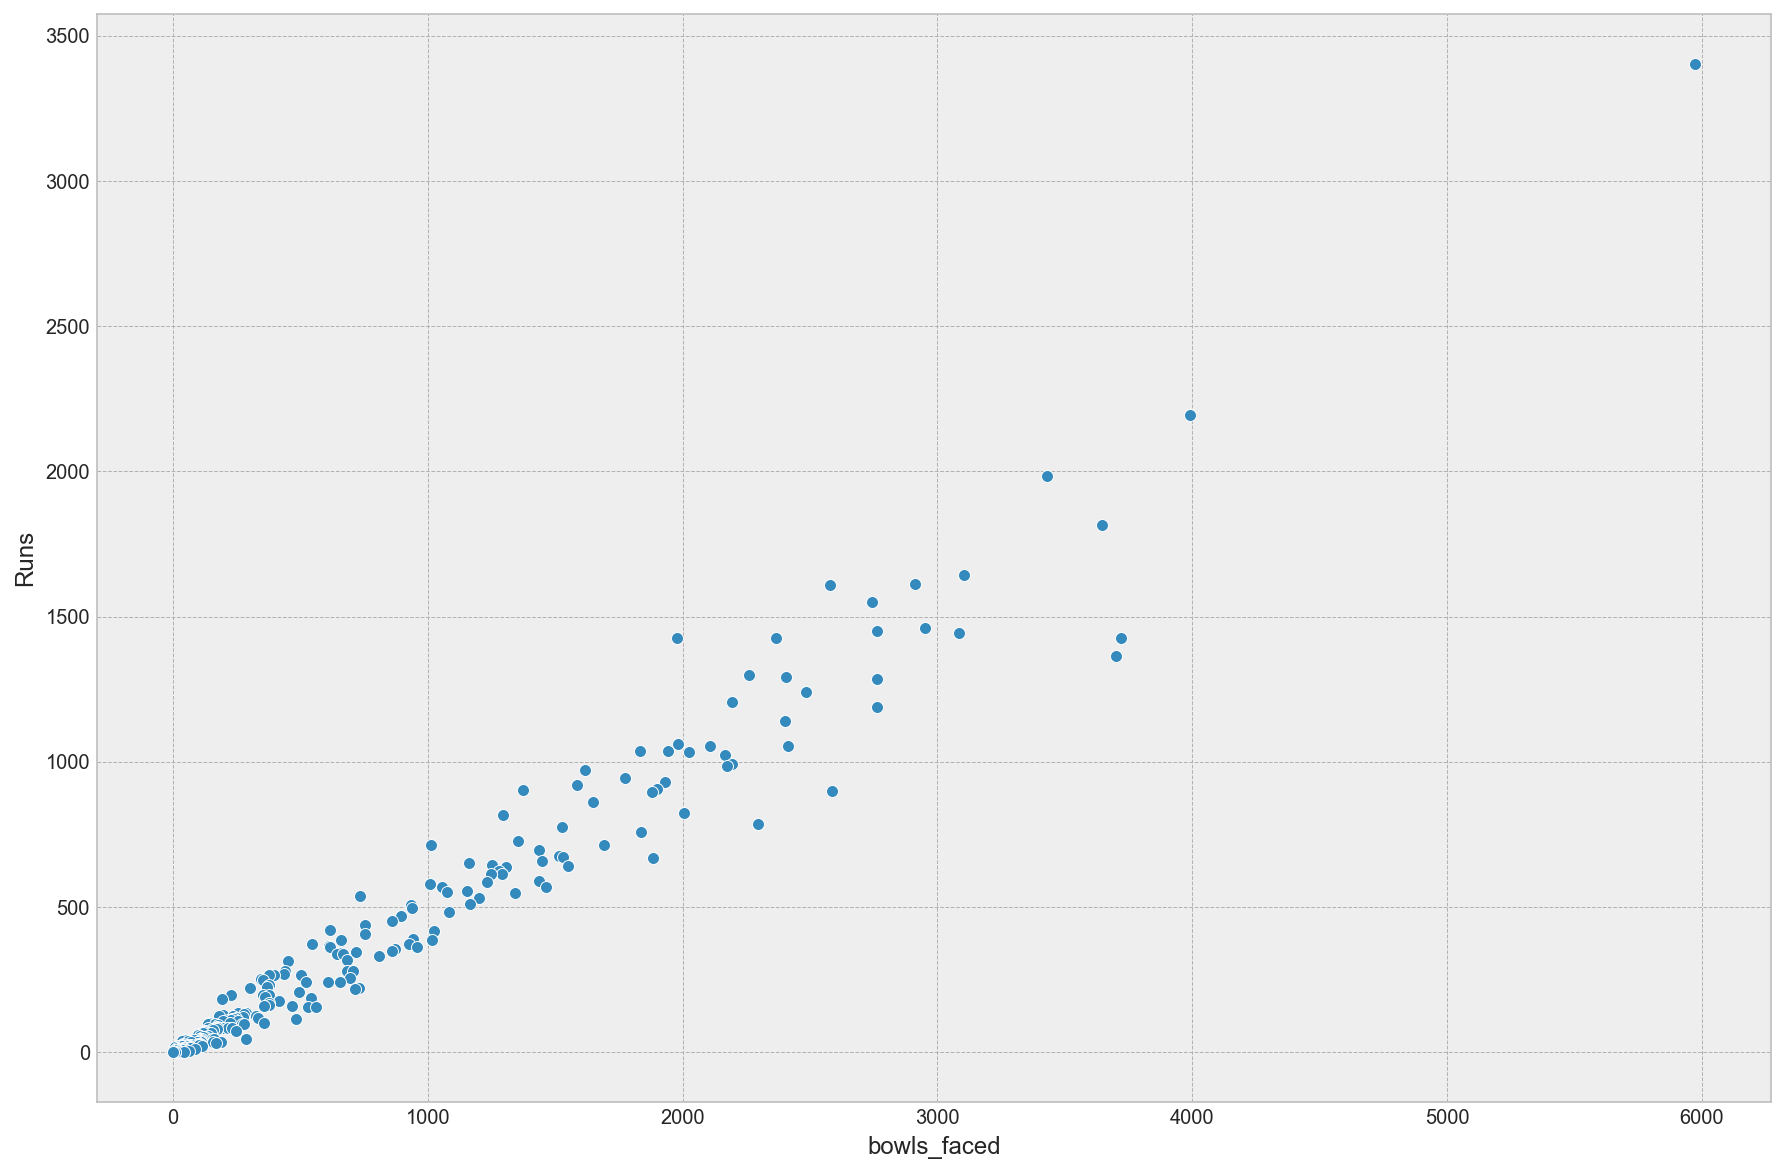

In [148]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "bowls_faced", y = 'Runs');

### Strike rate vs balls faced

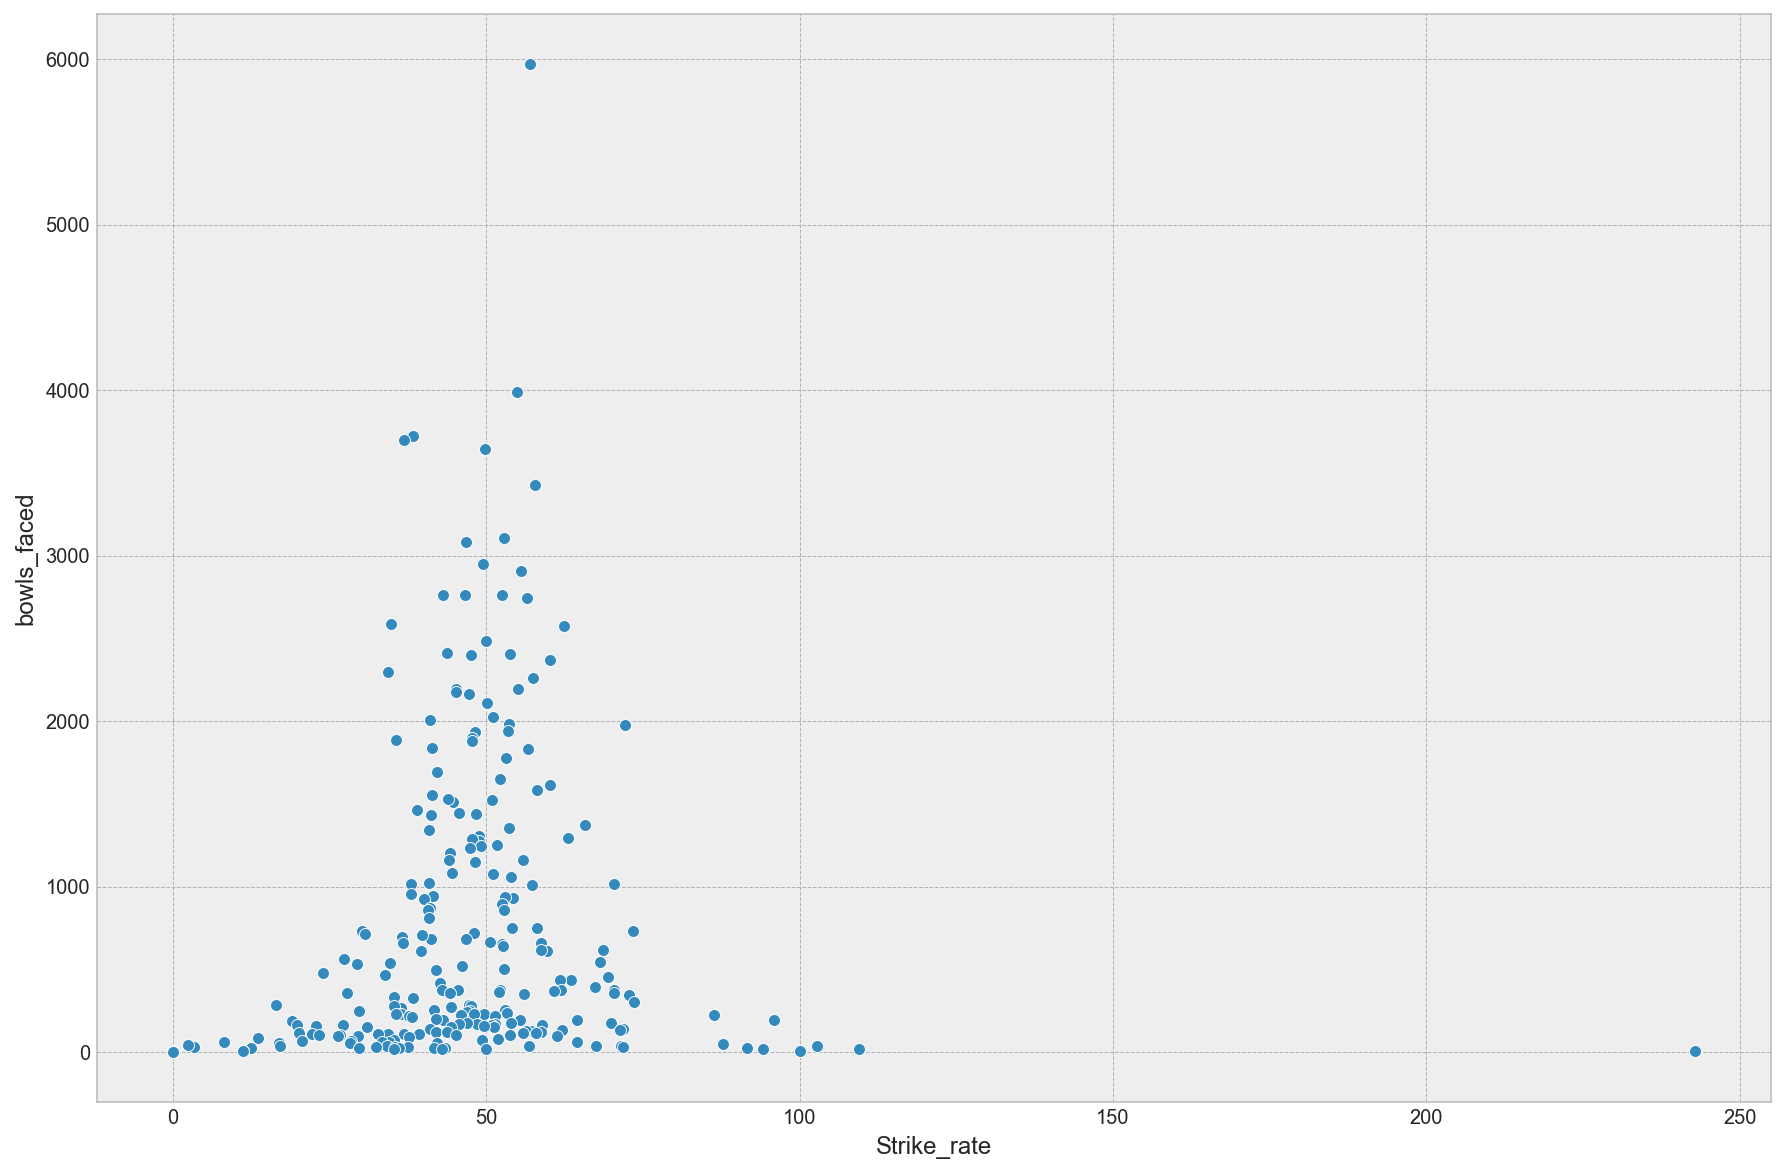

In [149]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "Strike_rate", y = 'bowls_faced');

### Strike rate vs Runs

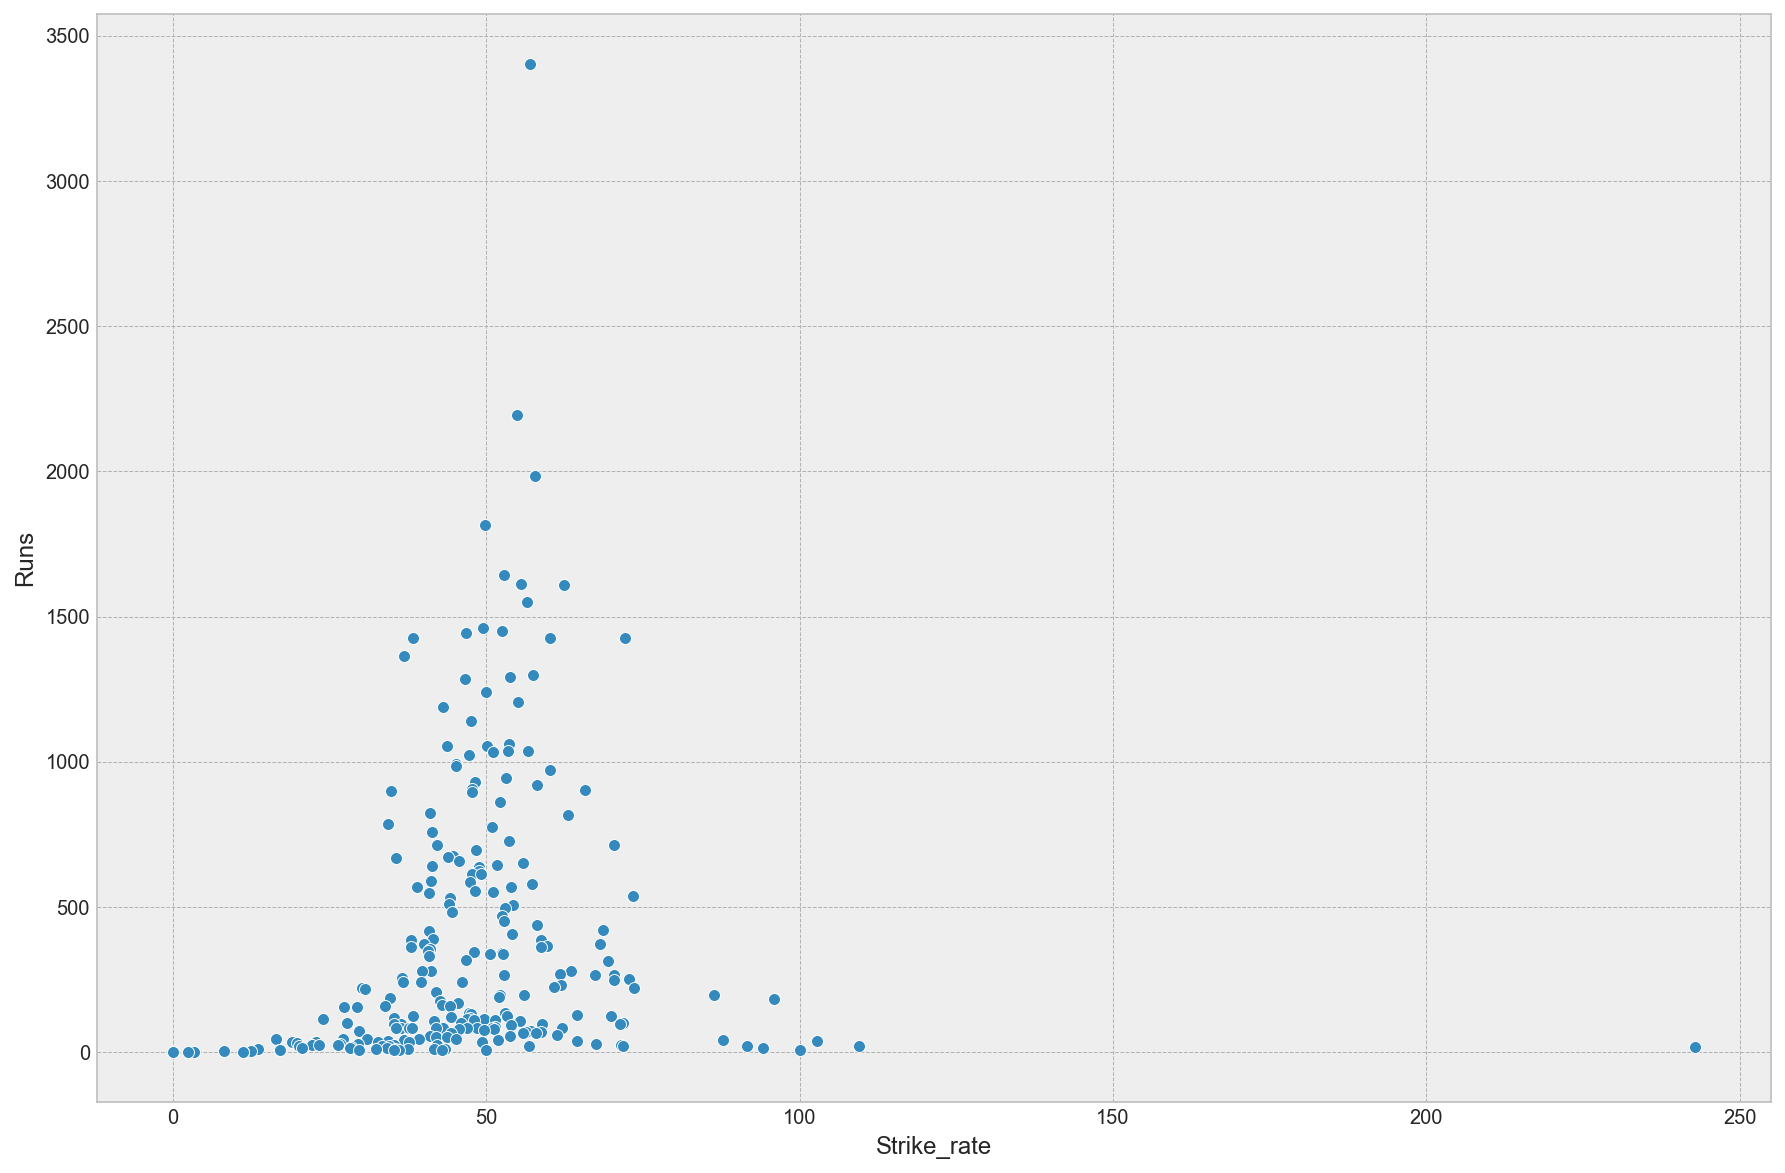

In [150]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Batting_Stats, x = "Strike_rate", y = 'Runs');

### Team wise Runs

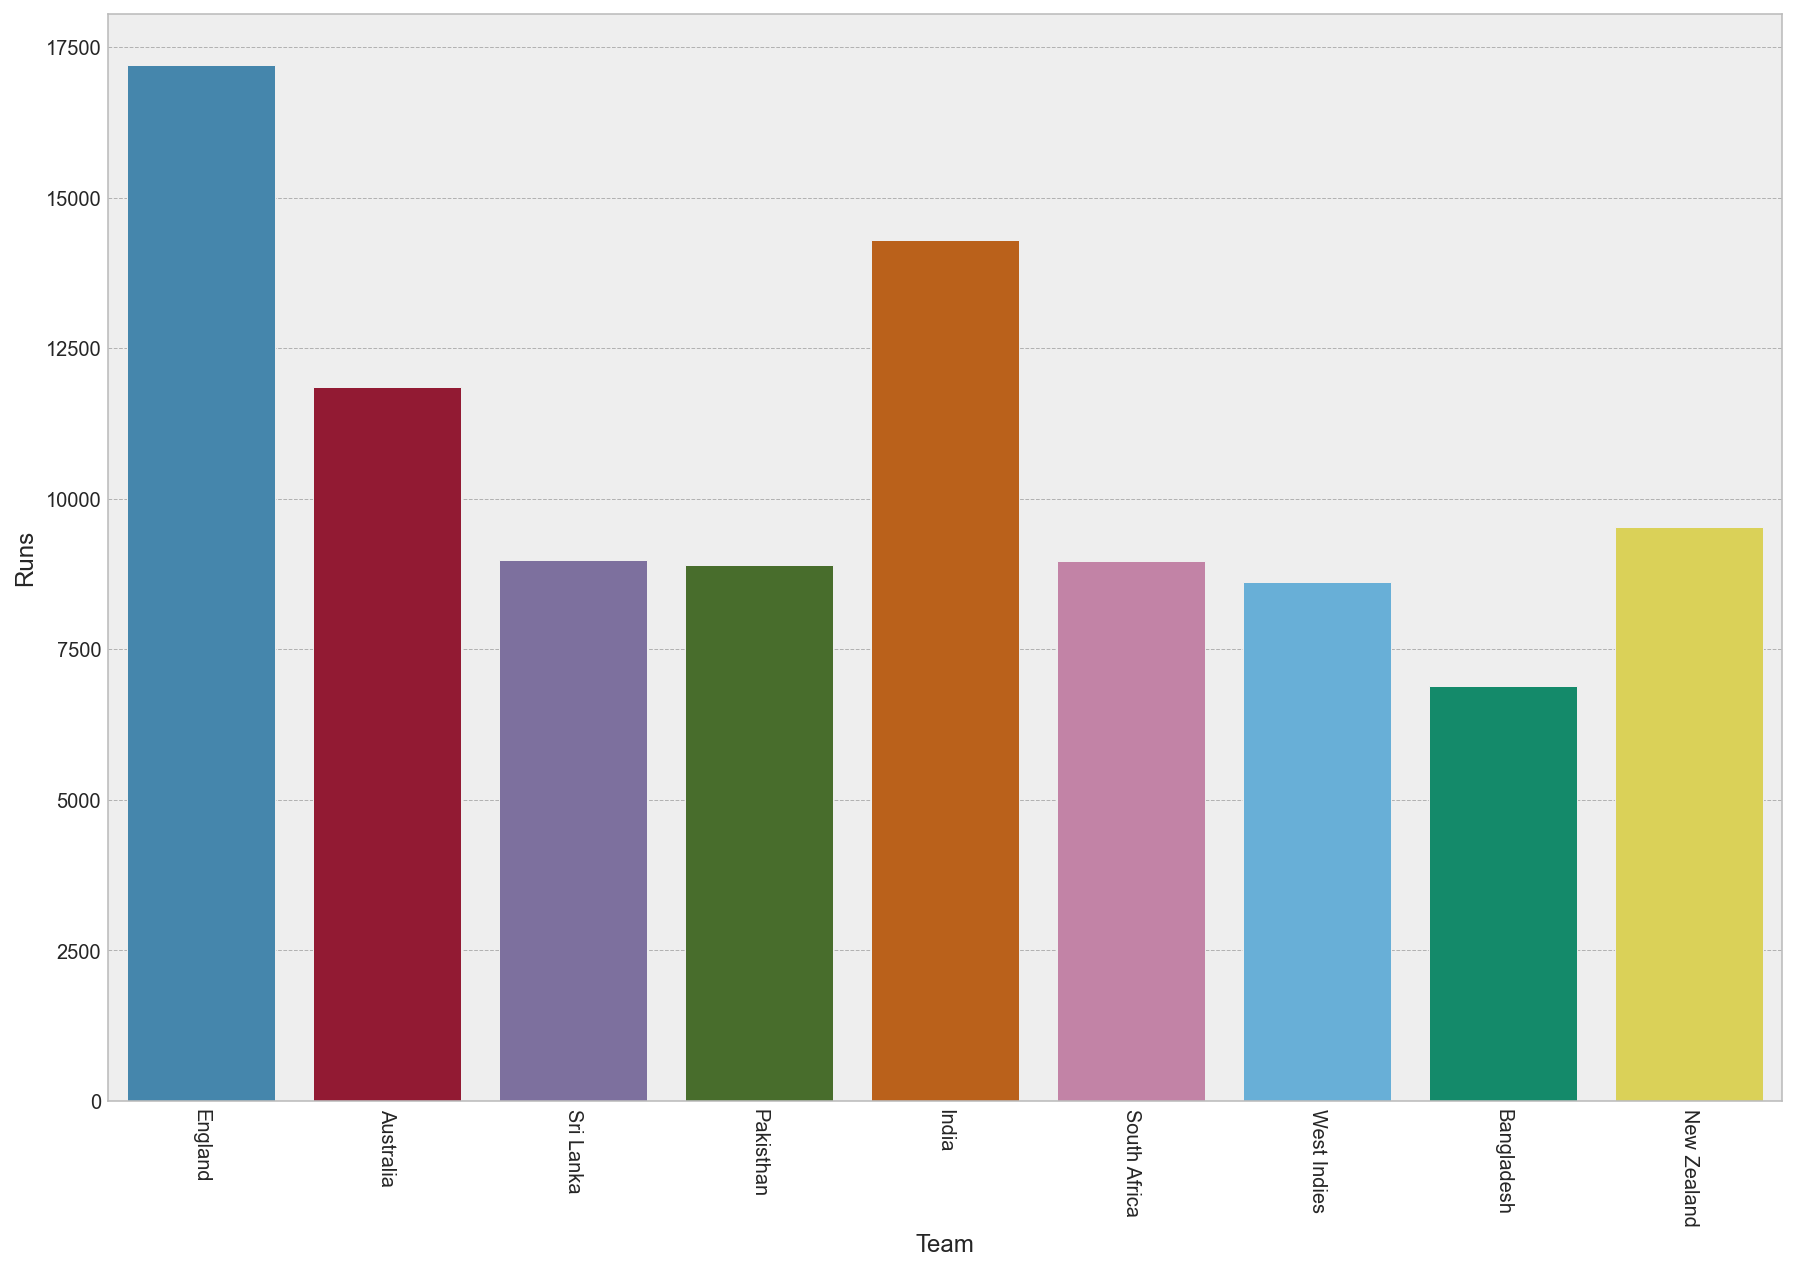

In [151]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'Runs',estimator= np.sum, ci = 0 );

### Team wise Hunderds

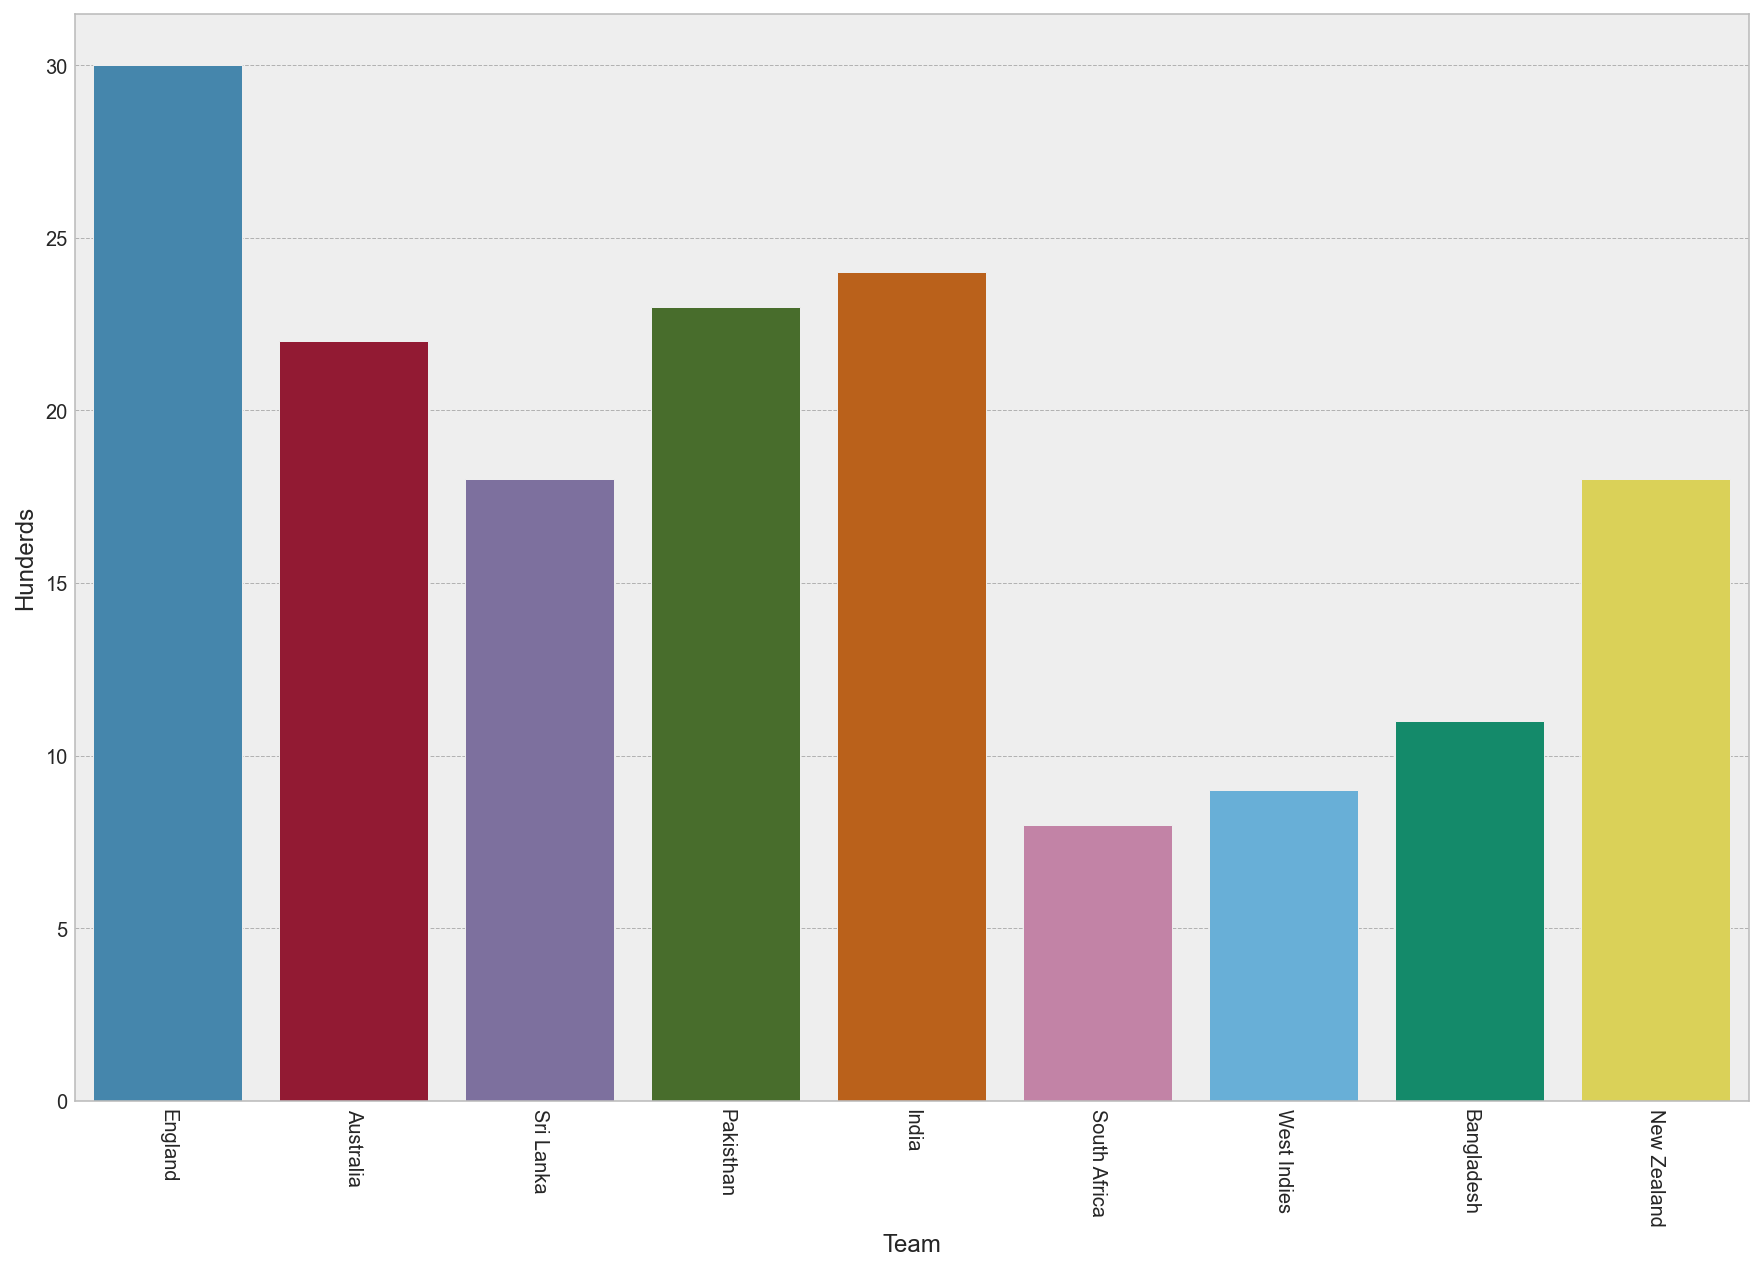

In [152]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'Hunderds',estimator= np.sum , ci = 0 );

### Team wise Fours

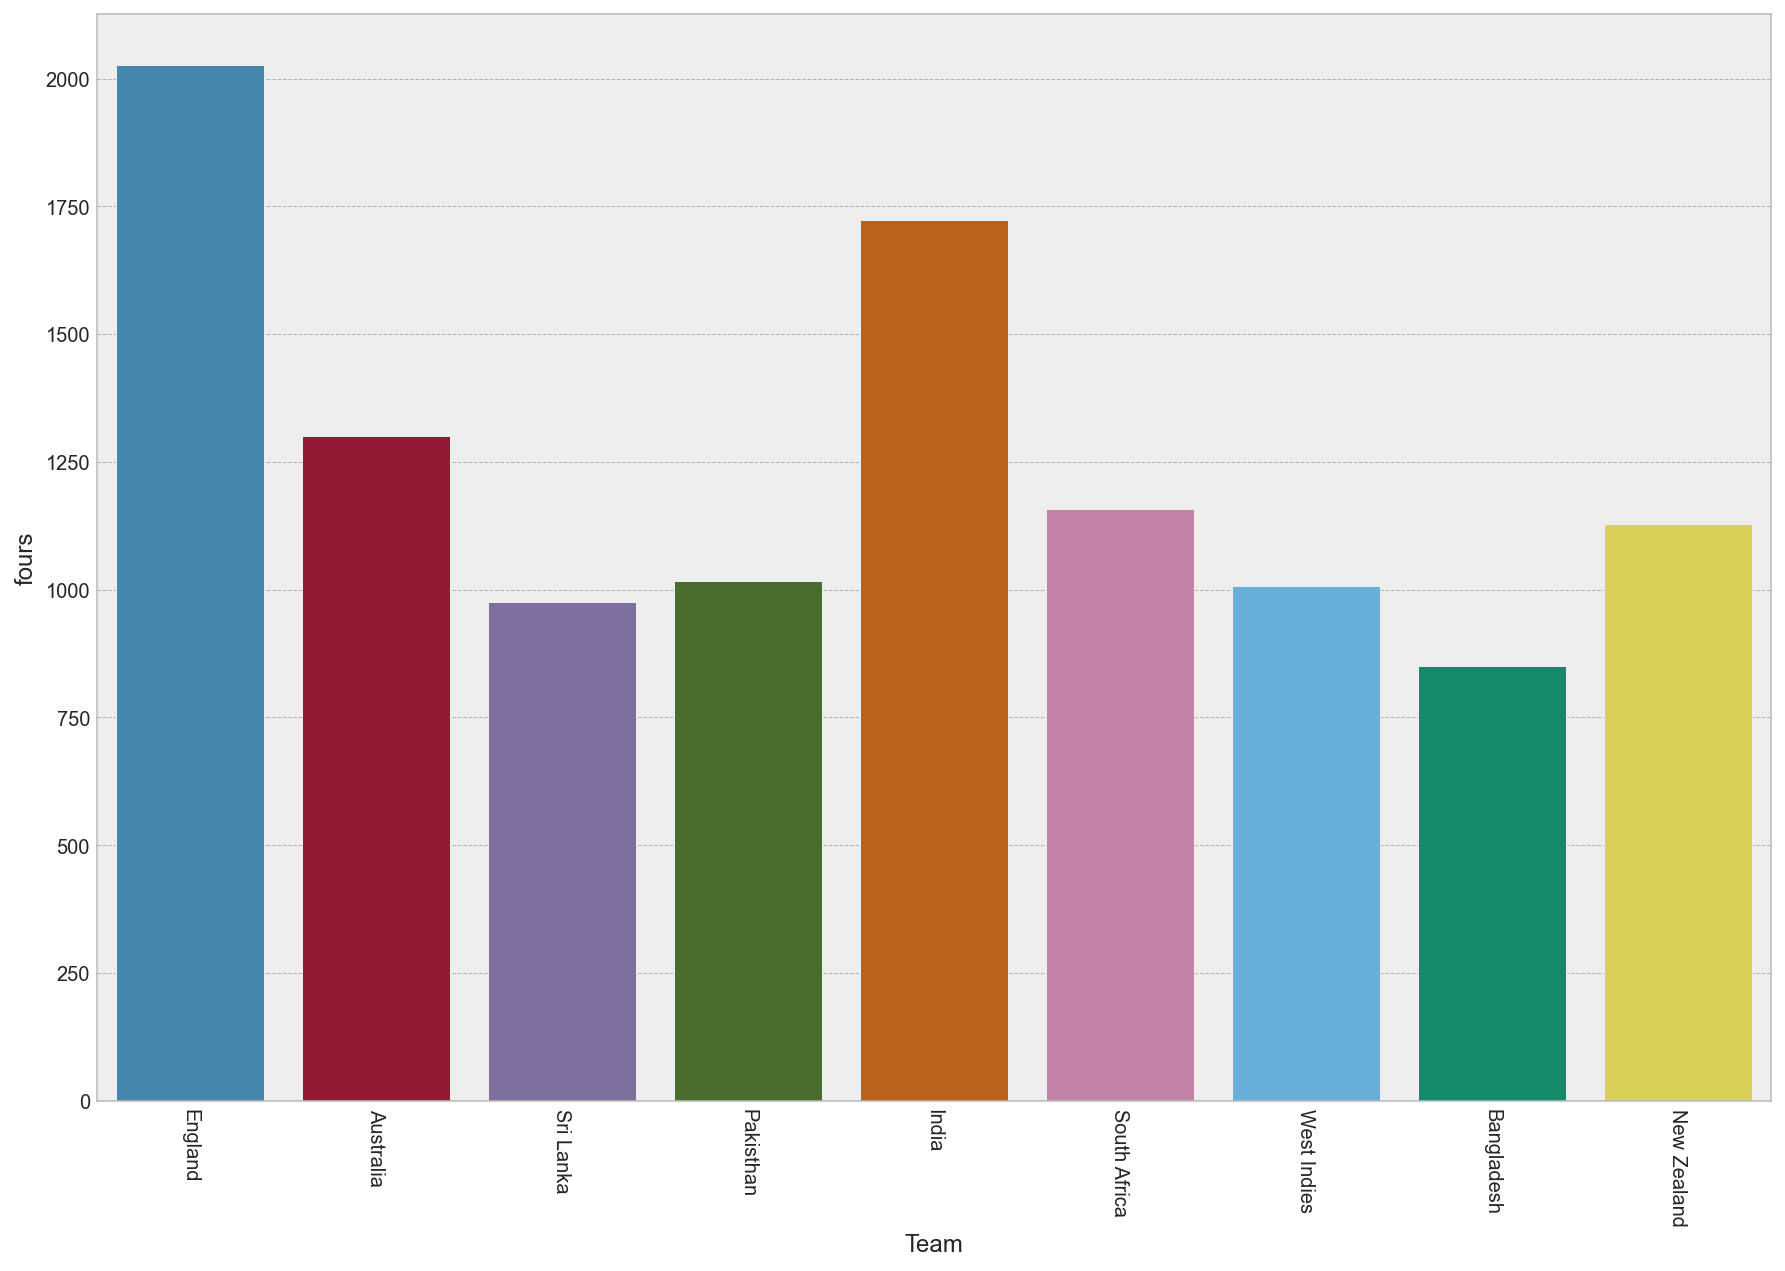

In [153]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'fours',estimator= np.sum, ci = 0 );

### Team wise Sixes

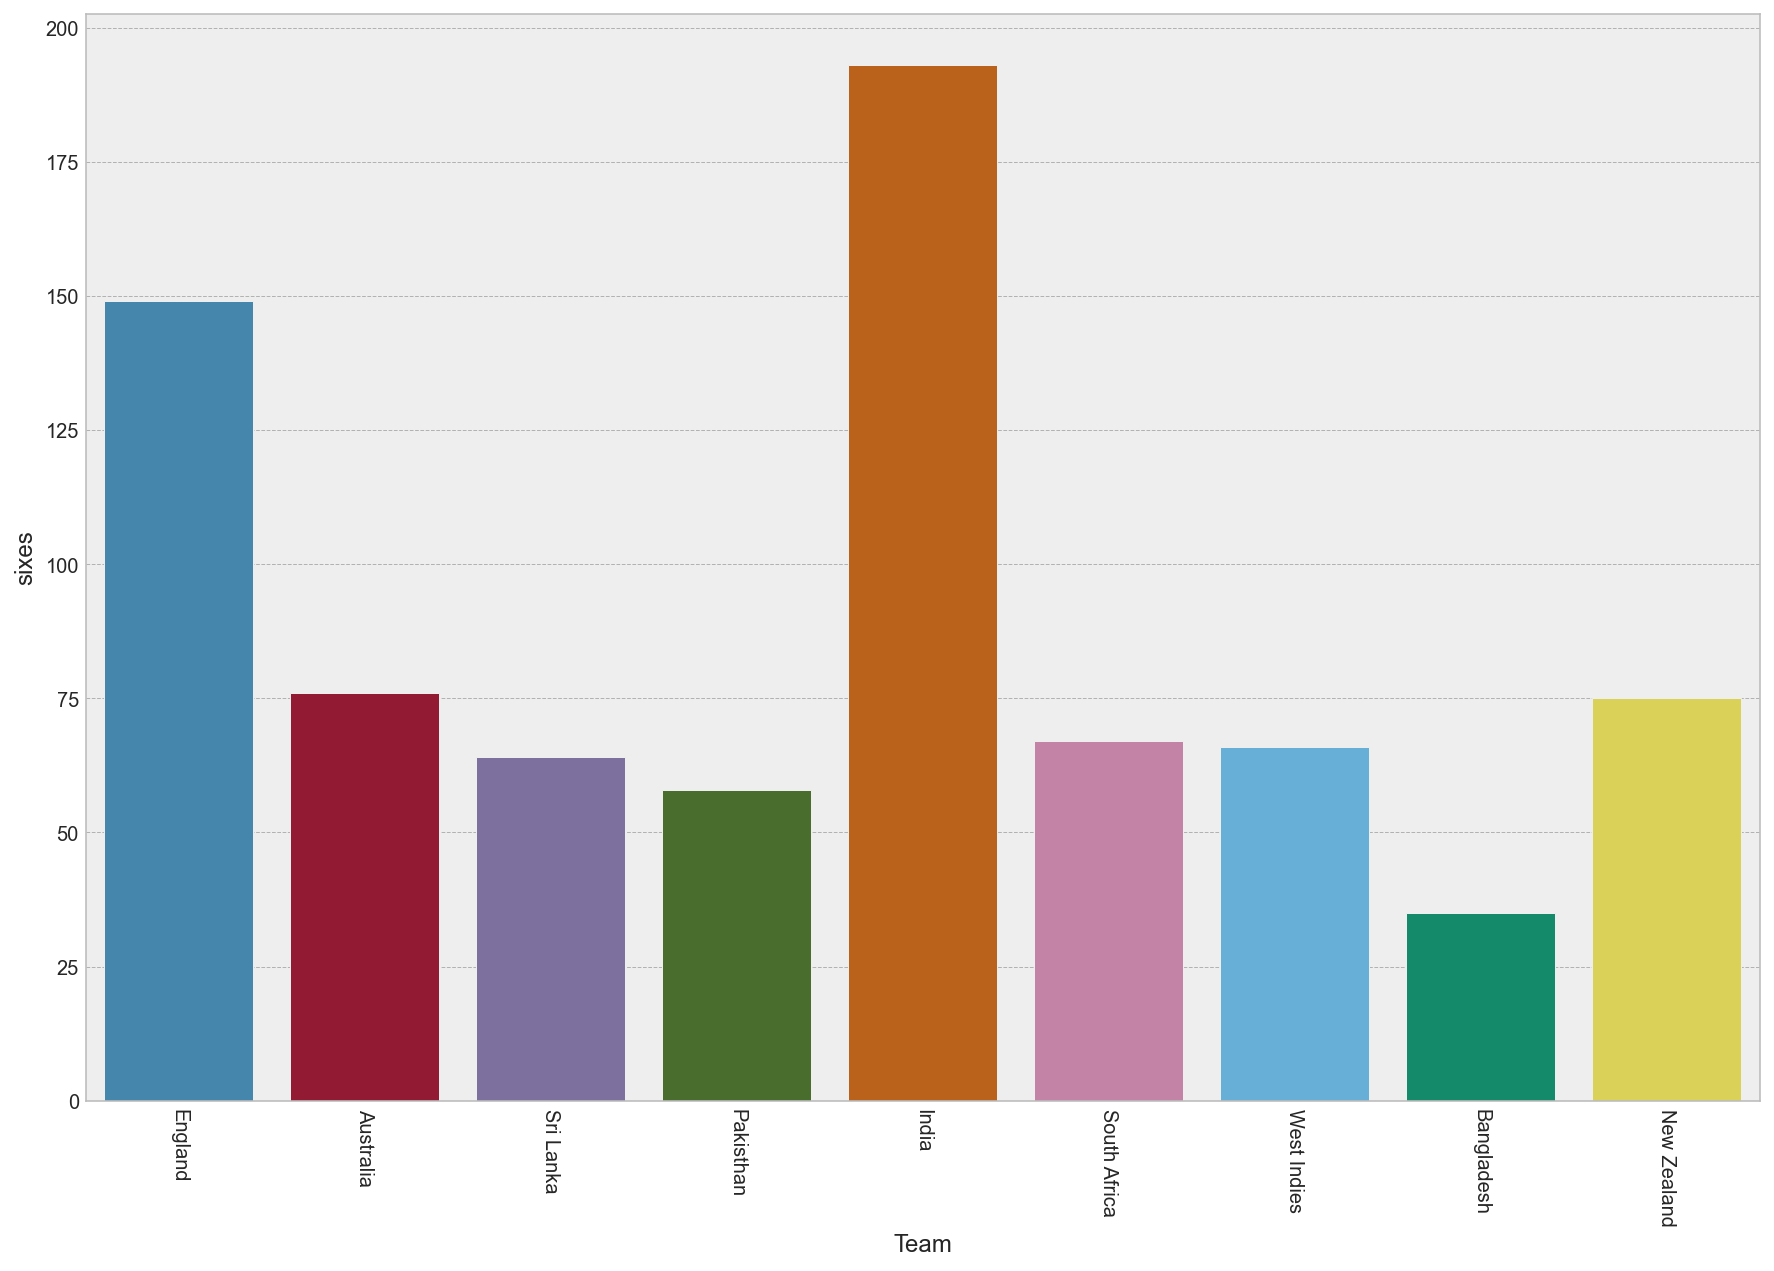

In [154]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'sixes',estimator= np.sum, ci = 0 );

### Team wise Fifties

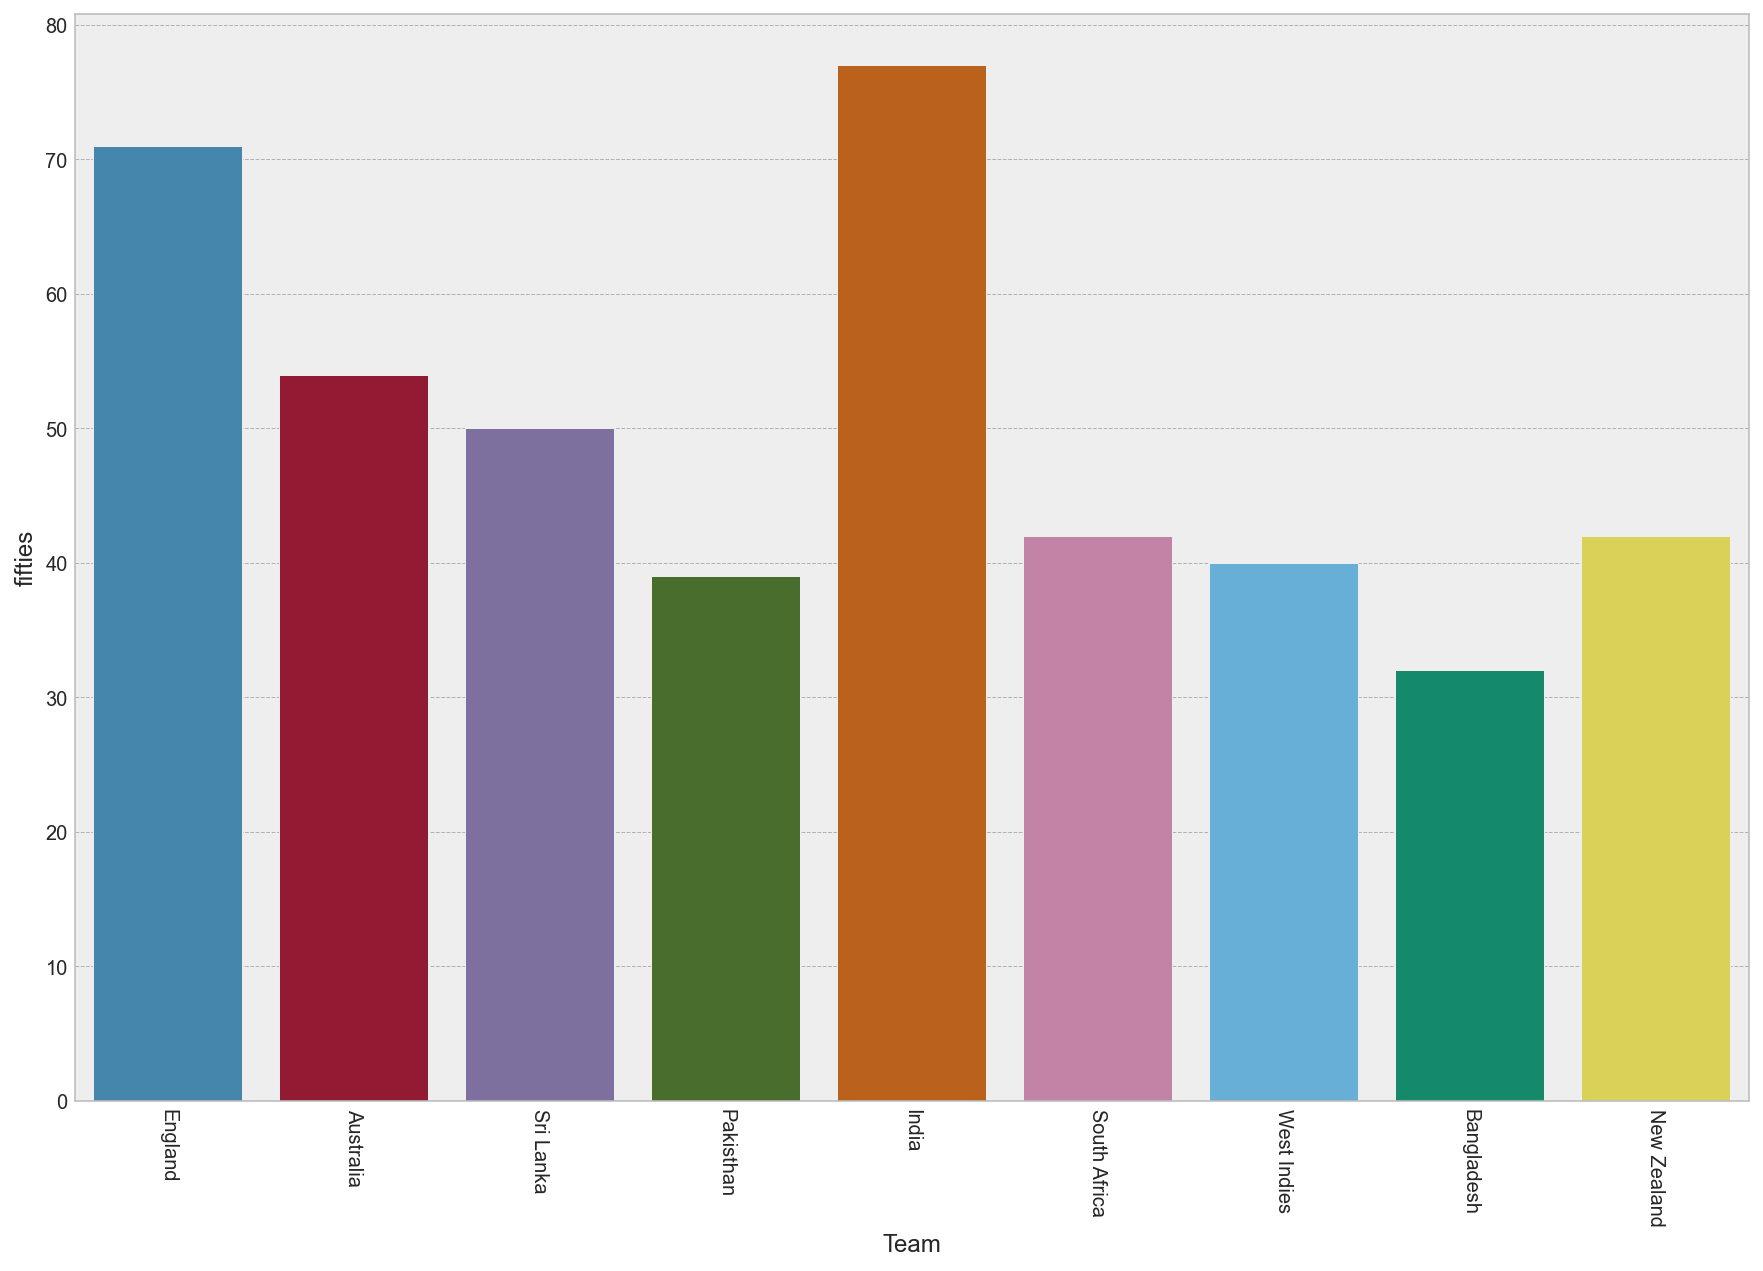

In [155]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'fifties',estimator= np.sum, ci = 0 );

### Team vs Ducks

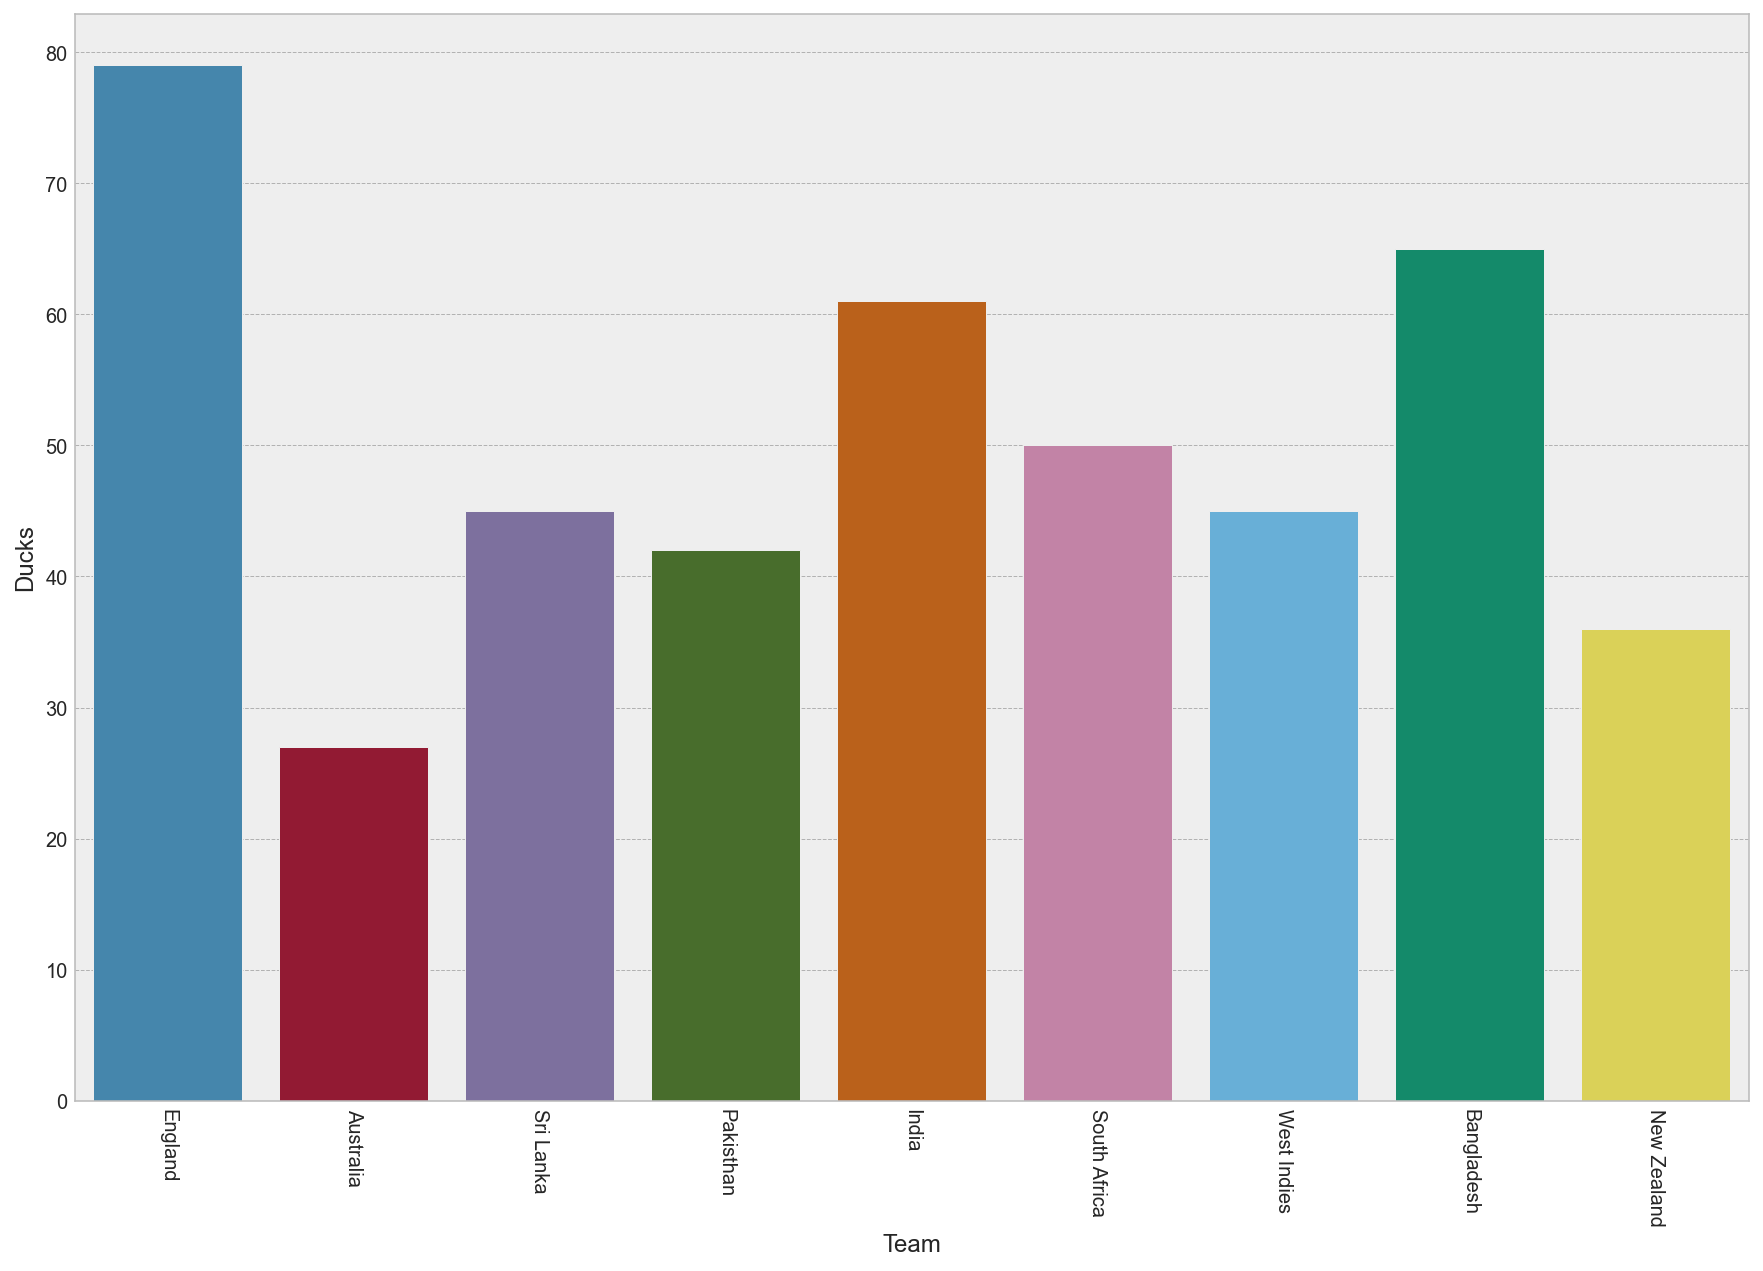

In [156]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'Ducks',estimator= np.sum, ci = 0 );

### Team vs Not Outs

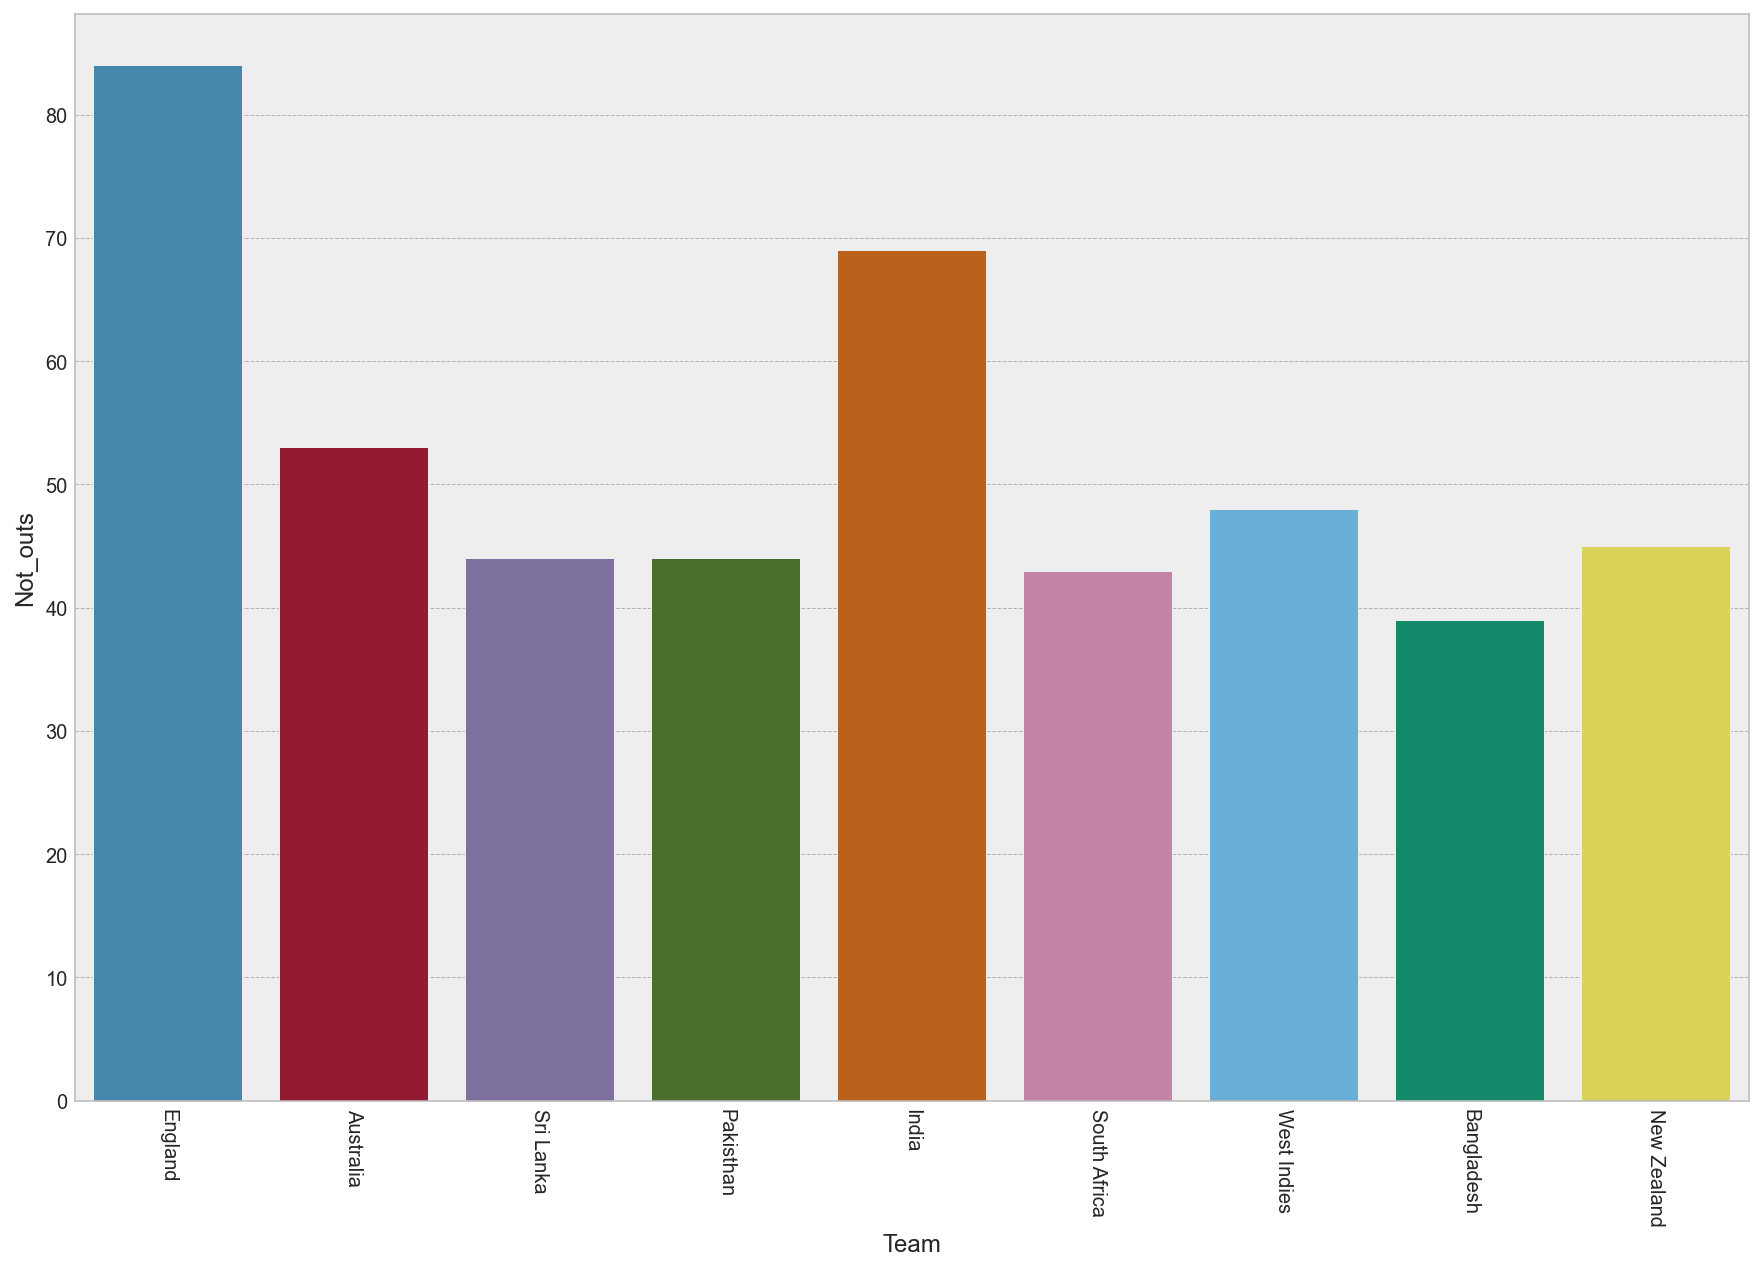

In [157]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'Not_outs',estimator= np.sum, ci = 0 );

### Team vs Average Stirkerate

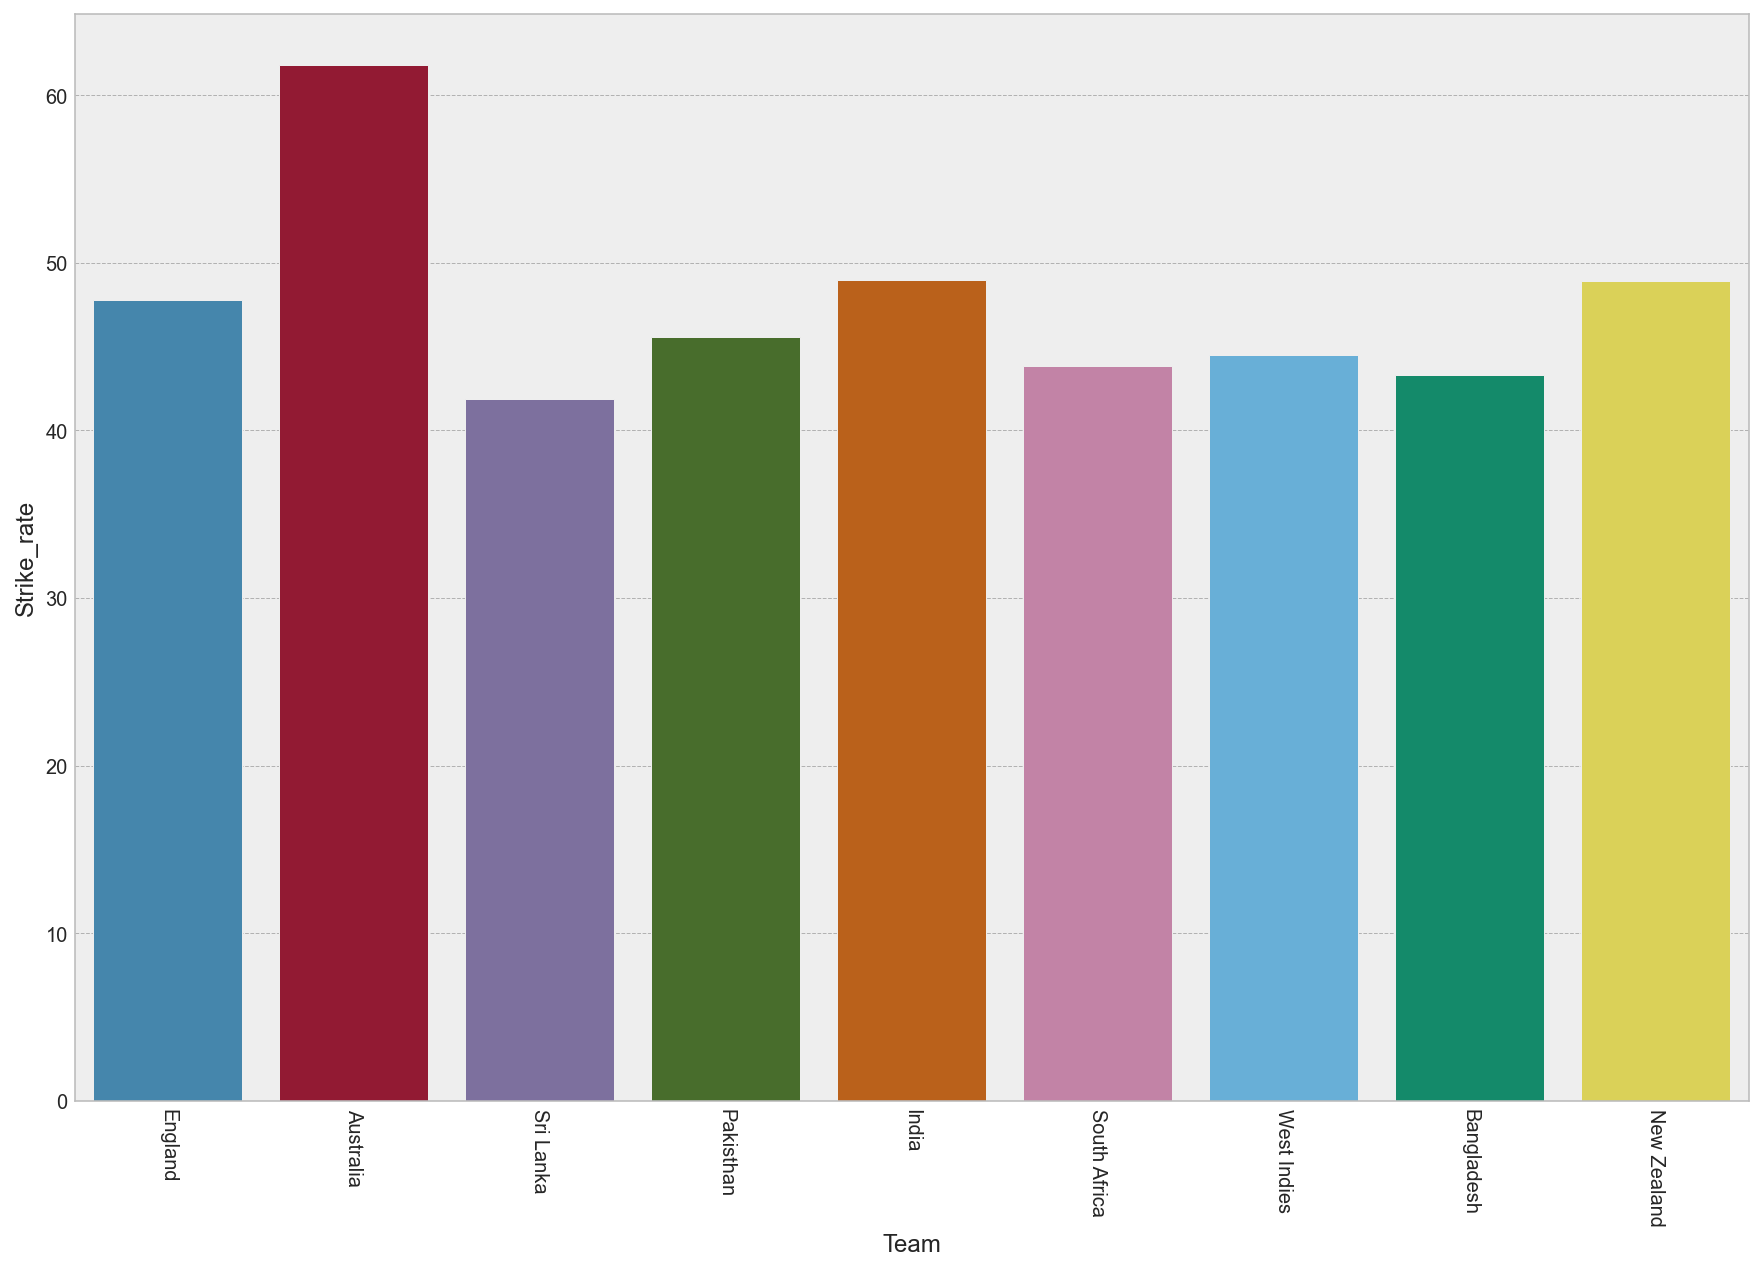

In [158]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Batting_Stats , x = 'Team', y = 'Strike_rate',estimator= np.average, ci = 0 );

### Distribution plot for Runs

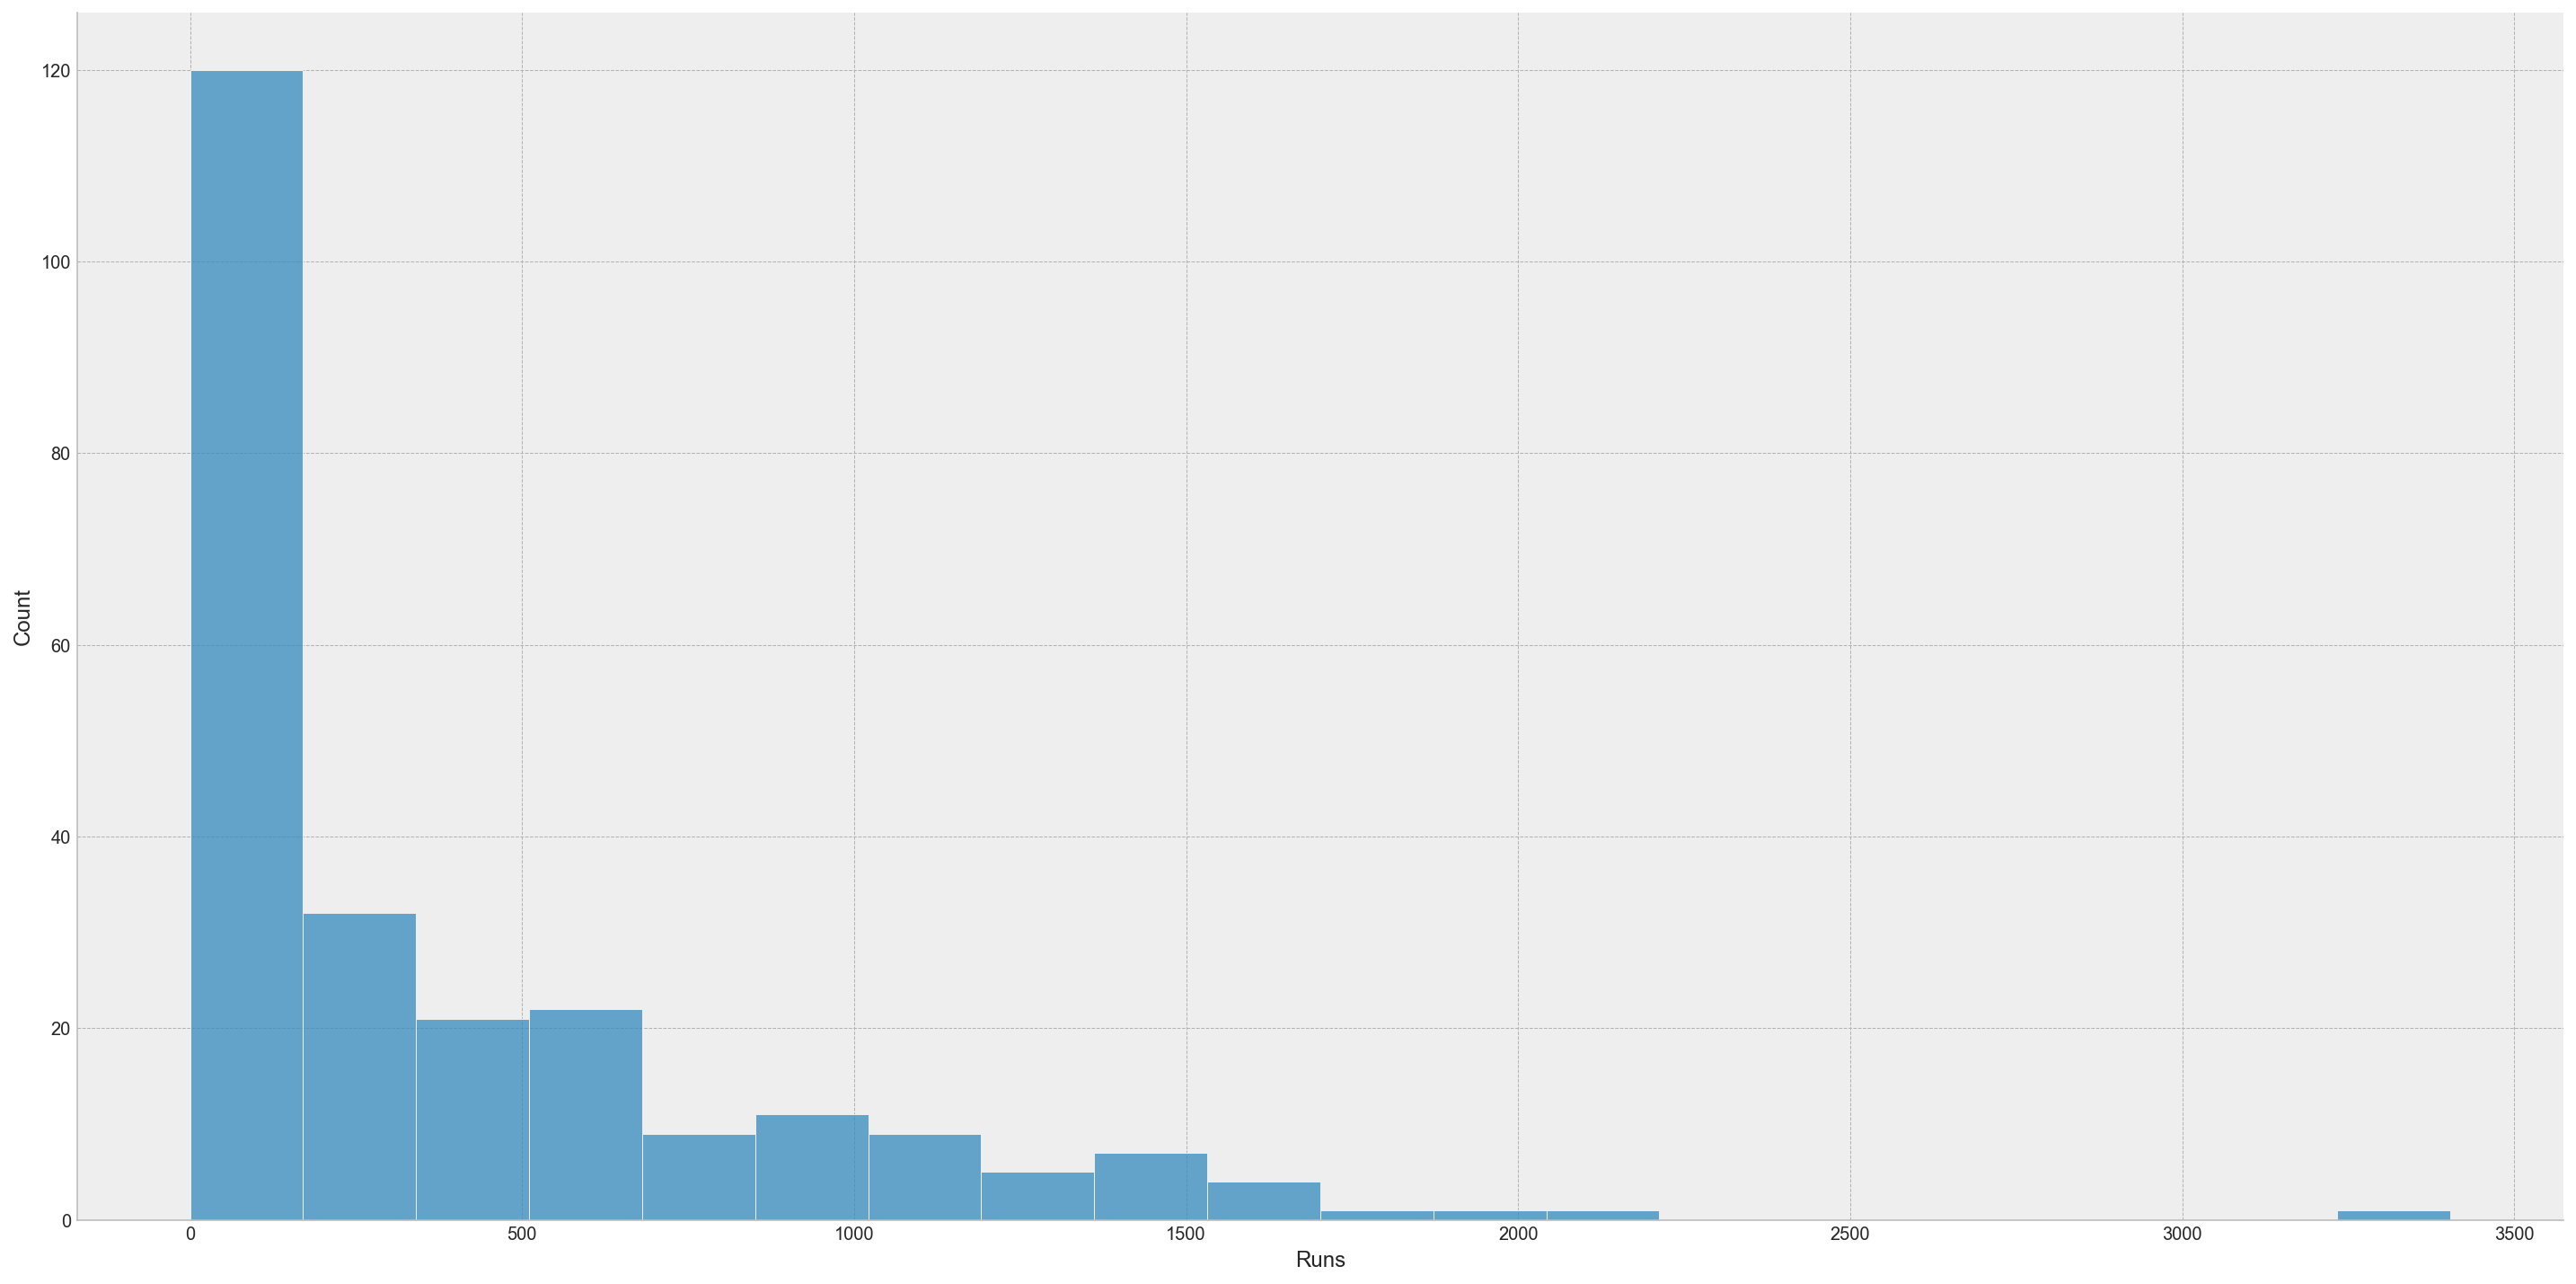

In [161]:

sns.displot(data =Icc_WTC_Batting_Stats , x = 'Runs', height=10, aspect =10/5);

### Distribution plot for Highest score

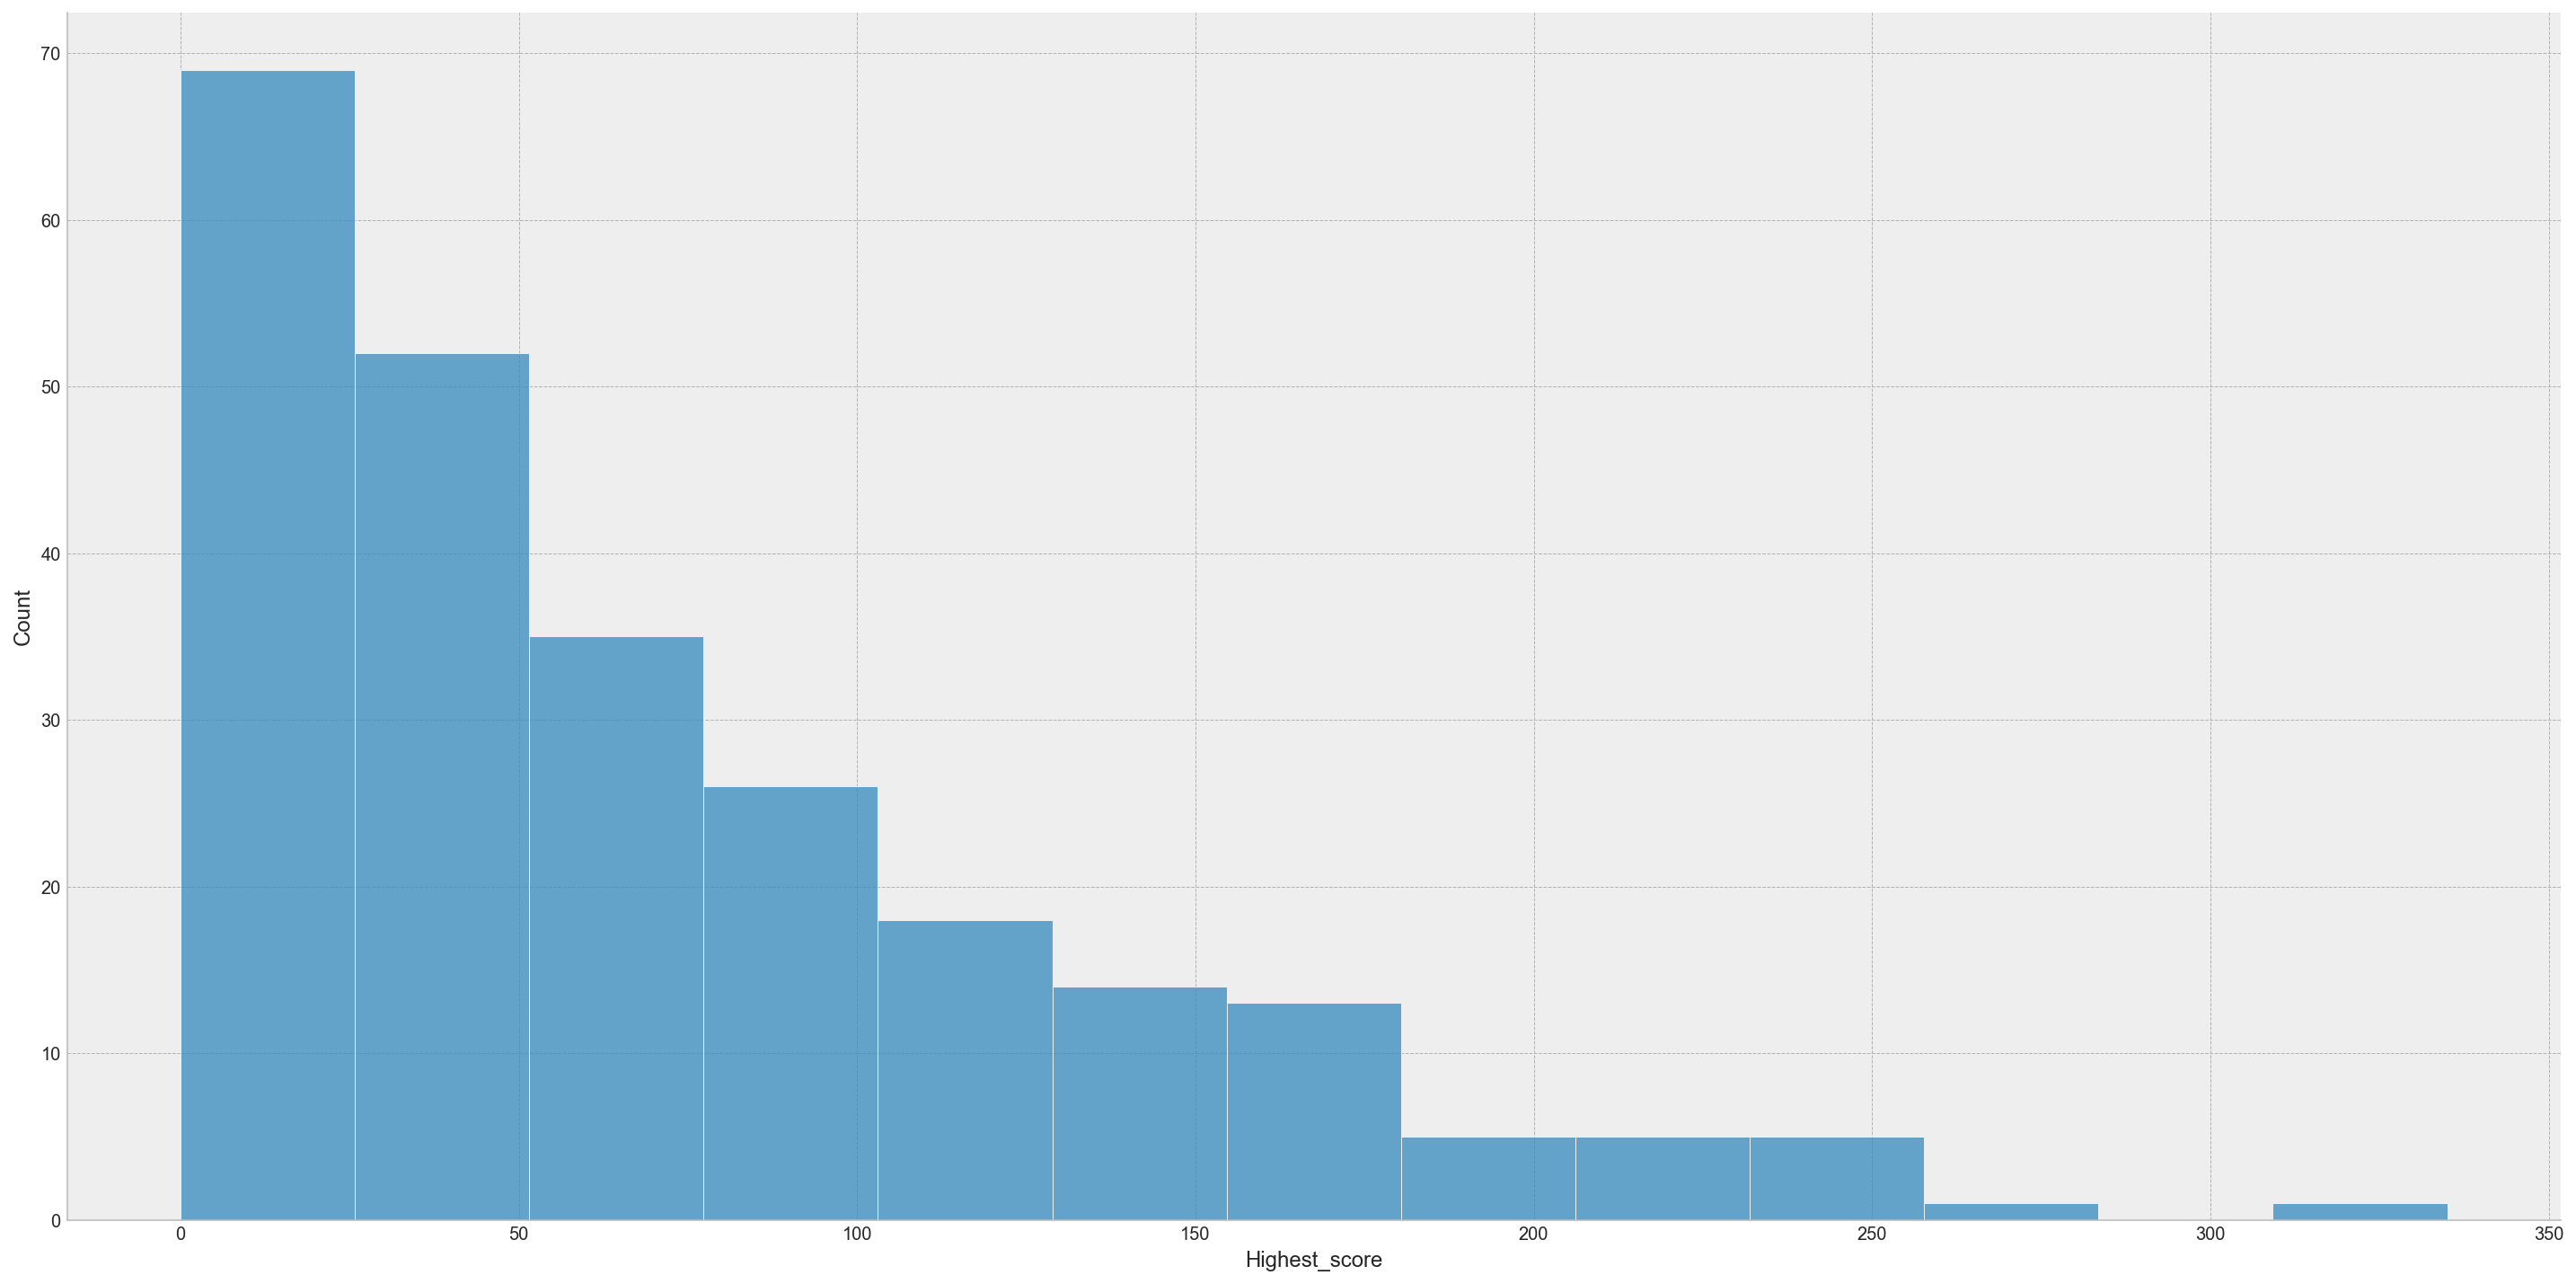

In [160]:

sns.displot(data =Icc_WTC_Batting_Stats , x = 'Highest_score', height=10, aspect =10/5);

In [ ]:
sns.boxplot